# Below are some of the Kaggle Kernels that I refer to for this project:

https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard

In [831]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression


from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

# Import training set, testing set

In [781]:
training_data=pd.read_csv("C:/Users/yuka.abe/Desktop/Untitled Folder/Housing Price Prediction Project/train.csv")
testing_data=pd.read_csv("C:/Users/yuka.abe/Desktop/Untitled Folder/Housing Price Prediction Project/test.csv")

# Check difference between testing dataset and training dataset:

In [495]:
[i for i in training_data.columns if i not in testing_data.columns ]

['SalePrice']

In [496]:
[i for i in testing_data.columns if i not in training_data.columns ]

[]

The only difference between training dataset and testing dataset is training dataset has sales price which is the target variable we are going to predict here.

# Exploratory analysis

# Define a function for exploratory data analysis:

In [728]:
def func_variable_exploratory_analysis(dataset, variable_name, variable_type):
    # Make sure variable type is input correctly. If the variable_type input does not fall in the three categories below, an error will be raised.
    if variable_type not in ['Categorical', "Continuous", "Datetime"]:
        raise ValueError("The variable type should be Categorical, Continuous or Datetime")
    else:
        if variable_type=='Categorical':
            print("Number of missing data points for" , variable_name, ": ", str(dataset['Id'].count()-dataset[variable_name].count()) )
            print('\033[1m' +"Distribution of the categorical variables:" + variable_name )
            print('\033[0m')
            print(dataset[variable_name].value_counts())

            d=dataset[variable_name].value_counts()/dataset['Id'].count()

            print('\033[1m' +"Distribution of the categorical variables (In Percentage):" + variable_name)
            print('\033[0m')
            print(d.apply(lambda x: "{0:.0%}".format(x)))

            print('\033[1m' +"Below is the distribution the of the categorical variable:" + variable_name)
            print('\033[0m')
            
            dataset[variable_name].hist()
            plt.show()
            
        if variable_type=='Continuous':
            number_of_data_points=dataset[variable_name].count()
            estimate_of_number_bins=int(np.sqrt(number_of_data_points))
            print('\033[1m' +"Descriptive Statistics:" + variable_name)
            print('\033[0m')

            print(dataset[variable_name].describe())


            print('\033[1m' +"Number of observations with missing value for the continuous variable:" + variable_name)
            print('\033[0m')

            print( dataset['Id'].count()-dataset[variable_name].describe()['count'])


            print('\033[1m' +"PDF and CDF of the variable:" + variable_name)
            print('\033[0m')


            fig=plt.figure()

            ax1=plt.subplot(2,1,1)
            ax1=dataset[variable_name].hist(bins=estimate_of_number_bins)
            plt.title('PDF of the continuous variable')

            ax2=plt.subplot(2,1,2)
            ax2=dataset[variable_name].hist(bins=estimate_of_number_bins, cumulative=True, normed=True)
            plt.title('CDF of the continuous variable')

            ax1.get_shared_x_axes().join(ax1, ax2)
            ax1.set_xticklabels([])
            plt.show()
        if variable_type=='Datetime':
            date_variable=pd.to_datetime(dataset[variable_name])

            print('\033[1m' +"Number of observations with missing value for the continuous variable:" + variable_name)
            print('\033[0m')

            print("Number of observations with missing value for the continuous variable:"+ variable_name, dataset['Id'].count()-dataset[variable_name].describe()['count'])
            
            print("date range of " + variable_name + " : From " ,date_variable.min(), " To ", date_variable.max() )







# Create three different lists of column names for categorical variables, numerical variables and datetime variables

In [729]:
Categorical_variable=[
'MSSubClass',
'MSZoning',
'Street',
'Alley',
'LotShape',
'LandContour',
'Utilities',
'LotConfig',
'LandSlope',
'Neighborhood',
'Condition1',
'Condition2',
'BldgType',
'HouseStyle',
'OverallQual',
'OverallCond',
'YearBuilt',
'YearRemodAdd',
'RoofStyle',
'RoofMatl',
'Exterior1st',
'Exterior2nd',
'MasVnrType',
'ExterQual',
'ExterCond',
'Foundation',
'BsmtQual',
'BsmtCond',
'BsmtExposure',
'BsmtFinType1',
'BsmtFinType2',
'Heating',
'HeatingQC',
'CentralAir',
'Electrical',
'KitchenQual',
'Functional',
'FireplaceQu',
'GarageType',
'GarageYrBlt',
'GarageFinish',
'GarageQual',
'GarageCond',
'PavedDrive',
'PoolQC',
'Fence',
'MiscFeature',
'MoSold',
'YrSold',
'SaleType',
'SaleCondition']

In [730]:
numerical_variable=[
'LotFrontage',
'LotArea',
'MasVnrArea',
'BsmtFinSF1',
'BsmtFinSF2',
'BsmtUnfSF',
'TotalBsmtSF',
'1stFlrSF',
'2ndFlrSF',
'LowQualFinSF',
'GrLivArea',
'BsmtFullBath',
'BsmtHalfBath',
'FullBath',
'HalfBath',
'BedroomAbvGr',
'KitchenAbvGr',
'TotRmsAbvGrd',
'Fireplaces',
'GarageCars',
'GarageArea',
'WoodDeckSF',
'OpenPorchSF',
'EnclosedPorch',
'3SsnPorch',
'ScreenPorch',
'PoolArea',
'MiscVal'
]

In [731]:
datetime_variables=[
'YearBuilt',
'YearRemodAdd',
'GarageYrBlt',
'MoSold',
'YrSold'    
]

# Find out which of the numerical variables are most closely related to sale price

Based on the correlation analysis, the top features that have a big correlation with the SalePrice are as below:
- GrLivArea: Above grade (ground) living area square feet
- GarageCars:  Size of garage in car capacity
- GarageArea: Size of garage in square feet
- TotalBsmSf:  Total square feet of basement area
- 1stFlrSF:  First Floor square feet
- FullBath: Full bathrooms above grade
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- MasVnrArea: Masonry veneer area in square feet
- Fireplaces: Number of fireplaces
- BsmtFinSF1: Type 1 finished square feet

Note that by looking the highly correlated variables, there are variables that might cause the multi-colineararity within the model (for example, Garage cars and Garage Area are closely correlated. In this case, it would be better to only include one of the variables to avoid biased coefficients)

In [501]:
correlation_list=[]
variable_name_list=[]
for variable in numerical_variable:
    correlation=training_data[['SalePrice', variable]].corr()['SalePrice'][1]
    correlation_list.append(correlation)
    variable_name_list.append(variable)
numerical_Variable_Correlation_df=pd.DataFrame({'Variable': variable_name_list, 'Correlation':correlation_list })
numerical_Variable_Correlation_df.sort_values(by='Correlation', ascending=False, inplace=True)

# Here are the top 15 cotinuous features in the dataset:

In [502]:
numerical_Variable_Correlation_df.head(15)

Variable  Correlation
10     GrLivArea     0.708624
19    GarageCars     0.640409
20    GarageArea     0.623431
6    TotalBsmtSF     0.613581
7       1stFlrSF     0.605852
13      FullBath     0.560664
17  TotRmsAbvGrd     0.533723
2     MasVnrArea     0.477493
18    Fireplaces     0.466929
3     BsmtFinSF1     0.386420
0    LotFrontage     0.351799
21    WoodDeckSF     0.324413
8       2ndFlrSF     0.319334
22   OpenPorchSF     0.315856
14      HalfBath     0.284108

Export the correlation of numerical variable into a csv file.

In [209]:
#numerical_Variable_Correlation_df.to_csv("C:/Users/yuka.abe/Desktop/Untitled Folder/Housing Price Prediction Project/Documentation/numerical_Variable_Correlation_analysis.csv")

# Find out the categorical variables that are most correlated to the dependent variable SalePrice:

Some tutorials about feature selection:
- https://www.datacamp.com/community/tutorials/feature-selection-python
- https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/
- https://machinelearningmastery.com/chi-squared-test-for-machine-learning/

To identify the most import categorical variables in the model, we are going to use Anova test.

In [505]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [506]:
Anova_test_F_value=[]
Anova_test_p_value=[]
variable_name_list=[]
for variable in Categorical_variable: 
    mod = ols('SalePrice ~ '+variable,data=training_data).fit()
    aov_table = sm.stats.anova_lm(mod, typ=2)
    Fvalue=aov_table.loc[variable, 'F']
    Pvalue=aov_table.loc[variable, 'PR(>F)']
    variable_name_list.append(variable)
    Anova_test_F_value.append(Fvalue)
    Anova_test_p_value.append(Pvalue)

Anova_categorical_variable_test=pd.DataFrame({"Variable": variable_name_list, "F Value":Anova_test_F_value, "P Value":Anova_test_p_value })

By using the anova test, the top categorical features are as below:
- OverallQual:  Overall material and finish quality
- YearBuilt:  Original construction date
- YearRemodAdd:  Remodel date
- ExterQual:  Exterior material quality
- GarageYrBlt:  Year garage was built
- KitchenQual:  Kitchen quality
- BsmtQual: Height of the basement
- GarageFinish:  Interior finish of the garage
- MasVnrType: Masonry veneer type
- foundation:  Type of foundation
- CentralAir: Central air conditioning

Also, most of the categorical features have a p value that is less than 0.05.

In [507]:
Anova_categorical_variable_test.sort_values(by='F Value', ascending=False, inplace=True)
Anova_categorical_variable_test.head(20)

Variable      F Value        P Value
14    OverallQual  2436.770591  2.185675e-313
16      YearBuilt   548.665821  2.990229e-103
17   YearRemodAdd   504.714855   3.164948e-96
23      ExterQual   443.334831  1.439551e-204
39    GarageYrBlt   426.648985   8.705128e-83
35    KitchenQual   407.806352  3.032213e-192
26       BsmtQual   392.913506  9.610615e-186
40   GarageFinish   250.962467   1.199117e-93
22     MasVnrType   111.672380   4.793331e-65
25     Foundation   100.253851   5.791895e-91
33     CentralAir    98.305344   1.809506e-22
32      HeatingQC    88.394462   2.667062e-67
9    Neighborhood    71.784865  1.558600e-225
38     GarageType    71.522123   1.247154e-66
28   BsmtExposure    70.887984   1.022671e-42
29   BsmtFinType1    67.602175   1.807731e-63
50  SaleCondition    45.578428   7.988268e-44
1        MSZoning    43.840282   8.817634e-35
43     PavedDrive    42.024179   1.803569e-18
4        LotShape    40.132852   6.447524e-25

In [157]:
# Anova_categorical_variable_test.to_csv("C:/Users/yuka.abe/Desktop/Untitled Folder/Housing Price Prediction Project/Documentation/Categorical_variables_anova_test_analysis.csv")

# By examining the highest correlated categorical and numerical features, it seems that the exterior building factors/features are playing a more important role than interior features and location facotors.

# EDA on target variable: 

Descriptive Statistics:SalePrice

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
Number of observations with missing value for the continuous variable:SalePrice

0.0
PDF and CDF of the variable:SalePrice



C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


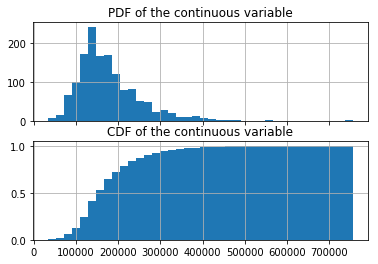

In [508]:
func_variable_exploratory_analysis(training_data, 'SalePrice', 'Continuous')

# Use Seaborn to show the distribution of SalePrice:

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


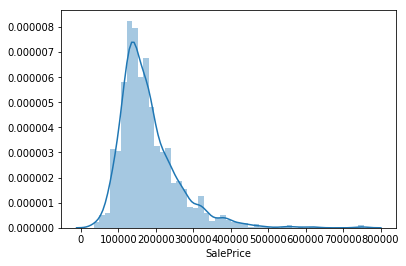

In [175]:
sns.distplot(training_data['SalePrice']);

In [174]:
print("skewness of the variable", training_data['SalePrice'].skew())
print("peakedness of the variable", training_data['SalePrice'].kurt())

skewness of the variable 1.8828757597682129
peakedness of the variable 6.536281860064529


By looking at the histogram of the sale price, the data is slightly skewed to the right. Most of the properties are under $ 300,000. The distribution is also peaky compared with a normal distribution.

# Examin the relationship between Sale Price and its highly correlated features:

# Relationship between sales price and its highly correlated categorical variable:

In [511]:
top_categorical_variable_list=list(Anova_categorical_variable_test['Variable'].head(15))

Exclude the datetime variable list:

In [512]:
top_categorical_variable_list=[ i for i in top_categorical_variable_list if i not in datetime_variables ]

In [513]:
top_categorical_variable_list

['OverallQual',
 'ExterQual',
 'KitchenQual',
 'BsmtQual',
 'GarageFinish',
 'MasVnrType',
 'Foundation',
 'CentralAir',
 'HeatingQC',
 'Neighborhood',
 'GarageType',
 'BsmtExposure']

# Here are the findings:
- Overall quality turns out to be the most significant factors in prediction the sale price of the property. The higher quality score, the higher the sale price is.
-  Exterior material quality is also a very important factor. The property excellent or good exterior quality tends to have higher sale price.
- Other than variables above, kitchen quality,  Height of the basement, Interior finish of the garage,  Masonry veneer type,  Type of foundation,  Central air conditioning are also closely related to the sale price. For example, the properties with brick or stone made masonry veneers have higher price point. The properties with central air conditioning tend to be more expensive than the the properties with no air conditioning. 


In [235]:
training_data.shape

(1460, 81)

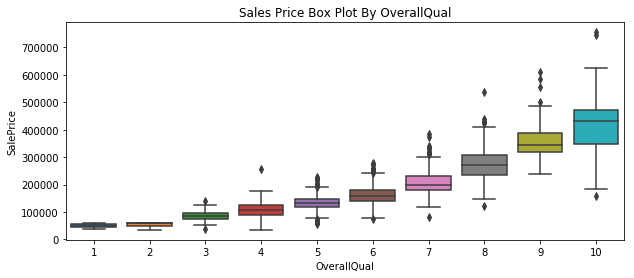

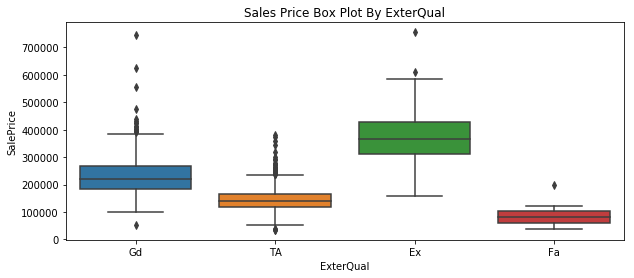

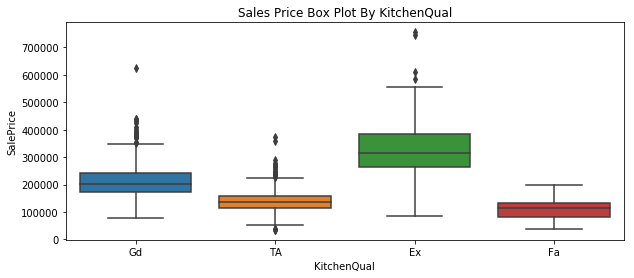

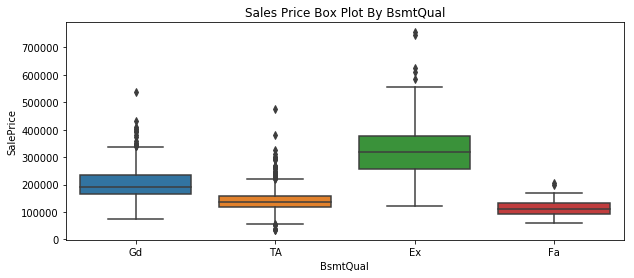

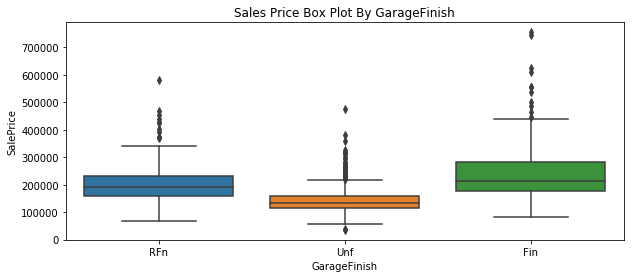

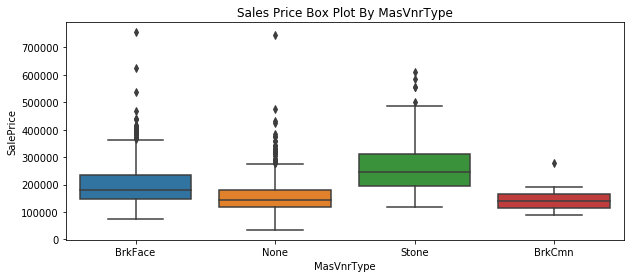

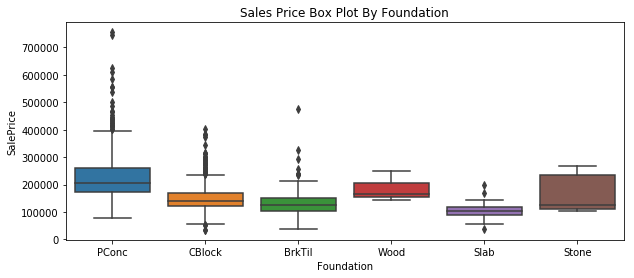

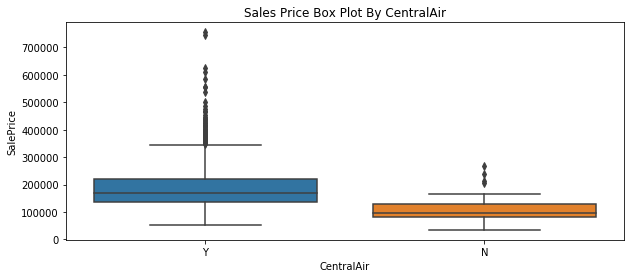

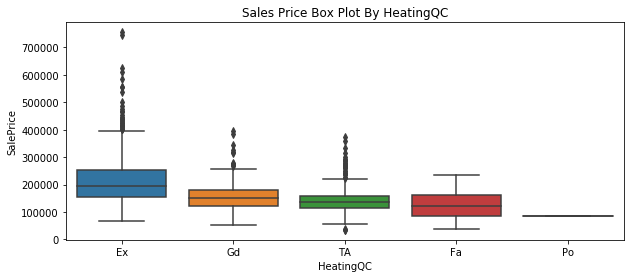

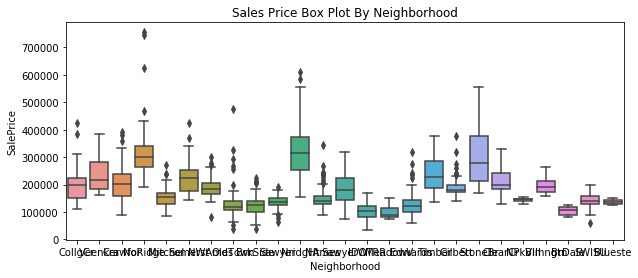

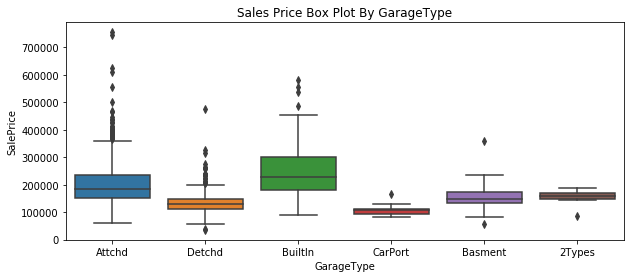

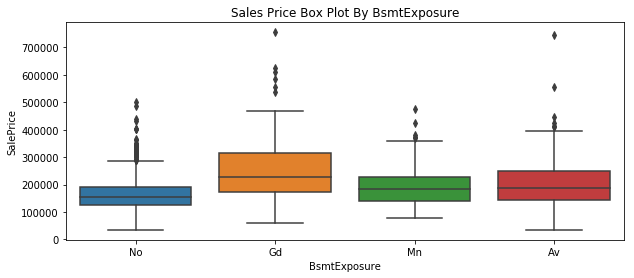

In [234]:
for variable in top_categorical_variable_list:
    f, ax = plt.subplots(figsize=(10, 4))
    sns.boxplot(x=variable, y="SalePrice", data=training_data)
    plt.title("Sales Price Box Plot By " + variable)

# Relationship between sale price and highly correlated numerical variables:

Heatmap of the features within the data frame:

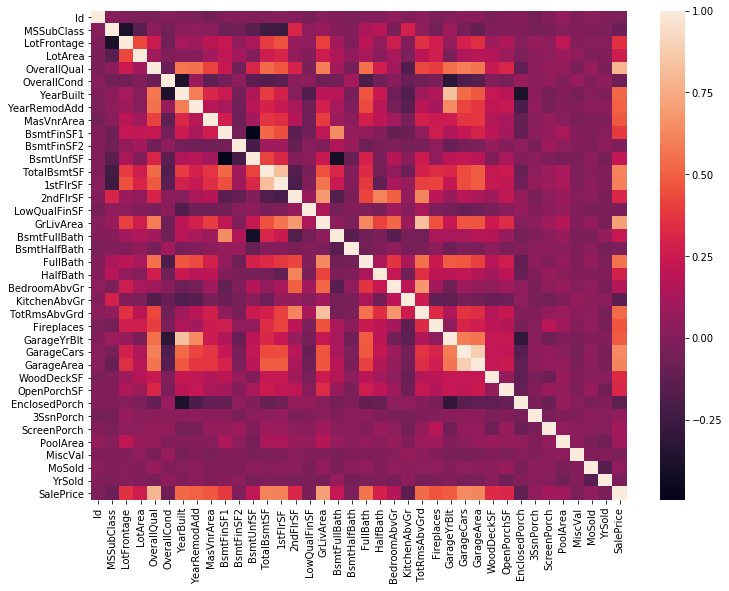

In [178]:
correlation=training_data.corr()
f, ax = plt.subplots(figsize=(12, 9)) # adjust the size of the plot
sns.heatmap(correlation)

In [206]:
top_numerical_variables_list=list(numerical_Variable_Correlation_df['Variable'].head(10))

# Here are the findings by looking at the scatter plot:
- The more ground living area, the higher the price.
- There's some variable on the sale price based on garage size in car capacity. But in general the price is going up. same finding on the garage size in square feet.
- There's a strong correlation between sale price and total basement size in square feet and first floor in square feet.
- For the full bathrooms above grade, the total rooms above grade, Masonry veneer area in square feet, number of fireplaces and type 1 finished square feet, there's some correlation between these variables with the price. But the correlation is not that strong.


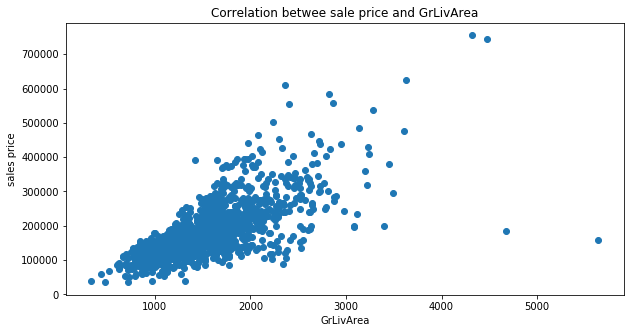

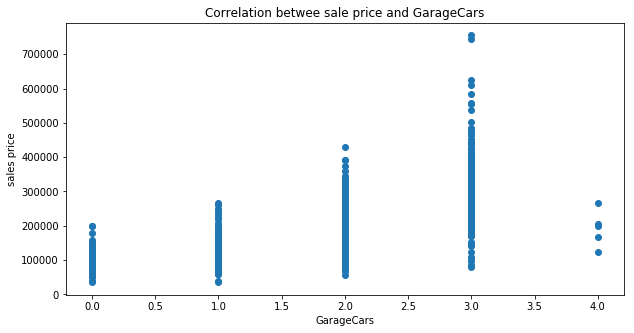

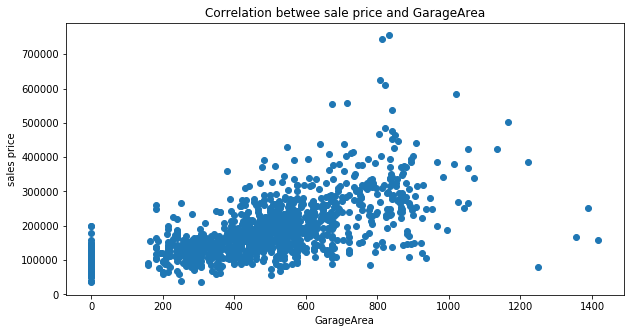

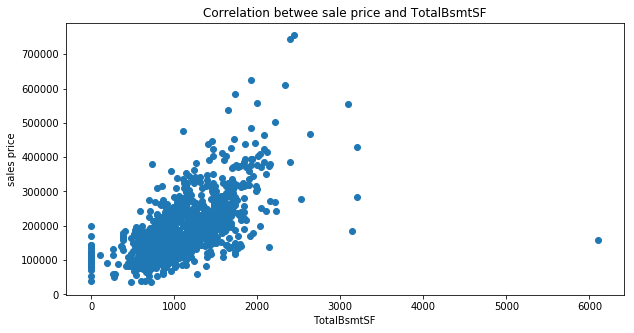

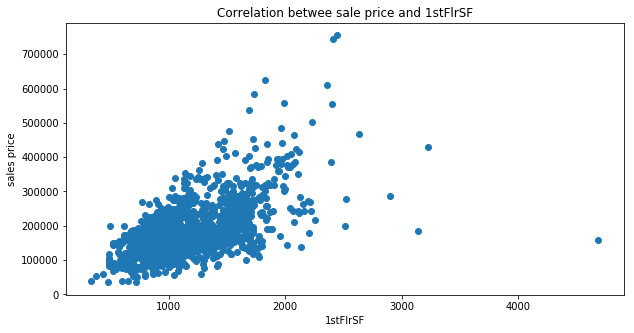

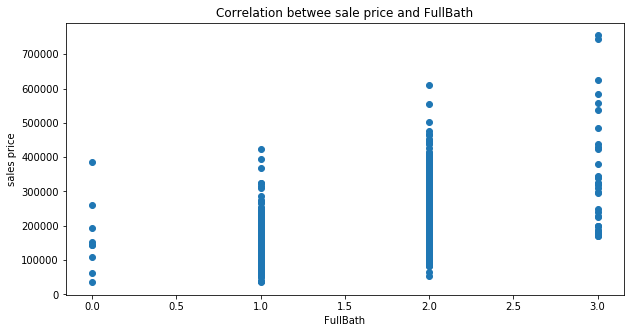

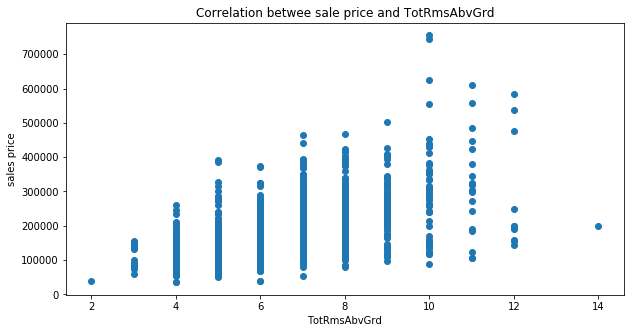

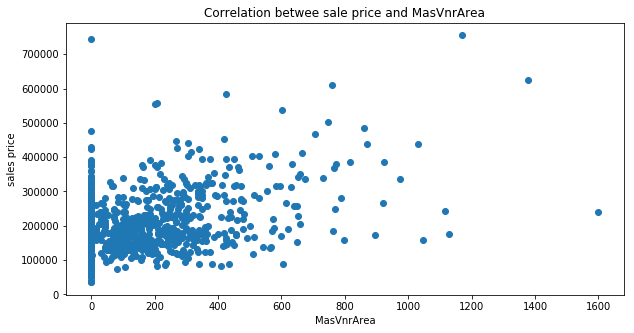

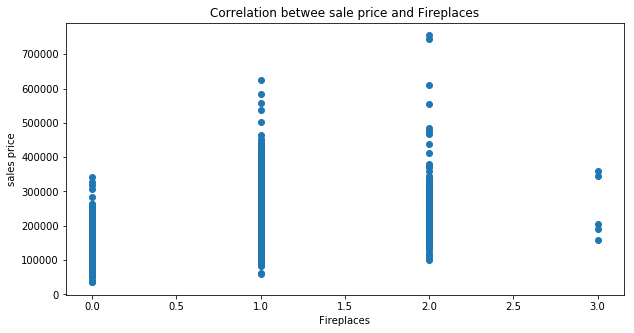

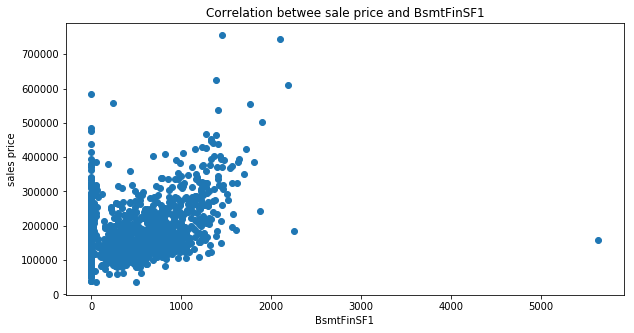

In [211]:
for numerical_variable in top_numerical_variables_list:
    f, ax = plt.subplots(figsize=(10, 5))
    plt.scatter(training_data[numerical_variable], training_data['SalePrice'])
    plt.xlabel(numerical_variable)
    plt.ylabel('sales price')
    plt.title('Correlation betwee sale price and ' + numerical_variable)

# Relationship between sale price and datetime variables:

# Below are the findings:
- The more recent the properties were built or remodeled, the more expensive they get. By for the saleprice by YearBuilt
- But some properties that were built before 1900 turn out to be more expensive than some of the properties that were built more recently.
- For the month when the properties were sold, the properties that were sold between August and October were more expensive on average than the properties that were sold before June.

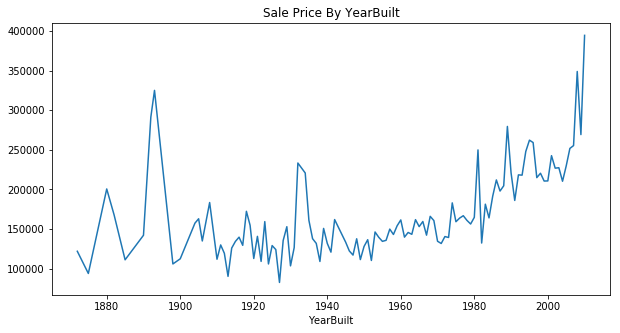

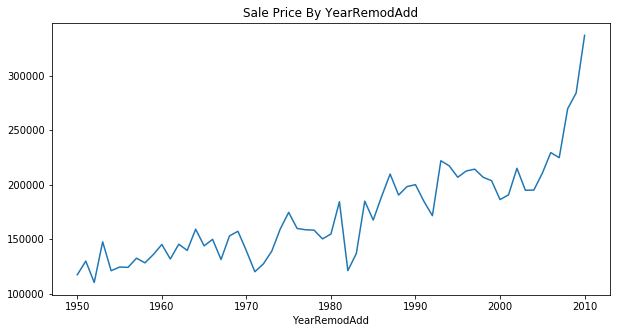

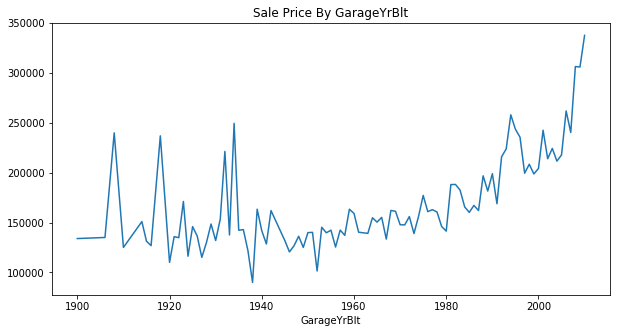

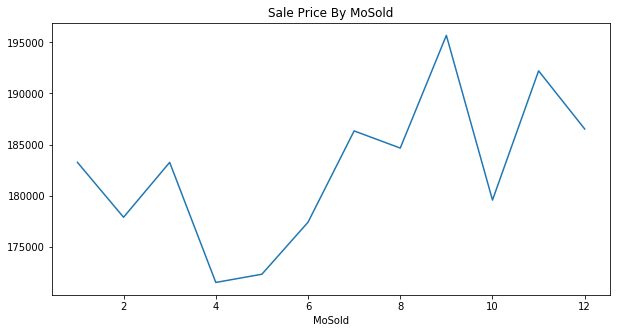

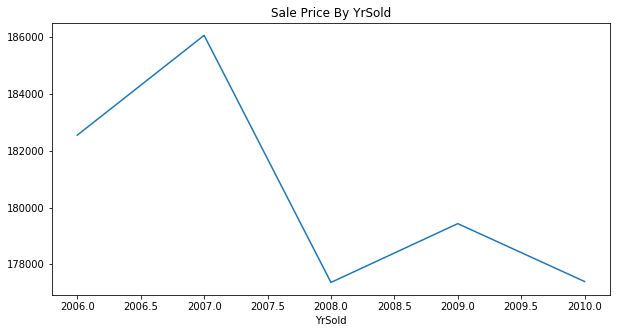

In [246]:
for variable in datetime_variables:
    f, ax = plt.subplots(figsize=(10, 5))
    training_data.groupby(variable)['SalePrice'].mean().sort_index(ascending=True).plot()
    plt.title('Sale Price By '+ variable)

Since the ultimate goal of the project is to make prediction on the testing dataset. Let's see if there's any difference on the datetime variables between testing and training set.

In [265]:
for variable in datetime_variables: 
    training_set_unique_value_list=list(training_data[variable].unique())
    testing_set_unique_value_list=list(testing_data[variable].unique())
    print("Below are the values from the testing set that are not in the training set for ", variable, ":", [i for i in testing_set_unique_value_list if i not in training_set_unique_value_list ])    

Below are the values from the testing set that are not in the training set for  YearBuilt : [1907, 1896, 1902, 1895, 1879, 1901]
Below are the values from the testing set that are not in the training set for  YearRemodAdd : []
Below are the values from the testing set that are not in the training set for  GarageYrBlt : [nan, 1917.0, 1896.0, 1895.0, 2207.0, 1943.0, 1919.0]
Below are the values from the testing set that are not in the training set for  MoSold : []
Below are the values from the testing set that are not in the training set for  YrSold : []


Note that for variable "YearBuilt" and "GarageYrBlt" there are values in the testing set that do not exist in the training set.

# Explore variables with missing data:

Below are the records with missing data:

In [24]:
list_fields_missing_value=[]
for variable in training_data.columns:
    if training_data[variable].count()<training_data['Id'].count():
        print(variable, ": ", str(training_data[variable].count()) )
        list_fields_missing_value.append(variable)

LotFrontage :  1201
Alley :  91
MasVnrType :  1452
MasVnrArea :  1452
BsmtQual :  1423
BsmtCond :  1423
BsmtExposure :  1422
BsmtFinType1 :  1423
BsmtFinType2 :  1422
Electrical :  1459
FireplaceQu :  770
GarageType :  1379
GarageYrBlt :  1379
GarageFinish :  1379
GarageQual :  1379
GarageCond :  1379
PoolQC :  7
Fence :  281
MiscFeature :  54


Among the fields above, I decided to exclude the following fields since these fields do not have more than half of the records with valid the value. It's not going to be helpful to include these fields in the analysis:

- Alley
- FireplaceQu
- PoolQC
- Fence
- MiscFeature


In [25]:
list_fields_missing_value_update=[i for i in list_fields_missing_value if i not in ['Alley','FireplaceQu','PoolQC', 'Fence', 'MiscFeature'  ]]

Take a look at the distribution for the rest of the fields with missing values:

In [26]:
list_fields_missing_value_update_cat=[i for i in list_fields_missing_value_update if i not in ['LotFrontage', 'MasVnrArea']]
list_fields_missing_value_update_num=['LotFrontage', 'MasVnrArea']

Most of the properties were built the same year when the property was built. So in this case, I will input missing value for the GarageYrBlt sames as the YearBuilt.

Text(0.5, 1.0, 'Relationship between the year when the property was built and the year when the garage was built')

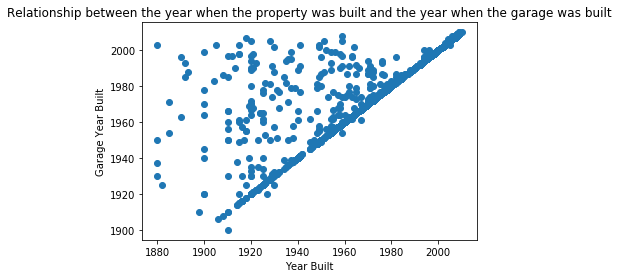

In [27]:
plt.scatter(training_data['YearBuilt'],training_data['GarageYrBlt'] )
plt.xlabel('Year Built')
plt.ylabel('Garage Year Built')
plt.title("Relationship between the year when the property was built and the year when the garage was built")

In [33]:
Year_difference=pd.Series(training_data['GarageYrBlt']-training_data['YearBuilt'])

In [36]:
Year_difference.describe()

count    1379.000000
mean        5.547498
std        16.580490
min       -10.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       123.000000
dtype: float64

# Below are the strategies to deal with the missing values in the dataset:

| Field Name | Comment   |
|------|------|
|   LotFrontage  | Use averge to fill the missing values in the dataset|
|   Alley  | Field excluded|
|   MasVnrType  | These are the only masonry veneer related variables in the dataset. I will include the fields and fill the unknown value with "Unknown"|
|   MasVnrArea  | These are the only masonry veneer related variables in the dataset. I will include the fields. Around of half of the properties have 0 as their MasVnrArea, so I will fill the missing data here with 0 |
|   Basement Related Variables  | Basement related features such as heigh of the basement turn out to be important to predict the sale price. I will keep the features for now and fill the missing fields with "Unknown"|
|   Electrical  | Fill the missing data with "Unknown"|
|   FireplaceQu  | Field excluded|
|   Garage Related Variables  | The Garage Car and Garage Area are the top fields that are closely correlated to sale price. So these Garage related fields might not be useful. I will just fill the missing value with unknown for now. Most of the properties were built the same year when the property was built. So in this case, I will input missing value for the GarageYrBlt sames as the YearBuilt.|
|   PoolQC  | Field excluded|
|   Fence  | Field excluded|
|   MiscFeature  | Field excluded|


# Define a function to deal with the missing value in the training dataset based on the decisions made above:

In [732]:
def imputation_for_missing_value(training_data):
    data=training_data
    data1=data.copy()
    
    # delete the fields that are not needed:
    del data1['Id']
    del data1['Alley']
    del data1['FireplaceQu']
    del data1['PoolQC']
    del data1['Fence']
    del data1['MiscFeature']
    
    # Fill missing value for LotFrontage with mean
    data1['LotFrontage'].fillna(data1['LotFrontage'].mean(), inplace=True)
    
    # Fill missing value with for MasVnrType with "Unknown"
    data1.loc[pd.isnull(data1['MasVnrType']), 'MasVnrType']='Unknown'
    
    # Fill missing value for MasVnrArea with 0 
    data1['MasVnrArea'].fillna(0, inplace=True)
    
    # Fill missing value for Electrical with "Unknown"
    data1.loc[pd.isnull(data1['Electrical']), 'Electrical']='Unknown'
    
    # fill missing value for basement related variable with "Unknown"
    for variable in ['BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2']:
        data1.loc[pd.isnull(data1[variable]), variable]='Unknown'
        
    # fill missing value for garage related variable with "Unknown"
    for variable in ['GarageType','GarageFinish', 'GarageQual', 'GarageCond']:
        data1.loc[pd.isnull(data1[variable]), variable]='Unknown'
        
    # fill missing value GarageYrBlt with YearBuilt
    data1.loc[pd.isnull(data1['GarageYrBlt']), 'GarageYrBlt']=data1.loc[pd.isnull(data1['GarageYrBlt']), 'YearBuilt']

    return data1

In [733]:
training_data_updated=imputation_for_missing_value(training_data)

Export the data to a csv file:

In [72]:
#training_data_updated.to_csv("C:/Users/yuka.abe/Desktop/Untitled Folder/Housing Price Prediction Project/Data/training_data_updated.csv")

# Outlier removal process

# define a function for detecting outliers and filtering out outliers from the dataset:

In [738]:
def func_outlier_detection(dataset, variable_name):
    # Detect the outlier from variable using interquantile calculation:
    interquantile=dataset[variable_name].quantile(0.75) - dataset[variable_name].quantile(0.25)
    interquantile_upper_bound=dataset[variable_name].quantile(0.75)+ 3 * interquantile
    interquantile_lower_bound=dataset[variable_name].quantile(0.25)- 3 * interquantile
    
    # Exclude the data that falls outside of the upper bound or lower bound
    dataset_exclude=dataset.loc[(dataset[variable_name]<=interquantile_upper_bound) & (dataset[variable_name]>=interquantile_lower_bound)]
    
    
    #Print out the distribution of the variable
    print("\n")
    print("Below is the distribution of", variable_name)
    print(dataset[variable_name].describe())

    #Print out the outer fence outerlier upper bound and lower bound

    print("outlier lower bound for", variable_name, ": " , str(interquantile_lower_bound))
    print("outlier upper bound for", variable_name, ": " , str(interquantile_upper_bound) )
    print("Number of data points filtered out based on the outlier detection: ", str(dataset.shape[0]- dataset_exclude.shape[0]))
    
    # Create a histogram to plot the distribution for the independent variable (including the outlier detection)
    plt.figure(figsize=(10, 10))
    sns.distplot(dataset[variable_name], bins=100, hist=True, kde=True, color = 'darkblue',   hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4} )
    plt.axvline(interquantile_upper_bound, color='r', linestyle='--', label='Variable Upper bond: %12.0f'% int(interquantile_upper_bound))
    plt.axvline(interquantile_lower_bound, color='r', linestyle='--', label='Variable lower bond: %12.0f'% int(interquantile_lower_bound))
    plt.title("Variable Distribution (outlier detection included)")
    plt.legend()
    plt.show()
    
    # Create a scatter plot to discover the relationship between variable and sale price:
    plt.figure(figsize=(10, 10))
    plt.scatter(dataset[variable_name], dataset['SalePrice'])
    plt.title("variable versus sale price")
    plt.xlabel(variable_name)
    plt.ylabel("Sale Price")
    plt.legend()
    plt.show()



In [739]:
def func_outlier_filter(dataset, variable_name):
    # Detect the outlier from variable using interquantile calculation:
    interquantile=dataset[variable_name].quantile(0.75) - dataset[variable_name].quantile(0.25)
    interquantile_upper_bound=dataset[variable_name].quantile(0.75)+ 3 * interquantile
    interquantile_lower_bound=dataset[variable_name].quantile(0.25)- 3 * interquantile
    
    # Exclude the data that falls outside of the upper bound or lower bound
    dataset_exclude=dataset.loc[(dataset[variable_name]<=interquantile_upper_bound) & (dataset[variable_name]>=interquantile_lower_bound)]

    #Print out the outer fence outerlier upper bound and lower bound

    print("outlier lower bound for", variable_name, ": " , str(interquantile_lower_bound))
    print("outlier upper bound for", variable_name, ": " , str(interquantile_upper_bound) )
    print("Number of data points filtered out based on the outlier detection: ", str(dataset.shape[0]- dataset_exclude.shape[0]))
    return dataset_exclude

# Below is the outlier detection for the target variable: Sale Price

There are some outliers that are greater than 460,000 for sale price. But I'm okay with it.



Below is the distribution of SalePrice
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
outlier lower bound for SalePrice :  -122100.0
outlier upper bound for SalePrice :  466075.0
Number of data points filtered out based on the outlier detection:  12


C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


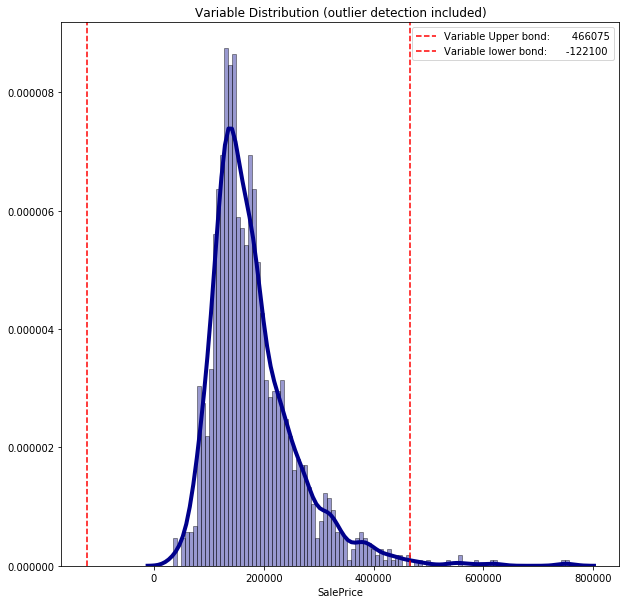

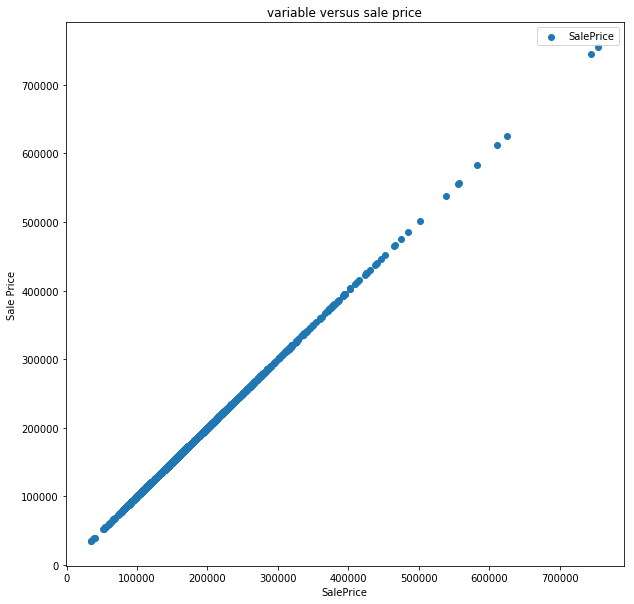

In [518]:
func_outlier_detection(training_data, 'SalePrice')

# Below is the outlier detection for some important numerical precitors:

- GrLivArea: Get rid of the two biggest data points by applying the threshold (<=4600)
- GarageArea: Get rid of the three biggest data points by applying the treshold (<=1300.5)
- TotalBsmtSF: Get rid of the biggest data point by applying the threshold(<=6100)
- BsmtFinSF1: Get rid of the largest data point by applying the threshold (<6110)
- LotFrontage: Get rid of the largest two data poins by applying the threshold (<=300)



Below is the distribution of GrLivArea
count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64
outlier lower bound for GrLivArea :  -812.25
outlier upper bound for GrLivArea :  3718.5
Number of data points filtered out based on the outlier detection:  4


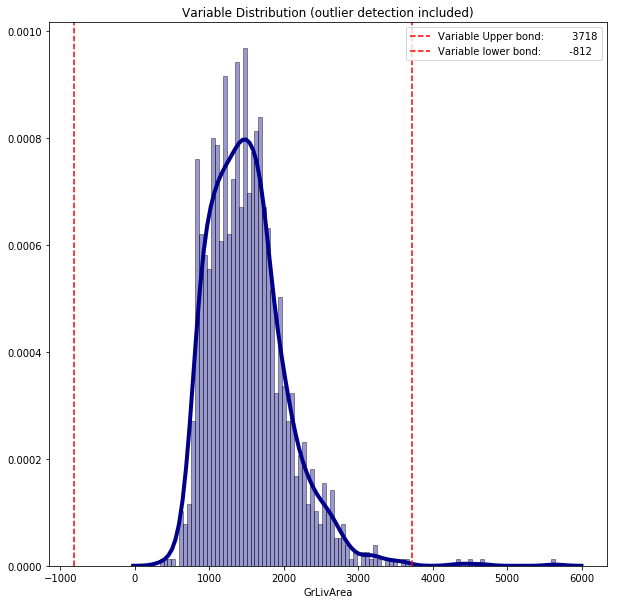

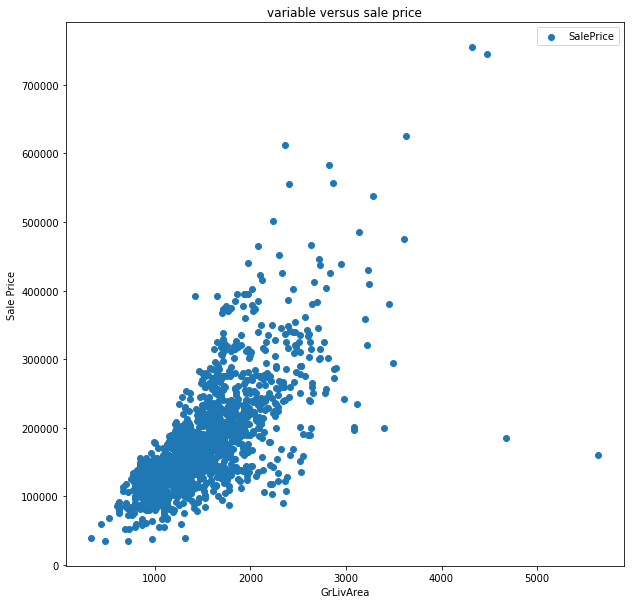



Below is the distribution of GarageCars
count    1460.000000
mean        1.767123
std         0.747315
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64
outlier lower bound for GarageCars :  -2.0
outlier upper bound for GarageCars :  5.0
Number of data points filtered out based on the outlier detection:  0


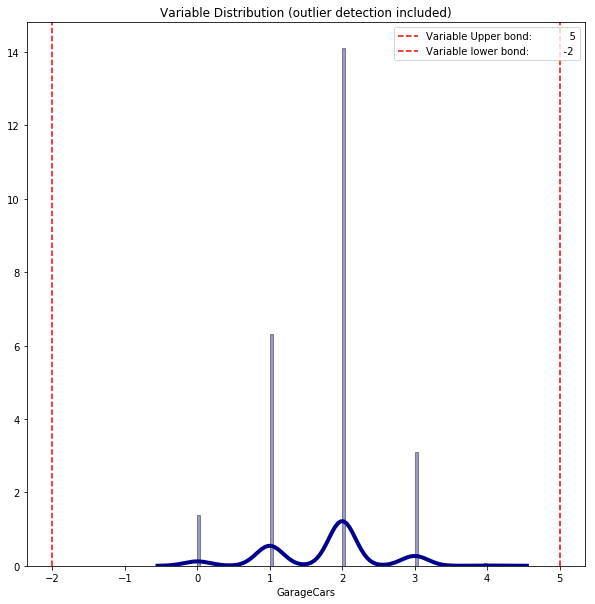

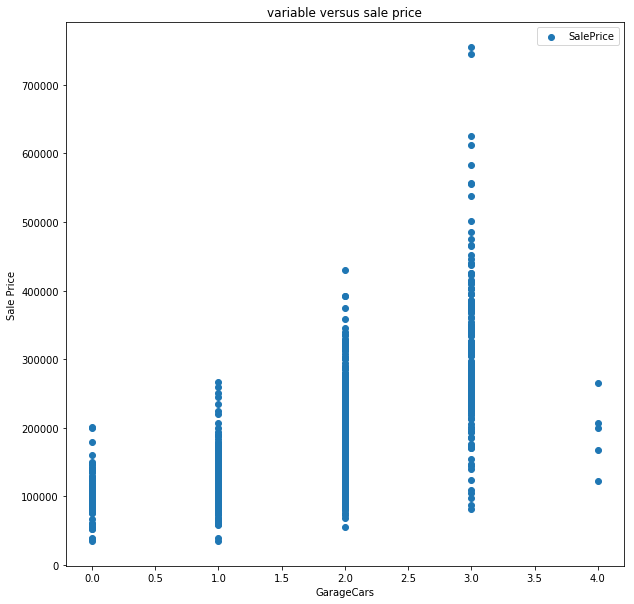



Below is the distribution of GarageArea
count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64
outlier lower bound for GarageArea :  -390.0
outlier upper bound for GarageArea :  1300.5
Number of data points filtered out based on the outlier detection:  3


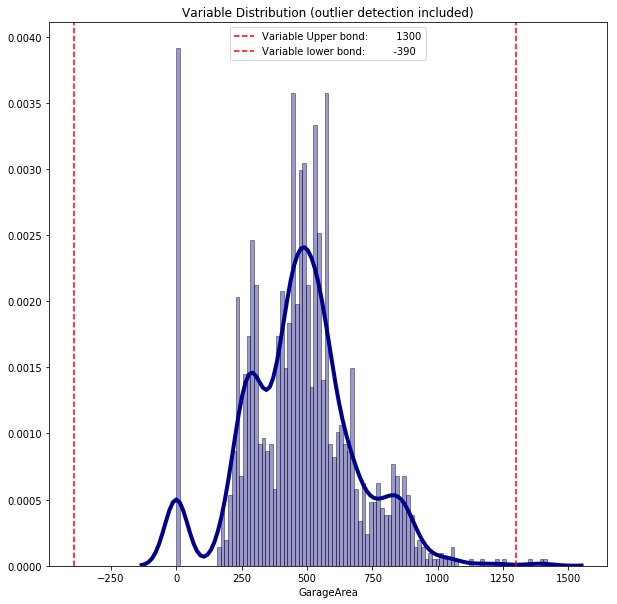

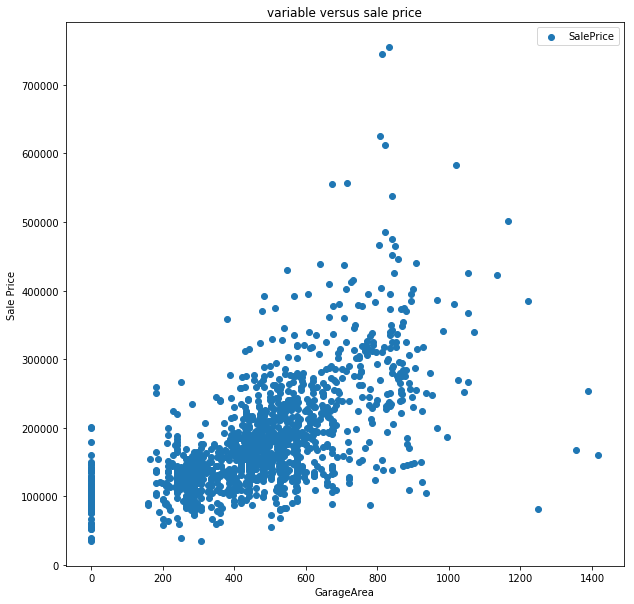



Below is the distribution of TotalBsmtSF
count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64
outlier lower bound for TotalBsmtSF :  -711.75
outlier upper bound for TotalBsmtSF :  2805.75
Number of data points filtered out based on the outlier detection:  5


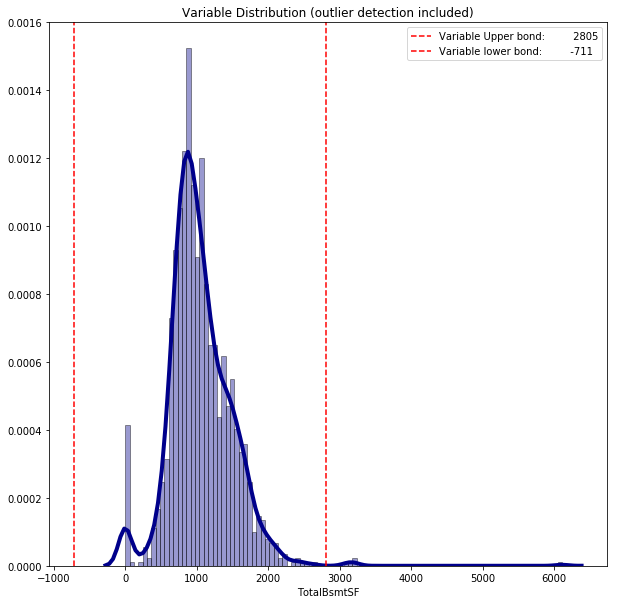

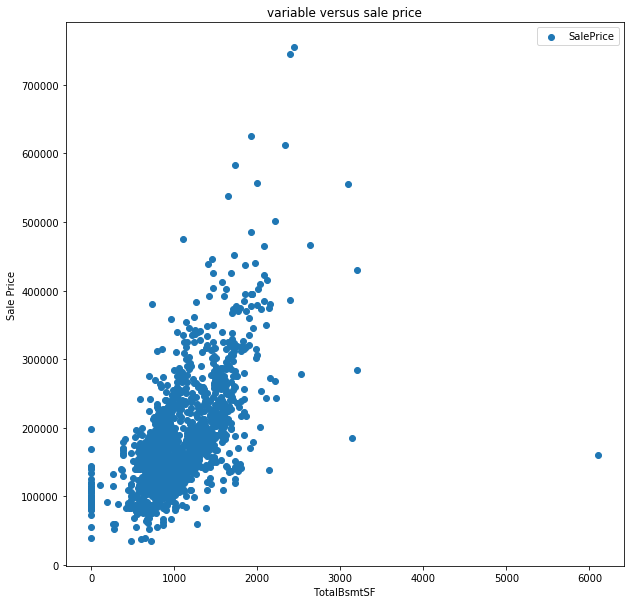



Below is the distribution of 1stFlrSF
count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64
outlier lower bound for 1stFlrSF :  -645.75
outlier upper bound for 1stFlrSF :  2919.0
Number of data points filtered out based on the outlier detection:  3


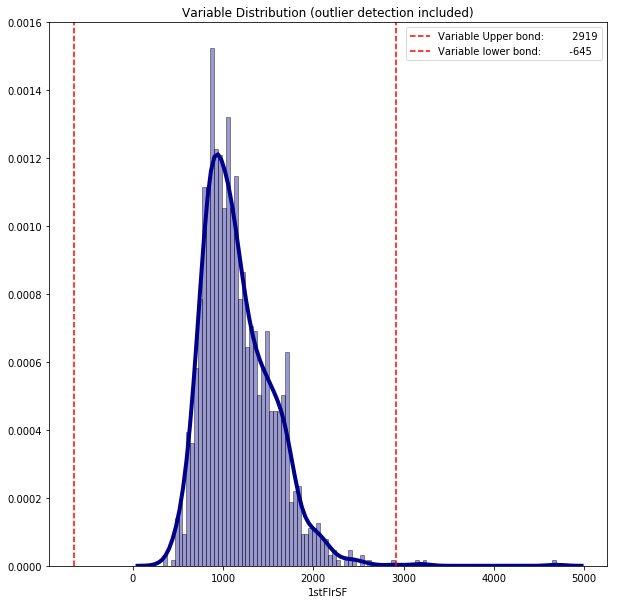

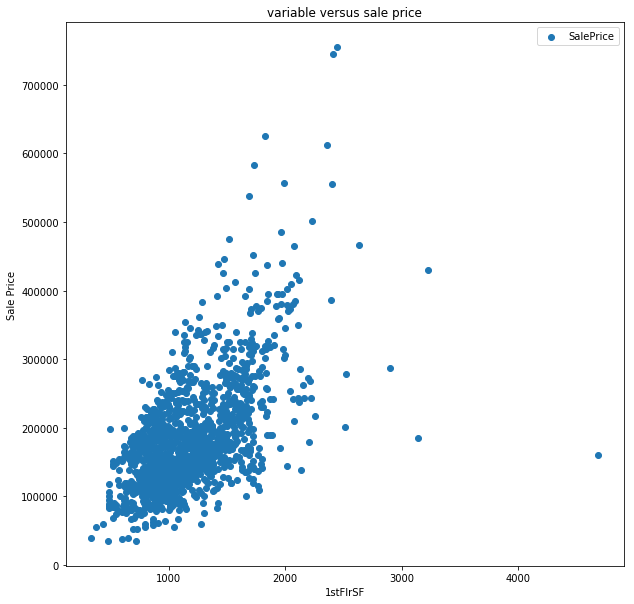



Below is the distribution of FullBath
count    1460.000000
mean        1.565068
std         0.550916
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: FullBath, dtype: float64
outlier lower bound for FullBath :  -2.0
outlier upper bound for FullBath :  5.0
Number of data points filtered out based on the outlier detection:  0


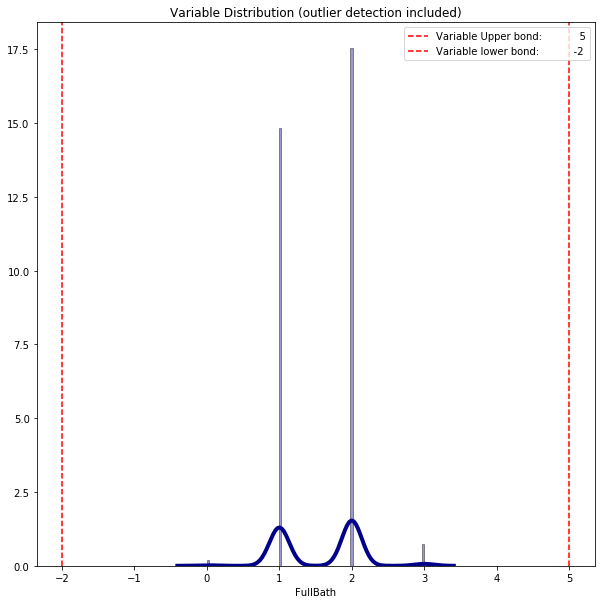

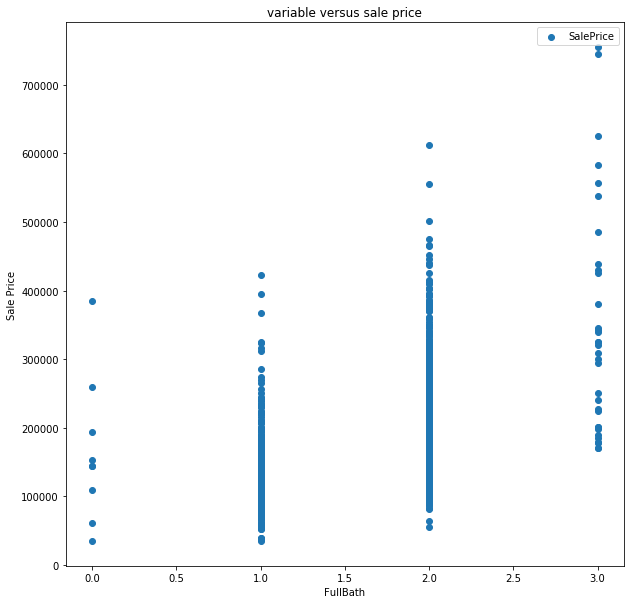



Below is the distribution of TotRmsAbvGrd
count    1460.000000
mean        6.517808
std         1.625393
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64
outlier lower bound for TotRmsAbvGrd :  -1.0
outlier upper bound for TotRmsAbvGrd :  13.0
Number of data points filtered out based on the outlier detection:  1


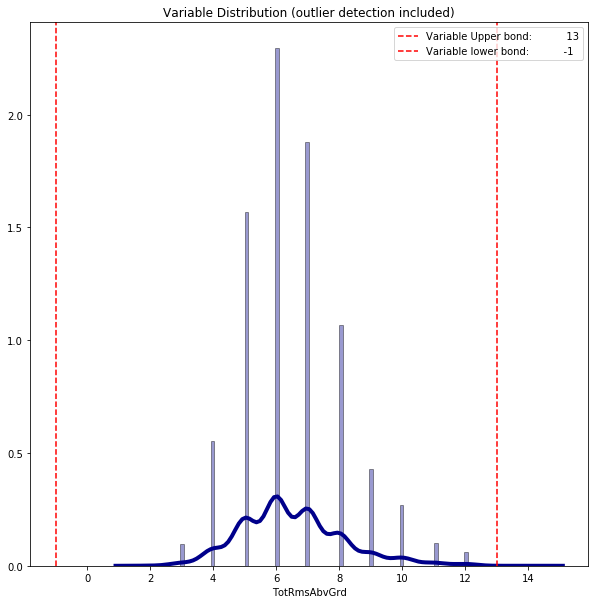

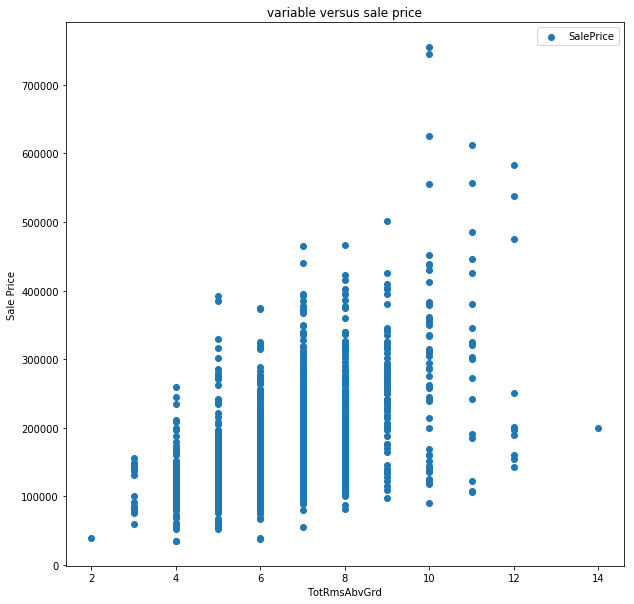



Below is the distribution of MasVnrArea
count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64
outlier lower bound for MasVnrArea :  -498.0
outlier upper bound for MasVnrArea :  664.0
Number of data points filtered out based on the outlier detection:  33


C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


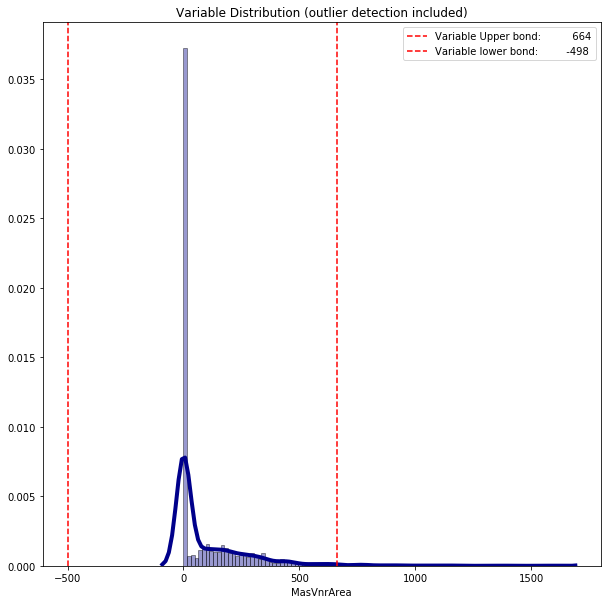

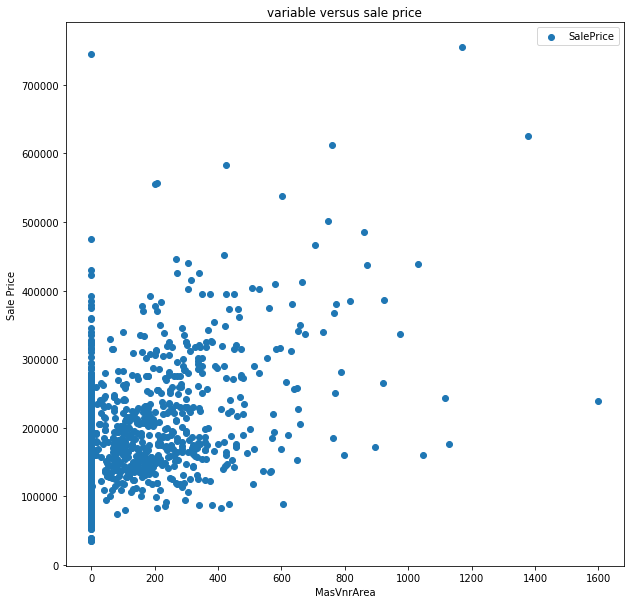



Below is the distribution of Fireplaces
count    1460.000000
mean        0.613014
std         0.644666
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Fireplaces, dtype: float64
outlier lower bound for Fireplaces :  -3.0
outlier upper bound for Fireplaces :  4.0
Number of data points filtered out based on the outlier detection:  0


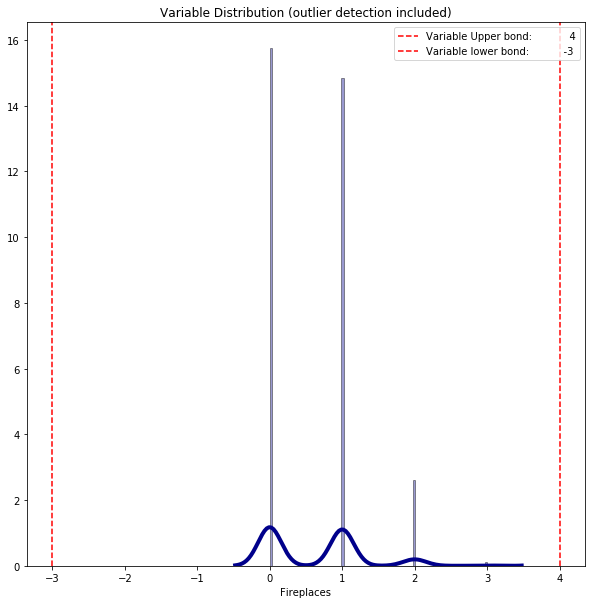

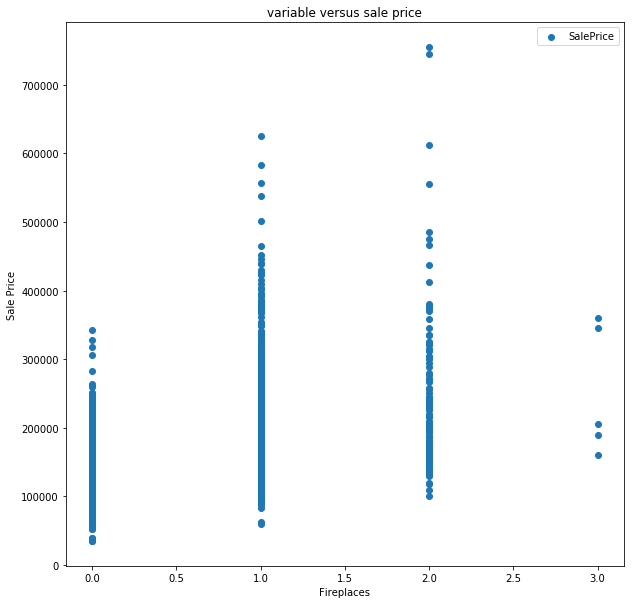



Below is the distribution of BsmtFinSF1
count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
max      5644.000000
Name: BsmtFinSF1, dtype: float64
outlier lower bound for BsmtFinSF1 :  -2136.75
outlier upper bound for BsmtFinSF1 :  2849.0
Number of data points filtered out based on the outlier detection:  1


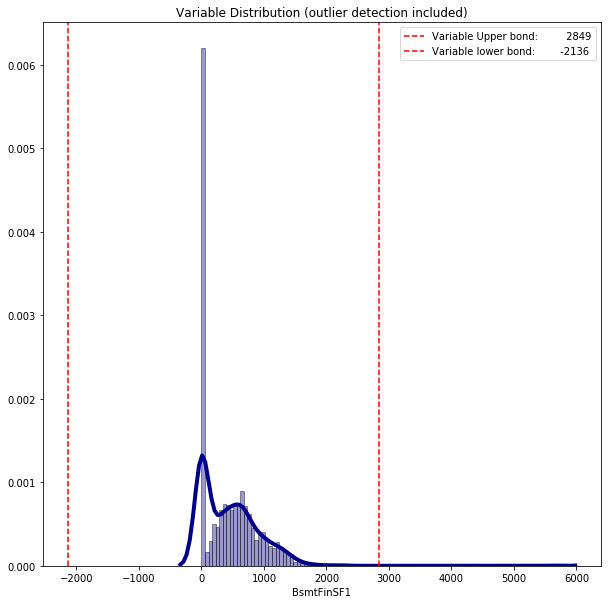

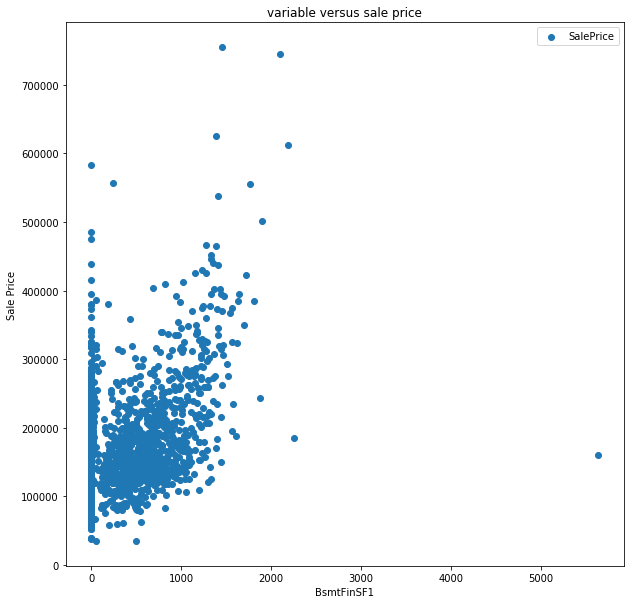



Below is the distribution of LotFrontage
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
outlier lower bound for LotFrontage :  -4.0
outlier upper bound for LotFrontage :  143.0
Number of data points filtered out based on the outlier detection:  271


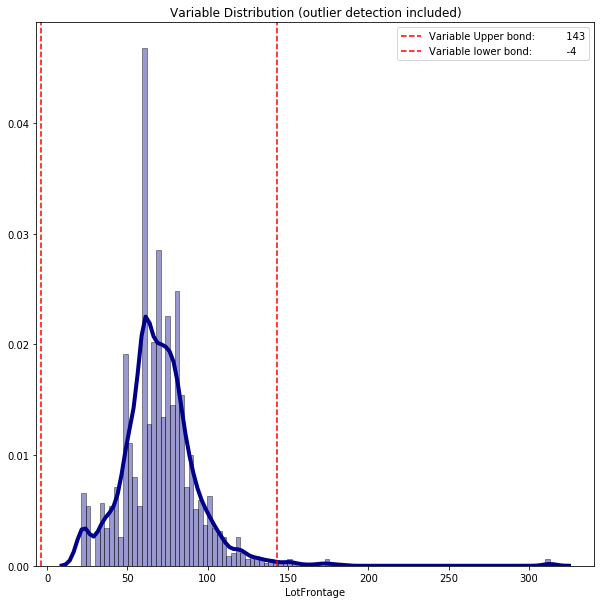

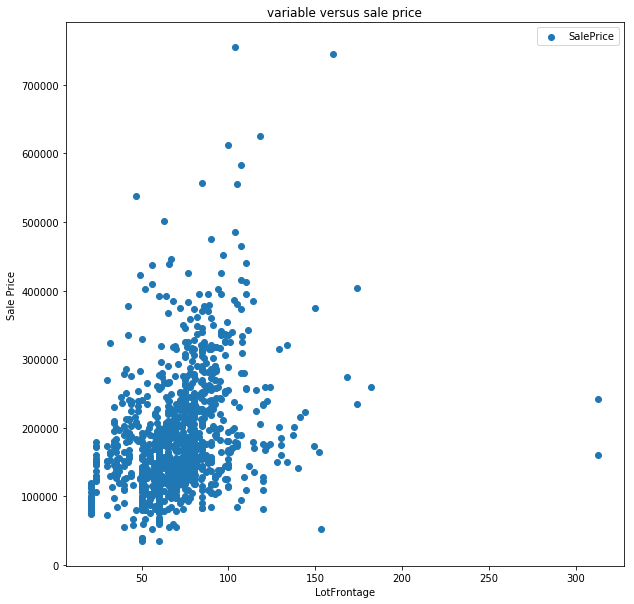



Below is the distribution of WoodDeckSF
count    1460.000000
mean       94.244521
std       125.338794
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max       857.000000
Name: WoodDeckSF, dtype: float64
outlier lower bound for WoodDeckSF :  -504.0
outlier upper bound for WoodDeckSF :  672.0
Number of data points filtered out based on the outlier detection:  3


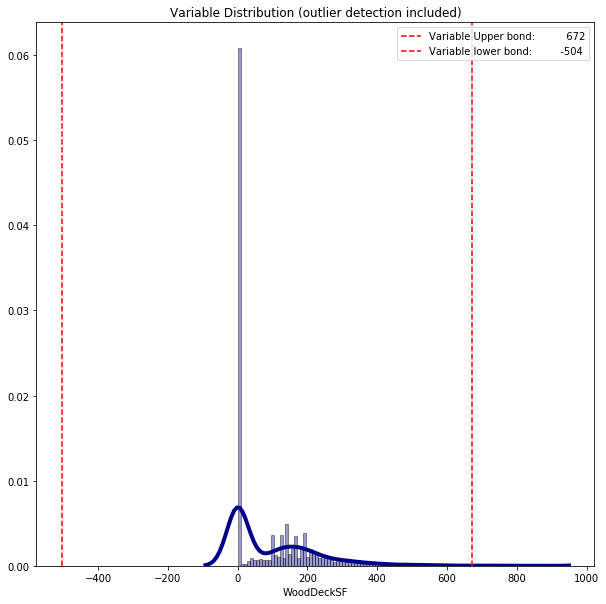

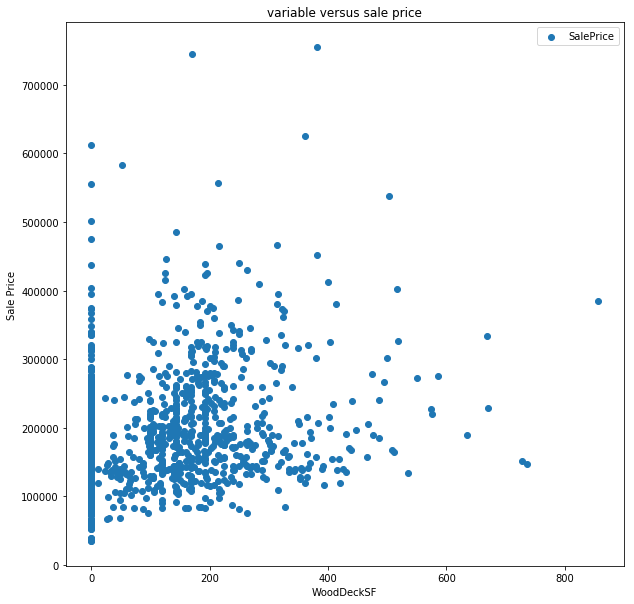



Below is the distribution of 2ndFlrSF
count    1460.000000
mean      346.992466
std       436.528436
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64
outlier lower bound for 2ndFlrSF :  -2184.0
outlier upper bound for 2ndFlrSF :  2912.0
Number of data points filtered out based on the outlier detection:  0


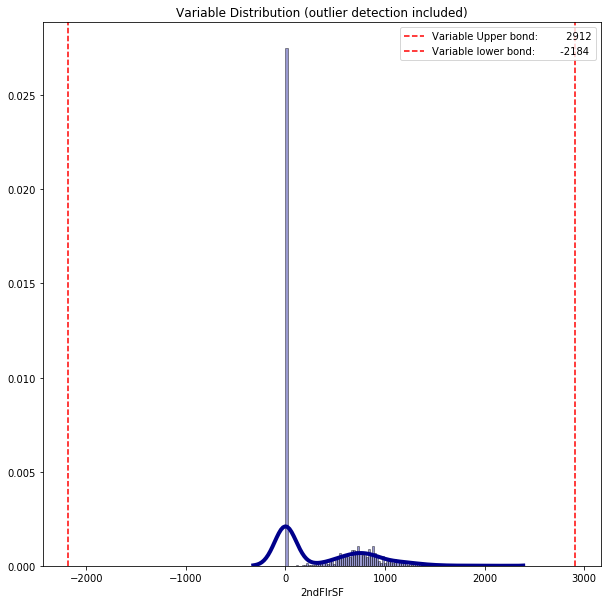

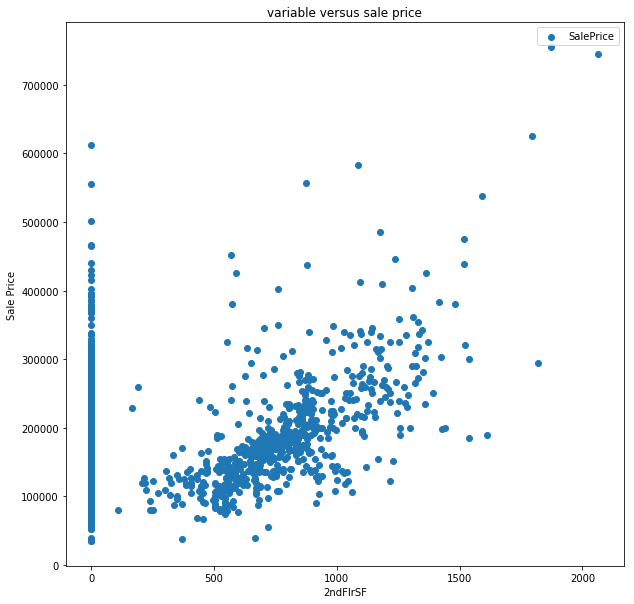



Below is the distribution of OpenPorchSF
count    1460.000000
mean       46.660274
std        66.256028
min         0.000000
25%         0.000000
50%        25.000000
75%        68.000000
max       547.000000
Name: OpenPorchSF, dtype: float64
outlier lower bound for OpenPorchSF :  -204.0
outlier upper bound for OpenPorchSF :  272.0
Number of data points filtered out based on the outlier detection:  18


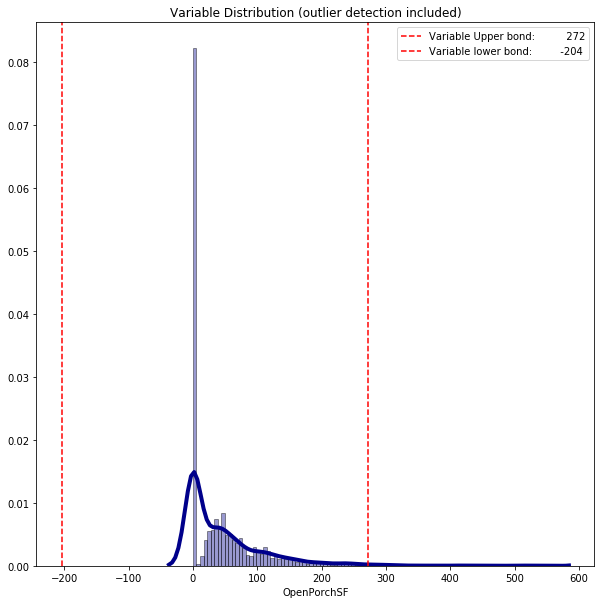

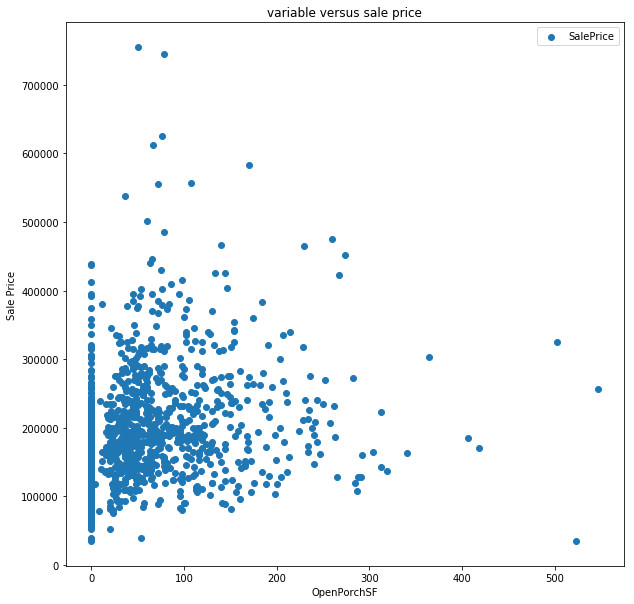



Below is the distribution of HalfBath
count    1460.000000
mean        0.382877
std         0.502885
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: HalfBath, dtype: float64
outlier lower bound for HalfBath :  -3.0
outlier upper bound for HalfBath :  4.0
Number of data points filtered out based on the outlier detection:  0


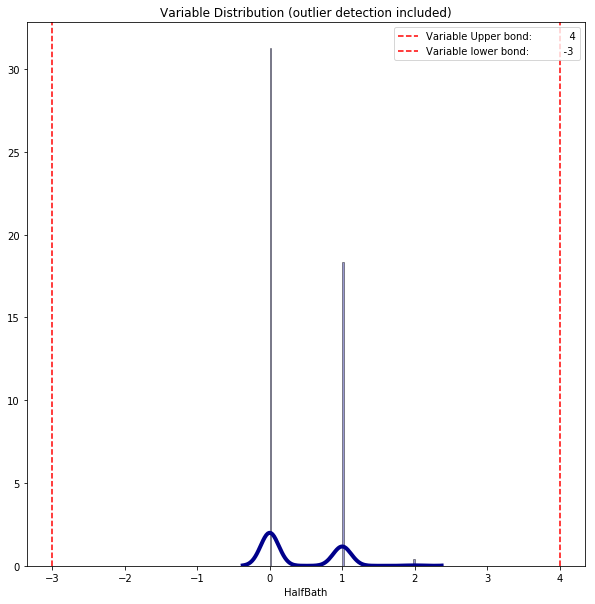

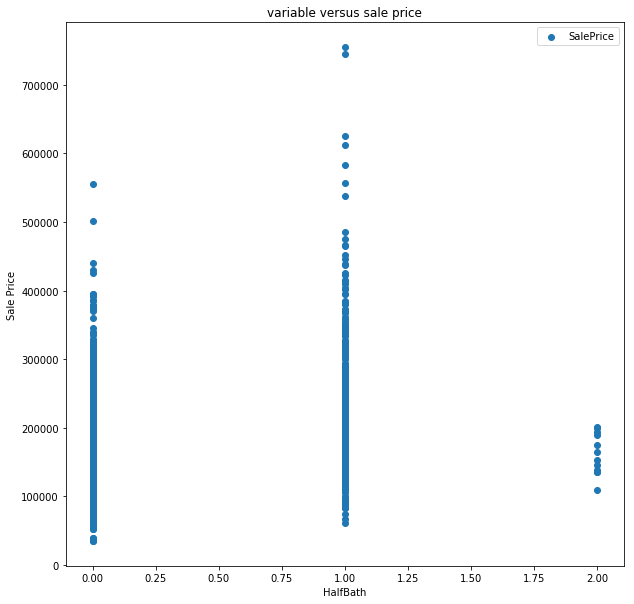

In [519]:
top_15_important_numerical_variables=list(numerical_Variable_Correlation_df['Variable'].head(15))
dataset=training_data
for variable in top_15_important_numerical_variables:
    func_outlier_detection(training_data, variable)

In [740]:
def func_outlier_deletion_numercial_variables(dataset):
    dataset1=dataset.copy()
    dataset1=dataset1.loc[dataset1['GrLivArea']<=4600]
    dataset1=dataset1.loc[dataset1['GarageArea']<=1300.5]
    dataset1=dataset1.loc[dataset1['TotalBsmtSF']<=6100]
    dataset1=dataset1.loc[dataset1['BsmtFinSF1']<6110]
    dataset1=dataset1.loc[dataset1['LotFrontage']<=300]
    return dataset1

In [797]:
training_data_updated_1=func_outlier_deletion_numercial_variables(training_data_updated)

In [742]:
training_data_updated_1.shape

(1455, 75)

# Label encoding for variables:

Transform some of the numerical varaibles that are actually categorical:

In [743]:
def func_variable_encoding(dataset):
    encoding_varaibles_list=[ 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
            'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
            'BsmtFinType2', 'Functional', 'BsmtExposure', 'GarageFinish', 'LandSlope',
            'LotShape', 'PavedDrive', 'Street', 'CentralAir', 'MSSubClass', 'OverallCond', 
            'YrSold', 'MoSold', 'MSZoning',
            'LandContour',
             'Utilities',
             'LotConfig',
             'Neighborhood',
             'Condition1',
             'Condition2',
             'BldgType',
             'HouseStyle',
             'OverallQual',
             'YearBuilt',
             'YearRemodAdd',
             'RoofStyle',
             'RoofMatl',
             'Exterior1st',
             'Exterior2nd',
             'MasVnrType',
             'Foundation',
             'Heating',
             'Electrical',
             'GarageType',
             'GarageYrBlt',
             'SaleType',
             'SaleCondition']
    dataset1=dataset.copy()
    categorical_encoded_variable_list=[]
    for variable_name in encoding_varaibles_list:
        dataset1[variable_name]=dataset1[variable_name].astype('str')
        df_dummies=pd.get_dummies(dataset1[variable_name]).iloc[:,0:-1 ]
        df_dummies.columns=variable_name+'_'+df_dummies.columns
        dataset1=pd.merge(dataset1, df_dummies, left_index=True, right_index=True)
        del dataset1[variable_name]
        for column in df_dummies.columns: 
            categorical_encoded_variable_list.append(column)
    return dataset1, categorical_encoded_variable_list

In [798]:
training_data_updated_2, categorical_encoded_variable_list=func_variable_encoding(training_data_updated_1)

# Adding Features:

In [745]:
def func_adding_features(dataset):
    dataset1=dataset.copy()
    dataset1['TotalSF'] = dataset1['TotalBsmtSF'] + dataset1['1stFlrSF'] + dataset1['2ndFlrSF']  
    return dataset1
    
training_data_updated_3=func_adding_features(training_data_updated_2)

In [746]:
training_data_updated_3.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF   ...     SaleType_ConLI  \
0          856       856       854             0   ...                  0   
1         1262      1262         0             0   ...                  0   
2          920       920       866             0   ...                  0   
3          756       961       756             0   ...                  0   
4         1145      1145      1053             0   ...                  0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleCondition_Abnorml  \
0               0             0             0                      0   
1               0             0             0                      0   
2               0             0             0                      0   
3               0             0             0                      1   
4               0             0             0                      0   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  TotalSF  
0                     1     2566  
1                     1     2524  
2                     1     2706  
3                     0     2473  
4                     1     3343  

[5 rows x 554 columns]

# Variable Transformation

In [835]:
categorical_encoded_variable_list

['BsmtQual_Ex',
 'BsmtQual_Fa',
 'BsmtQual_Gd',
 'BsmtQual_TA',
 'BsmtCond_Fa',
 'BsmtCond_Gd',
 'BsmtCond_Po',
 'BsmtCond_TA',
 'GarageQual_Ex',
 'GarageQual_Fa',
 'GarageQual_Gd',
 'GarageQual_Po',
 'GarageQual_TA',
 'GarageCond_Ex',
 'GarageCond_Fa',
 'GarageCond_Gd',
 'GarageCond_Po',
 'GarageCond_TA',
 'ExterQual_Ex',
 'ExterQual_Fa',
 'ExterQual_Gd',
 'ExterCond_Ex',
 'ExterCond_Fa',
 'ExterCond_Gd',
 'ExterCond_Po',
 'HeatingQC_Ex',
 'HeatingQC_Fa',
 'HeatingQC_Gd',
 'HeatingQC_Po',
 'KitchenQual_Ex',
 'KitchenQual_Fa',
 'KitchenQual_Gd',
 'BsmtFinType1_ALQ',
 'BsmtFinType1_BLQ',
 'BsmtFinType1_GLQ',
 'BsmtFinType1_LwQ',
 'BsmtFinType1_Rec',
 'BsmtFinType1_Unf',
 'BsmtFinType2_ALQ',
 'BsmtFinType2_BLQ',
 'BsmtFinType2_GLQ',
 'BsmtFinType2_LwQ',
 'BsmtFinType2_Rec',
 'BsmtFinType2_Unf',
 'Functional_Maj1',
 'Functional_Maj2',
 'Functional_Min1',
 'Functional_Min2',
 'Functional_Mod',
 'Functional_Sev',
 'BsmtExposure_Av',
 'BsmtExposure_Gd',
 'BsmtExposure_Mn',
 'BsmtExposure_No'

In [747]:
numerical_variable.append('TotalSF')
numerical_variable.append('SalePrice')

In [529]:
variable_list=[]
skewness_list=[]
for variable in [i for i in numerical_variable if i not in encoding_varaibles_list]:
    skewness=training_data_updated_3[variable].skew()
    variable_list.append(variable)
    skewness_list.append(skewness)
skewness_df=pd.DataFrame(list(zip(variable_list, skewness_list)), columns=['feature', 'skewness'])
skewness_df.sort_values(by='skewness', ascending=False)

feature   skewness
27        MiscVal  24.435000
26       PoolArea  15.932369
1         LotArea  12.663606
24      3SsnPorch  10.286243
9    LowQualFinSF   8.995367
16   KitchenAbvGr   4.479607
4      BsmtFinSF2   4.246917
25    ScreenPorch   4.113996
12   BsmtHalfBath   4.095176
23  EnclosedPorch   3.083098
2      MasVnrArea   2.699062
22    OpenPorchSF   2.339665
29      SalePrice   1.884467
21     WoodDeckSF   1.546891
10      GrLivArea   1.015581
5       BsmtUnfSF   0.910891
7        1stFlrSF   0.890632
8        2ndFlrSF   0.809827
28        TotalSF   0.806710
3      BsmtFinSF1   0.765820
0     LotFrontage   0.759135
14       HalfBath   0.679947
17   TotRmsAbvGrd   0.664716
18     Fireplaces   0.635419
11   BsmtFullBath   0.593055
6     TotalBsmtSF   0.510099
15   BedroomAbvGr   0.214235
20     GarageArea   0.045533
13       FullBath   0.032526
19     GarageCars  -0.357687

In [531]:
# Get the features that have over 1 skewness:
skewness_df.loc[skewness_df['skewness']>1].sort_values(by='skewness',ascending=False)

feature   skewness
27        MiscVal  24.435000
26       PoolArea  15.932369
1         LotArea  12.663606
24      3SsnPorch  10.286243
9    LowQualFinSF   8.995367
16   KitchenAbvGr   4.479607
4      BsmtFinSF2   4.246917
25    ScreenPorch   4.113996
12   BsmtHalfBath   4.095176
23  EnclosedPorch   3.083098
2      MasVnrArea   2.699062
22    OpenPorchSF   2.339665
29      SalePrice   1.884467
21     WoodDeckSF   1.546891
10      GrLivArea   1.015581

In [433]:
variables_to_transform=list(skewness_df.loc[skewness_df['skewness']>1].sort_values(by='skewness',ascending=False)['feature'])

In [748]:
def func_variable_log_transformation(dataset):
    #define the list of variables to transform:
    variables_to_transform=['MiscVal',
     'PoolArea',
     'LotArea',
     '3SsnPorch',
     'LowQualFinSF',
     #'KitchenAbvGr', # this is number of kitchen
     'BsmtFinSF2',
     'ScreenPorch',
     #'BsmtHalfBath', # this is number of half baths
     'EnclosedPorch',
     'MasVnrArea',
     'OpenPorchSF',
     'WoodDeckSF',
     'GrLivArea',
     'SalePrice']
    
    dataset1=dataset.copy()
    log_transformation_variable_list=[]
    for variable in variables_to_transform:
        print("Below is the distribution of the ", variable, " before log transformation: ")
        dataset1[variable].hist(bins=100)
        plt.xlabel(variable)
        plt.ylabel("histogram")
        plt.title(variable + " histogram before transformation")
        plt.show()

        new_variable=variable+ " log transformation"
        dataset1[new_variable] = np.log(dataset1[variable]+1)
        del dataset1[variable]

        print("Below is the distribution of the ", variable, " after log transformation: ")
        dataset1[new_variable].hist(bins=100)
        plt.xlabel(new_variable)
        plt.ylabel("histogram")
        plt.title(variable + " histogram after transformation")
        plt.show()
        
        log_transformation_variable_list.append(new_variable)
        
    return dataset1,log_transformation_variable_list
    


Use the func_variable_log_transformation to do the log transformation of the variables:

Below is the distribution of the  MiscVal  before log transformation: 


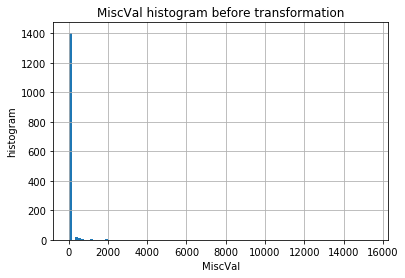

Below is the distribution of the  MiscVal  after log transformation: 


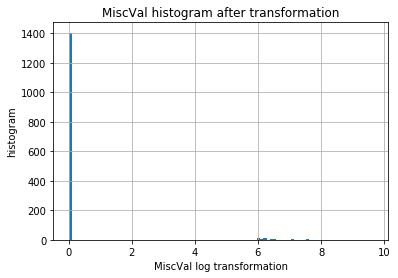

Below is the distribution of the  PoolArea  before log transformation: 


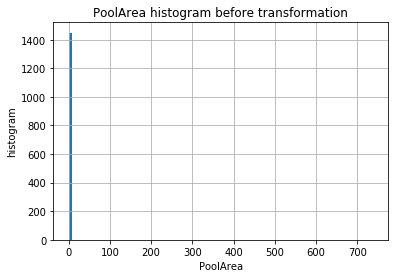

Below is the distribution of the  PoolArea  after log transformation: 


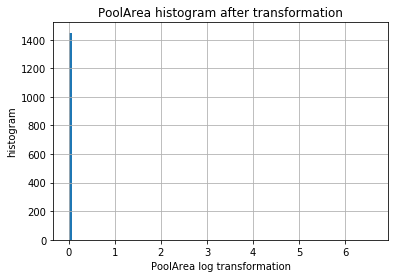

Below is the distribution of the  LotArea  before log transformation: 


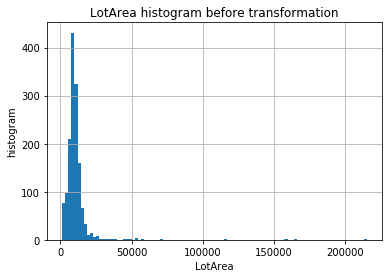

Below is the distribution of the  LotArea  after log transformation: 


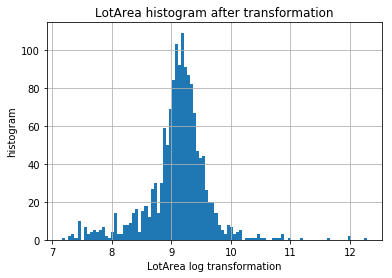

Below is the distribution of the  3SsnPorch  before log transformation: 


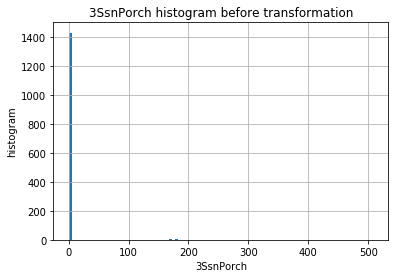

Below is the distribution of the  3SsnPorch  after log transformation: 


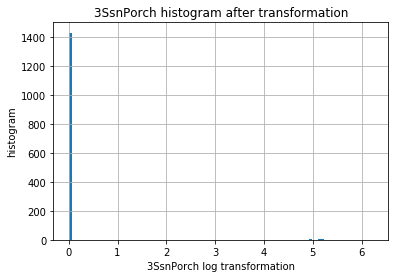

Below is the distribution of the  LowQualFinSF  before log transformation: 


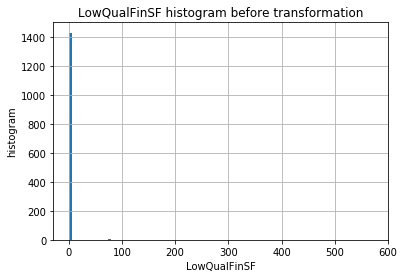

Below is the distribution of the  LowQualFinSF  after log transformation: 


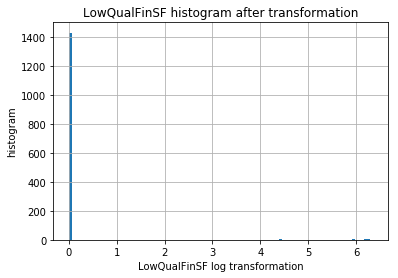

Below is the distribution of the  BsmtFinSF2  before log transformation: 


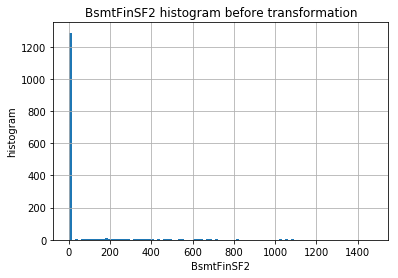

Below is the distribution of the  BsmtFinSF2  after log transformation: 


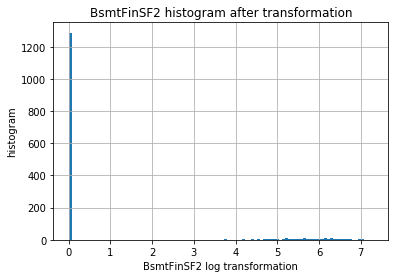

Below is the distribution of the  ScreenPorch  before log transformation: 


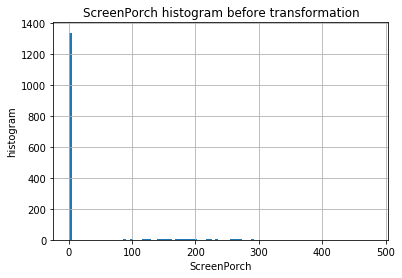

Below is the distribution of the  ScreenPorch  after log transformation: 


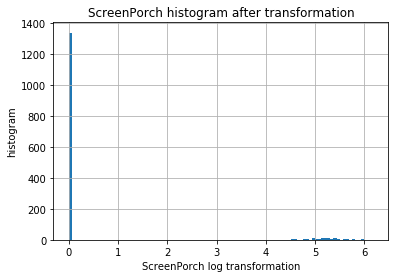

Below is the distribution of the  EnclosedPorch  before log transformation: 


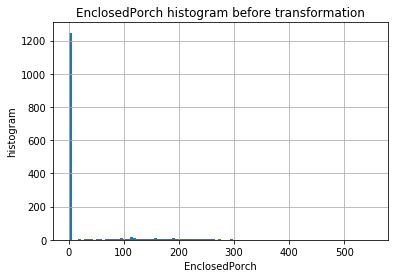

Below is the distribution of the  EnclosedPorch  after log transformation: 


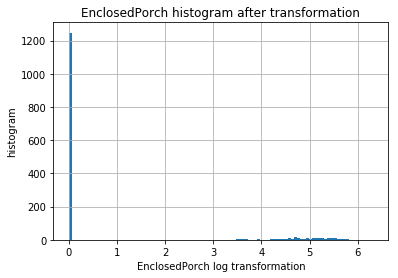

Below is the distribution of the  MasVnrArea  before log transformation: 


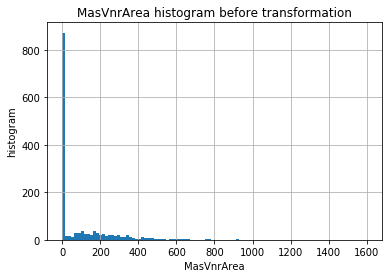

Below is the distribution of the  MasVnrArea  after log transformation: 


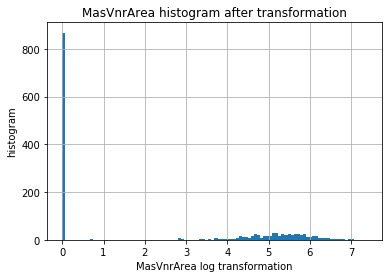

Below is the distribution of the  OpenPorchSF  before log transformation: 


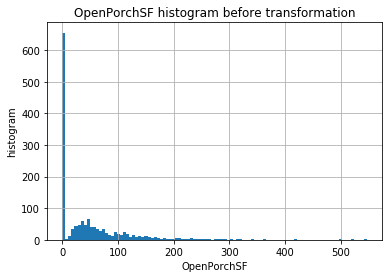

Below is the distribution of the  OpenPorchSF  after log transformation: 


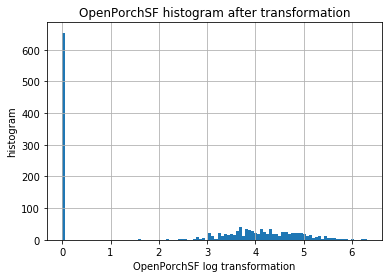

Below is the distribution of the  WoodDeckSF  before log transformation: 


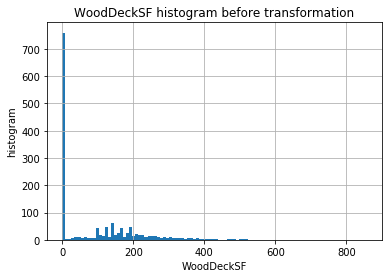

Below is the distribution of the  WoodDeckSF  after log transformation: 


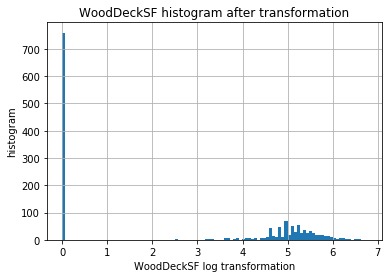

Below is the distribution of the  GrLivArea  before log transformation: 


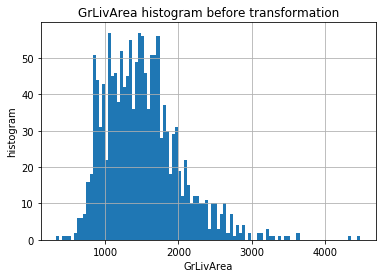

Below is the distribution of the  GrLivArea  after log transformation: 


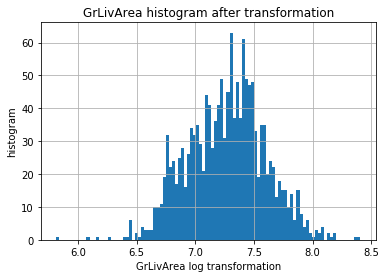

Below is the distribution of the  SalePrice  before log transformation: 


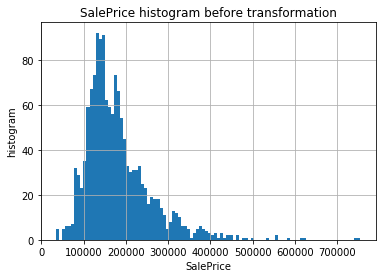

Below is the distribution of the  SalePrice  after log transformation: 


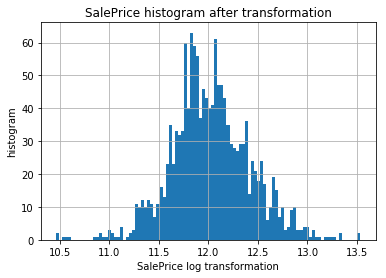

In [749]:
training_data_updated_log_transformed, log_transformed_new_variables_list=func_variable_log_transformation(training_data_updated_3)

In [750]:
def func_variable_boxcox_transformation(dataset):
    lam = 0.15
    #define the list of variables to transform:
    variables_to_transform=['MiscVal',
     'PoolArea',
     'LotArea',
     '3SsnPorch',
     'LowQualFinSF',
     #'KitchenAbvGr', # this is number of kitchen
     'BsmtFinSF2',
     'ScreenPorch',
     #'BsmtHalfBath', # this is number of half baths
     'EnclosedPorch',
     'MasVnrArea',
     'OpenPorchSF',
     'WoodDeckSF',
     'SalePrice',
     'GrLivArea']
    
    dataset1=dataset.copy()
    boxcox_transformation_variable_list=[]
    for variable in variables_to_transform:
        print("Below is the distribution of the ", variable, " before boxcox transformation: ")
        dataset1[variable].hist(bins=100)
        plt.xlabel(variable)
        plt.ylabel("histogram")
        plt.title(variable + " histogram before transformation")
        plt.show()

        new_variable=variable+ " boxcox transformation"
        dataset1[new_variable] = boxcox1p(dataset1[variable], lam)
        del dataset1[variable]

        print("Below is the distribution of the ", variable, " after boxcox transformation: ")
        dataset1[new_variable].hist(bins=100)
        plt.xlabel(new_variable)
        plt.ylabel("histogram")
        plt.title(variable + " histogram after transformation")
        plt.show()

        boxcox_transformation_variable_list.append(new_variable)
        
        
    return dataset1, boxcox_transformation_variable_list

    


Use the boxcox transformation to do the variable transformation for the highly skewed varaibles:

Below is the distribution of the  MiscVal  before boxcox transformation: 


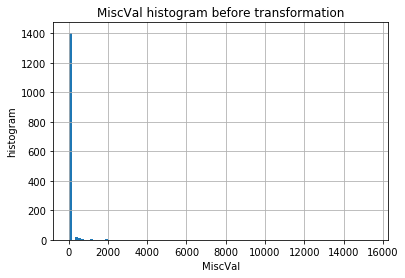

Below is the distribution of the  MiscVal  after boxcox transformation: 


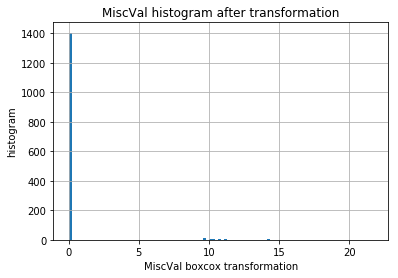

Below is the distribution of the  PoolArea  before boxcox transformation: 


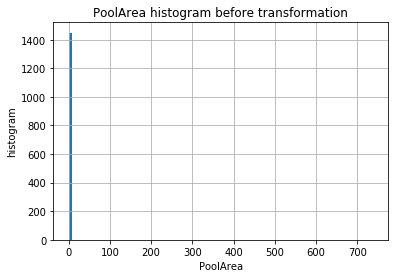

Below is the distribution of the  PoolArea  after boxcox transformation: 


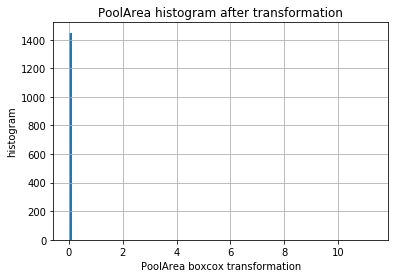

Below is the distribution of the  LotArea  before boxcox transformation: 


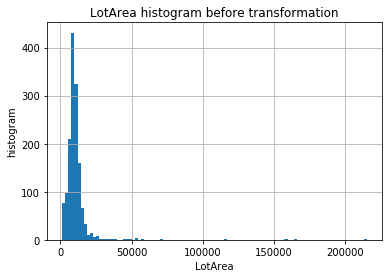

Below is the distribution of the  LotArea  after boxcox transformation: 


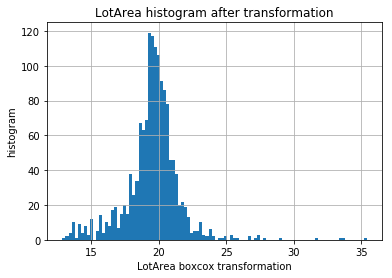

Below is the distribution of the  3SsnPorch  before boxcox transformation: 


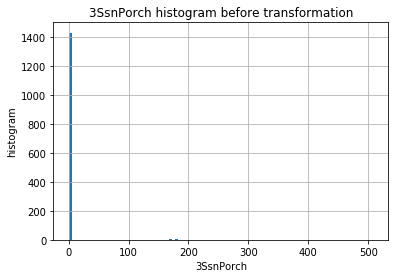

Below is the distribution of the  3SsnPorch  after boxcox transformation: 


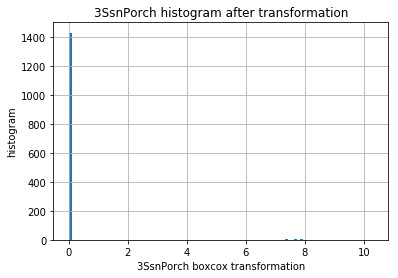

Below is the distribution of the  LowQualFinSF  before boxcox transformation: 


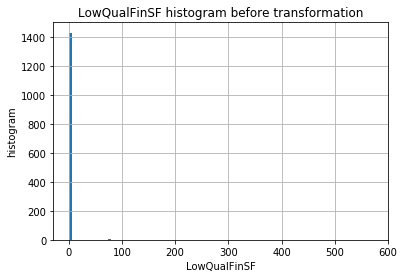

Below is the distribution of the  LowQualFinSF  after boxcox transformation: 


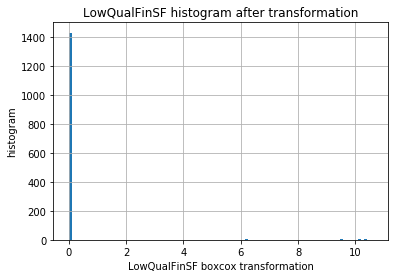

Below is the distribution of the  BsmtFinSF2  before boxcox transformation: 


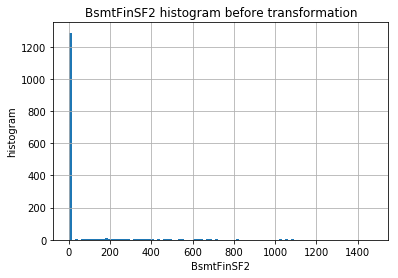

Below is the distribution of the  BsmtFinSF2  after boxcox transformation: 


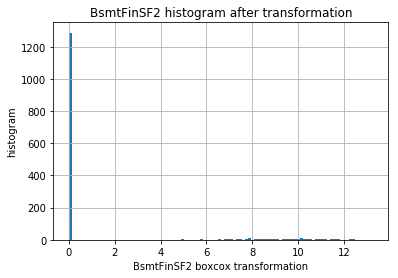

Below is the distribution of the  ScreenPorch  before boxcox transformation: 


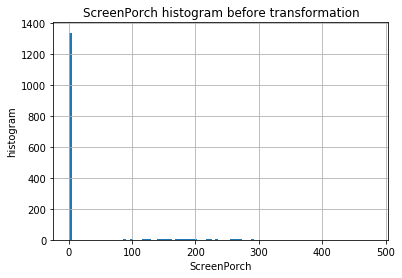

Below is the distribution of the  ScreenPorch  after boxcox transformation: 


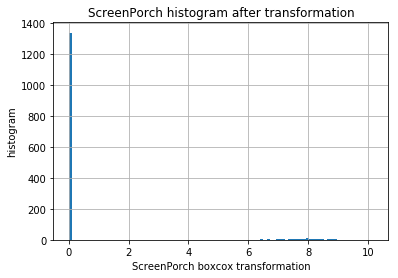

Below is the distribution of the  EnclosedPorch  before boxcox transformation: 


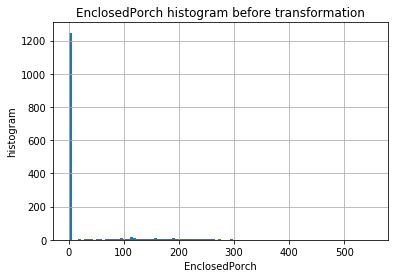

Below is the distribution of the  EnclosedPorch  after boxcox transformation: 


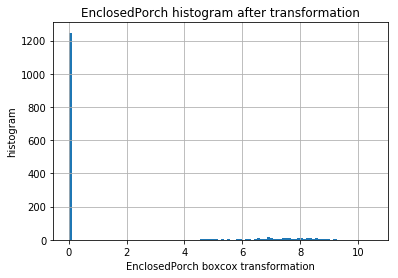

Below is the distribution of the  MasVnrArea  before boxcox transformation: 


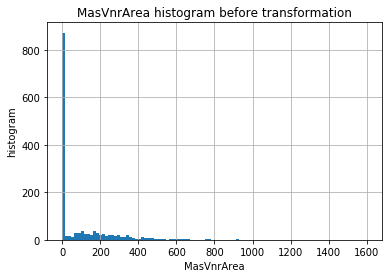

Below is the distribution of the  MasVnrArea  after boxcox transformation: 


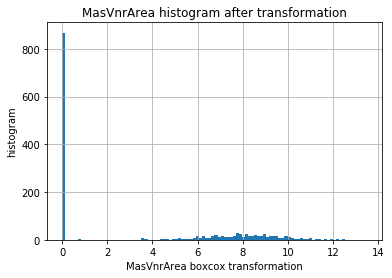

Below is the distribution of the  OpenPorchSF  before boxcox transformation: 


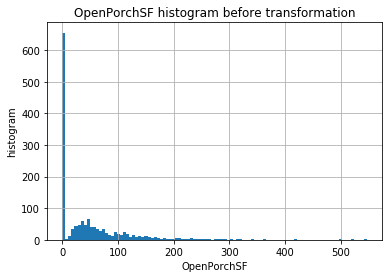

Below is the distribution of the  OpenPorchSF  after boxcox transformation: 


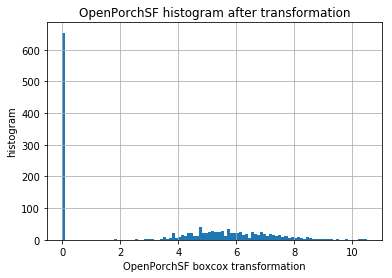

Below is the distribution of the  WoodDeckSF  before boxcox transformation: 


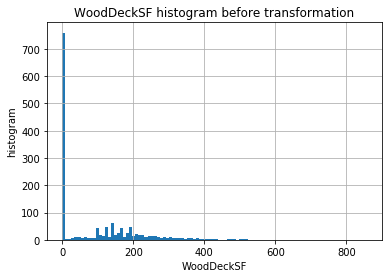

Below is the distribution of the  WoodDeckSF  after boxcox transformation: 


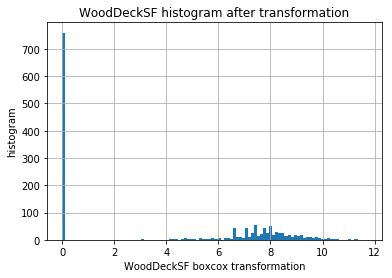

Below is the distribution of the  SalePrice  before boxcox transformation: 


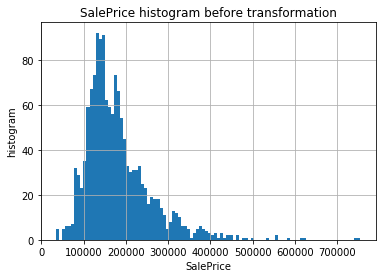

Below is the distribution of the  SalePrice  after boxcox transformation: 


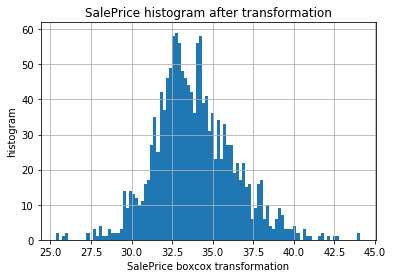

Below is the distribution of the  GrLivArea  before boxcox transformation: 


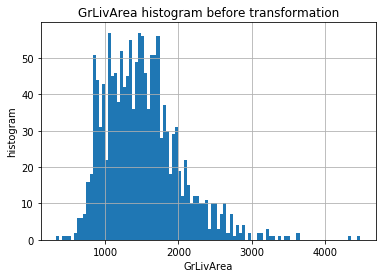

Below is the distribution of the  GrLivArea  after boxcox transformation: 


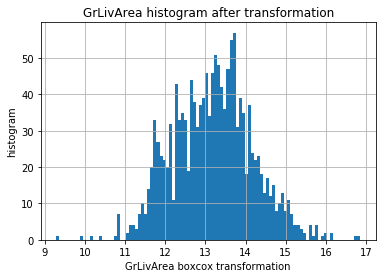

In [751]:
training_data_updated_boxcox_transformed, boxcox_transformed_new_variables_list=func_variable_boxcox_transformation(training_data_updated_3)

# Scale the numeric data and compare on the distribution before and after using the minmax scaler:

In [776]:
def func_variable_min_max_varaible_scaling(dataset):
    
    # Create a copy for the dataset:
    dataset1=dataset.copy()
    
    # Create a list of the numerical variable from the dataset columns and exclude the encoded categorical variables:
    numerical_variable_list=[f for f in dataset1.columns if f not in categorical_encoded_variable_list]

    
    new_variable_name_list=[]
    old_variable_list=[]
    for variable in numerical_variable_list:
        #Use the min max scaler to scale the data:

        new_variable_name=variable+" MinMaxScaled"
        Scaled_variable=MinMaxScaler().fit_transform(dataset1[variable].values.reshape(-1, 1))
        remapped_Scaled_variable=pd.Series(map(lambda x: x[0], Scaled_variable))
        rescaled_new_variable=pd.DataFrame(remapped_Scaled_variable, index=dataset1.index, columns=[new_variable_name])
        
        dataset1=pd.merge(dataset1,rescaled_new_variable, left_index=True, right_index=True )
        
        #Create visualizations to compare on the distribution of the variable before and after minmaxscaling:
        print("Distribution Before MinMax Scaling: ")
        dataset1[variable].hist(bins=100)
        plt.xlabel(variable)
        plt.ylabel("histogram")
        plt.title(variable + " histogram before MinMax scaling")
        plt.show()

        print("Distribution After MinMax Scaling: ")
        dataset1[new_variable_name].hist(bins=100)
        plt.xlabel(new_variable_name)
        plt.ylabel("histogram")
        plt.title(variable + " histogram after MinMax scaling")
        plt.show()

        new_variable_name_list.append(new_variable_name)
        

    # After the varaibles being scaled, compare on the scatter plot between scaled and non_scaled variables relationship with the target variable: SalePrice
    for pair in list(zip(numerical_variable_list, new_variable_name_list)):
        
        print("Relationship between variable and sale price before minmax scaling:")
        plt.scatter(dataset1[pair[0]], dataset1[dataset1.columns[dataset1.columns.str.contains("SalePrice")].values[0]])
        plt.xlabel(pair[0])
        plt.ylabel(dataset1.columns[dataset1.columns.str.contains("SalePrice")].values[0])
        plt.show()

        print("Relationship between variable and sale price after minmax scaling:")
        plt.scatter(dataset1[pair[1]], dataset1[dataset1.columns[dataset1.columns.str.contains("SalePrice")].values[1]])
        plt.xlabel(pair[1])
        plt.ylabel(dataset1.columns[dataset1.columns.str.contains("SalePrice")].values[1])
        plt.show()
        
        old_variable_list.append(pair[0])
    
    for variable in old_variable_list:
        del dataset1[variable]
    
    dataset1=dataset1.fillna(0)
    
    return dataset1, new_variable_name_list

Scale the numerical varaibles in the log transformed dataset:

Distribution Before MinMax Scaling: 


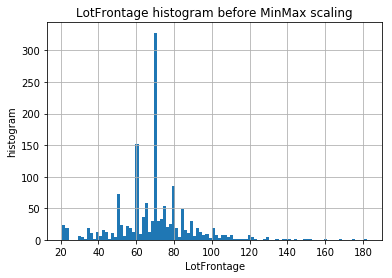

Distribution After MinMax Scaling: 


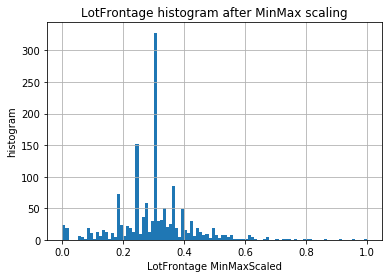

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Distribution Before MinMax Scaling: 


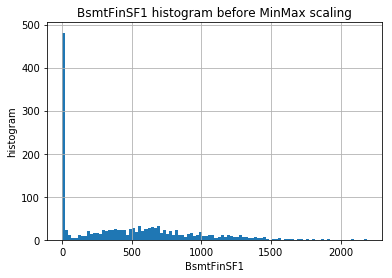

Distribution After MinMax Scaling: 


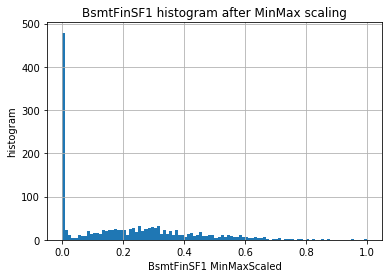

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Distribution Before MinMax Scaling: 


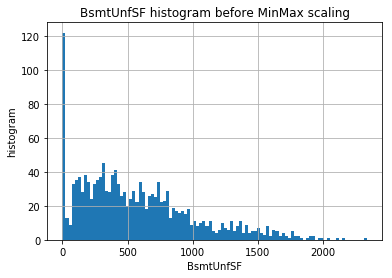

Distribution After MinMax Scaling: 


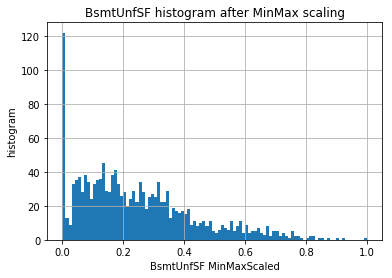

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Distribution Before MinMax Scaling: 


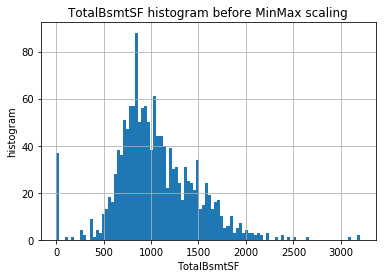

Distribution After MinMax Scaling: 


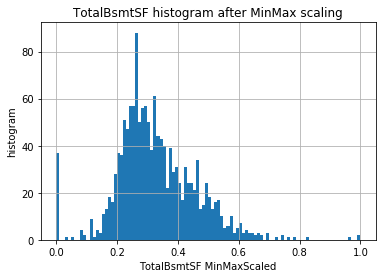

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Distribution Before MinMax Scaling: 


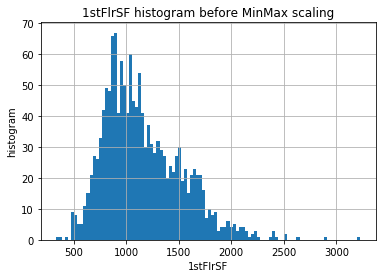

Distribution After MinMax Scaling: 


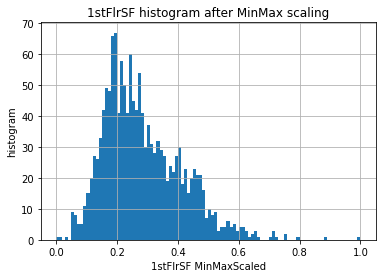

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Distribution Before MinMax Scaling: 


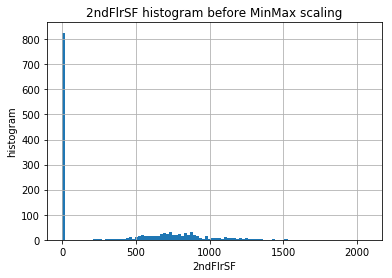

Distribution After MinMax Scaling: 


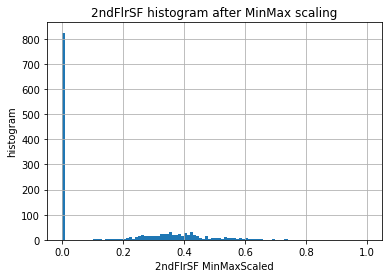

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Distribution Before MinMax Scaling: 


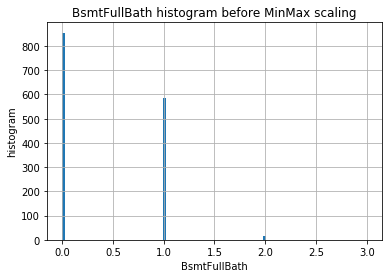

Distribution After MinMax Scaling: 


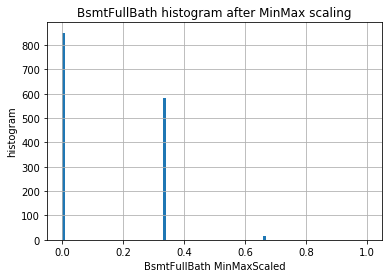

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Distribution Before MinMax Scaling: 


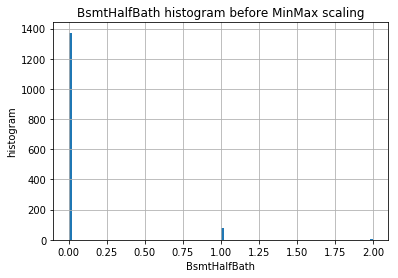

Distribution After MinMax Scaling: 


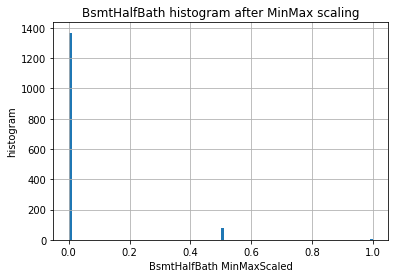

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Distribution Before MinMax Scaling: 


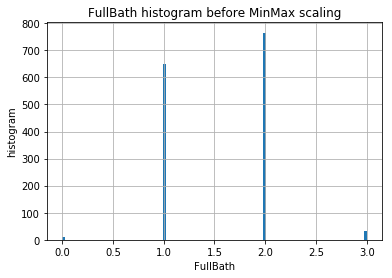

Distribution After MinMax Scaling: 


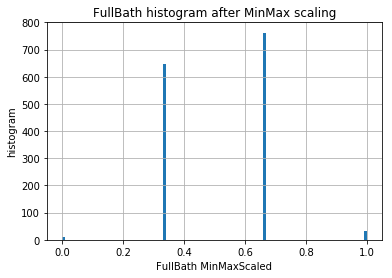

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Distribution Before MinMax Scaling: 


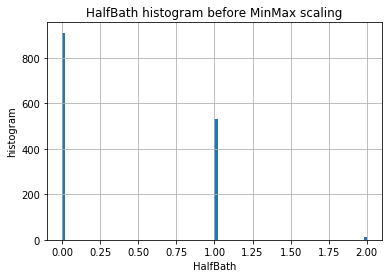

Distribution After MinMax Scaling: 


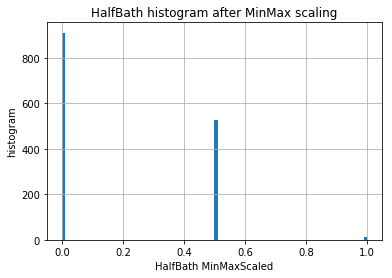

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Distribution Before MinMax Scaling: 


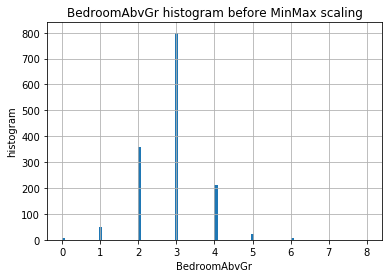

Distribution After MinMax Scaling: 


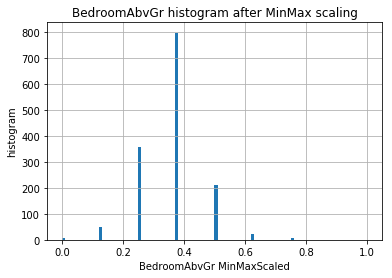

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Distribution Before MinMax Scaling: 


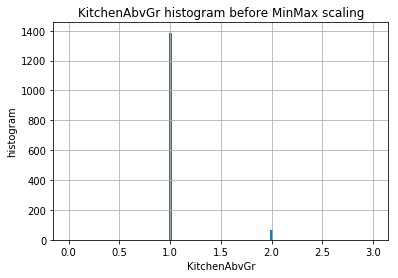

Distribution After MinMax Scaling: 


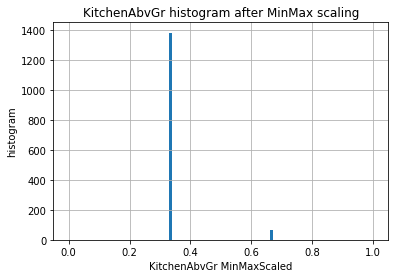

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Distribution Before MinMax Scaling: 


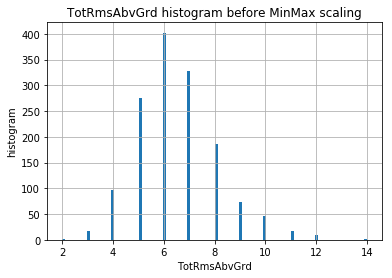

Distribution After MinMax Scaling: 


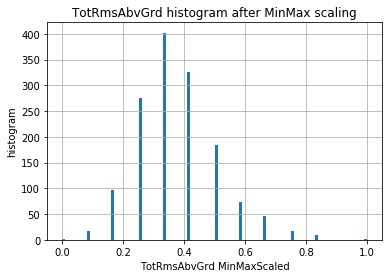

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Distribution Before MinMax Scaling: 


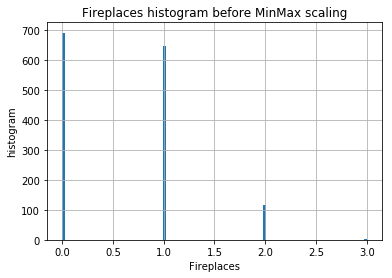

Distribution After MinMax Scaling: 


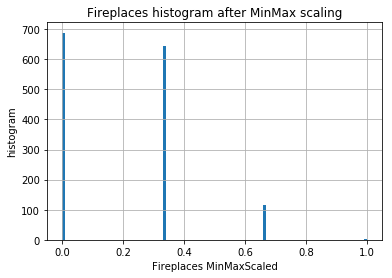

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Distribution Before MinMax Scaling: 


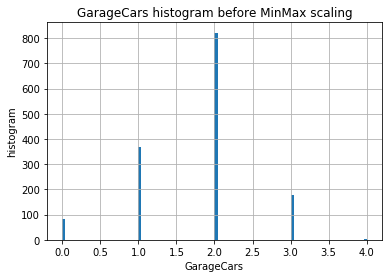

Distribution After MinMax Scaling: 


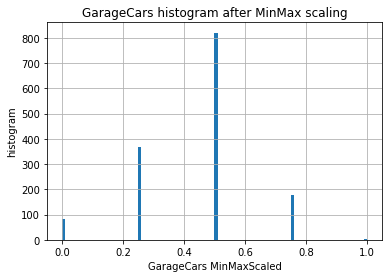

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Distribution Before MinMax Scaling: 


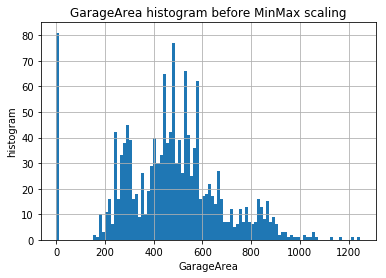

Distribution After MinMax Scaling: 


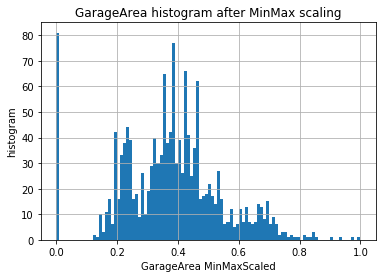

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Distribution Before MinMax Scaling: 


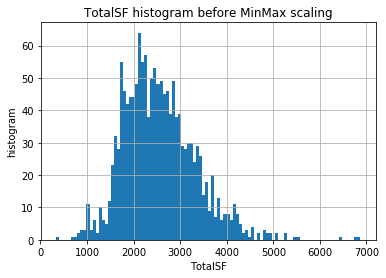

Distribution After MinMax Scaling: 


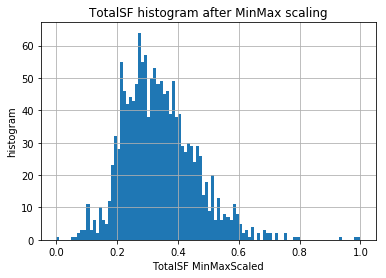

Distribution Before MinMax Scaling: 


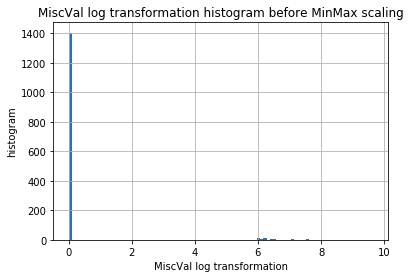

Distribution After MinMax Scaling: 


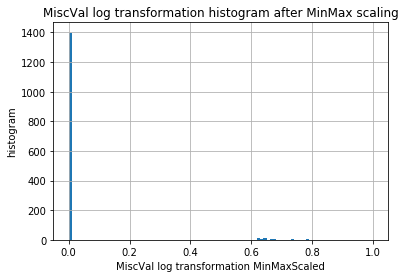

Distribution Before MinMax Scaling: 


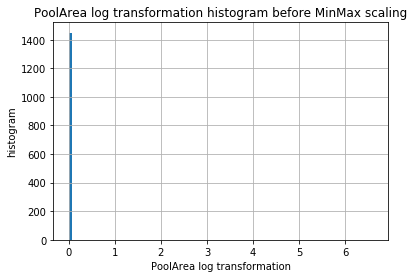

Distribution After MinMax Scaling: 


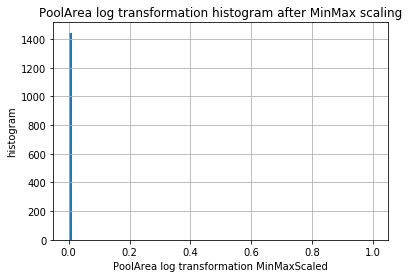

Distribution Before MinMax Scaling: 


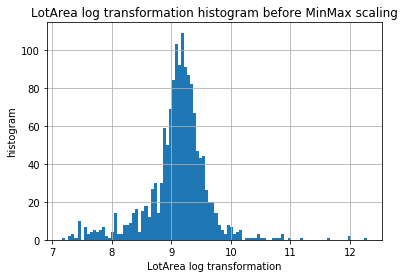

Distribution After MinMax Scaling: 


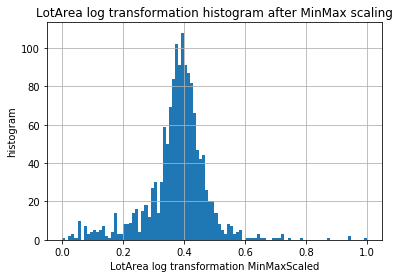

Distribution Before MinMax Scaling: 


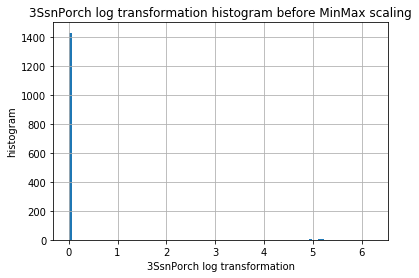

Distribution After MinMax Scaling: 


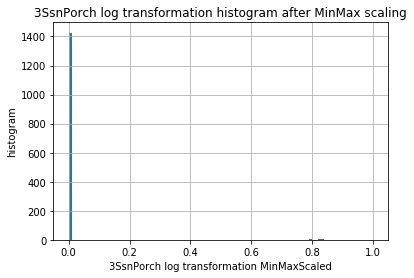

Distribution Before MinMax Scaling: 


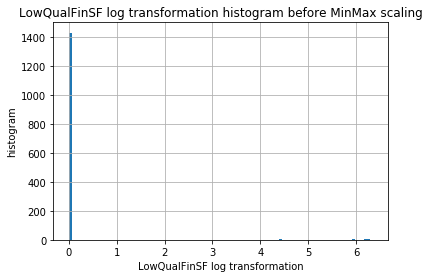

Distribution After MinMax Scaling: 


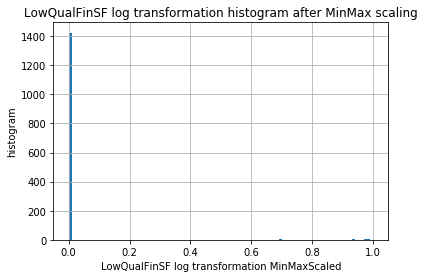

Distribution Before MinMax Scaling: 


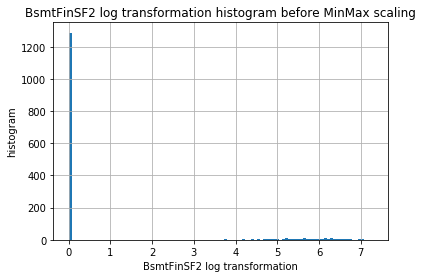

Distribution After MinMax Scaling: 


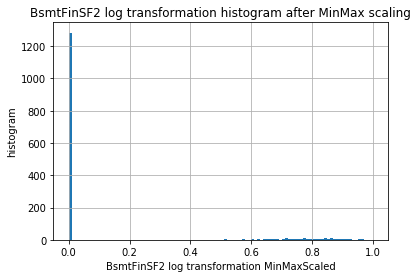

Distribution Before MinMax Scaling: 


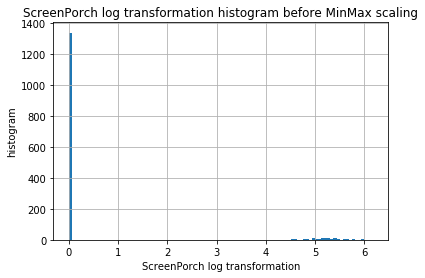

Distribution After MinMax Scaling: 


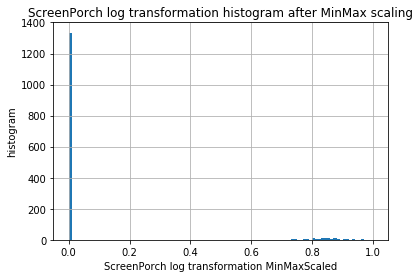

Distribution Before MinMax Scaling: 


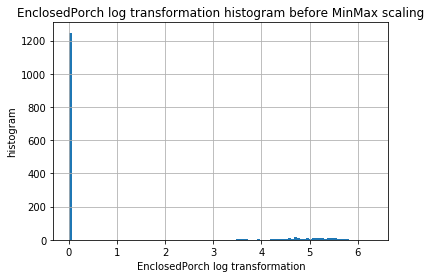

Distribution After MinMax Scaling: 


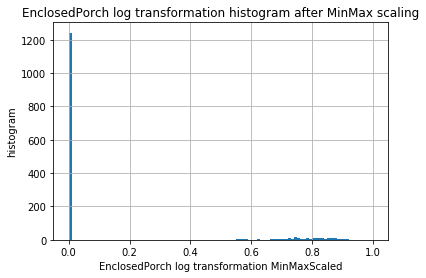

Distribution Before MinMax Scaling: 


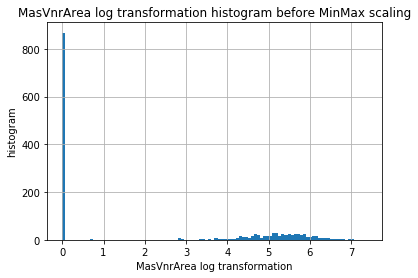

Distribution After MinMax Scaling: 


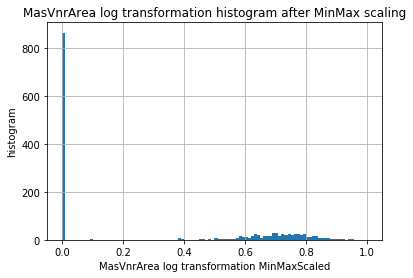

Distribution Before MinMax Scaling: 


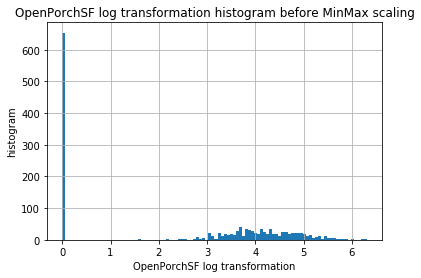

Distribution After MinMax Scaling: 


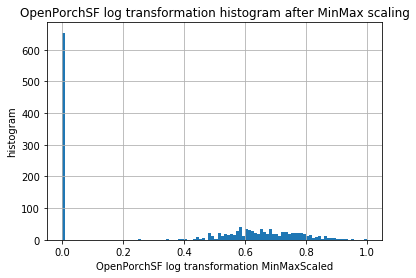

Distribution Before MinMax Scaling: 


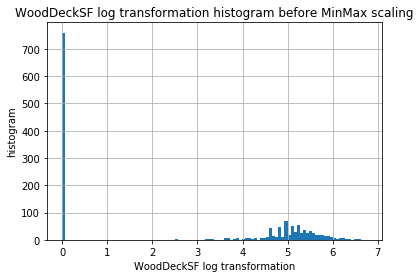

Distribution After MinMax Scaling: 


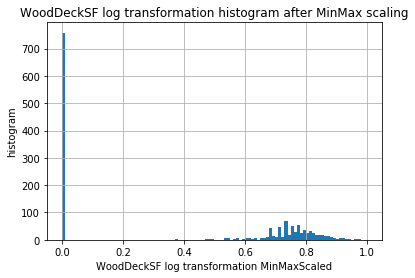

Distribution Before MinMax Scaling: 


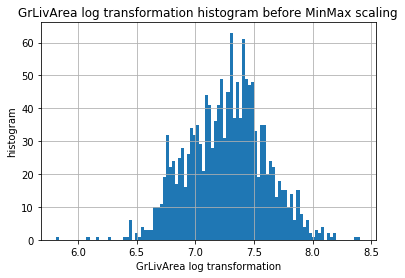

Distribution After MinMax Scaling: 


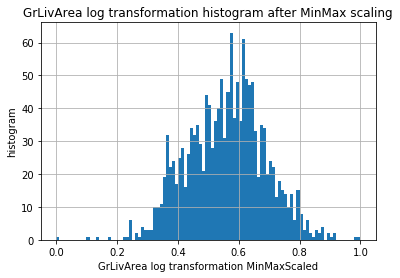

Distribution Before MinMax Scaling: 


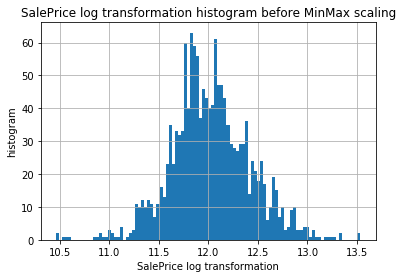

Distribution After MinMax Scaling: 


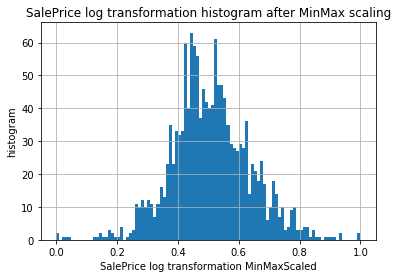

Relationship between variable and sale price before minmax scaling:


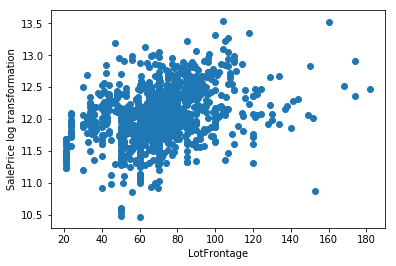

Relationship between variable and sale price after minmax scaling:


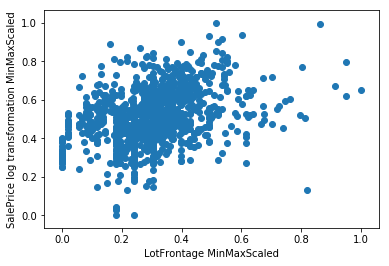

Relationship between variable and sale price before minmax scaling:


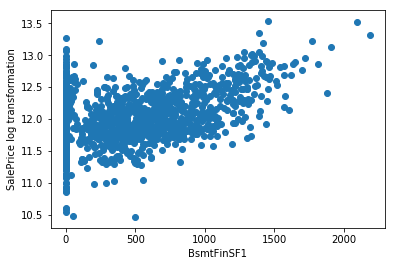

Relationship between variable and sale price after minmax scaling:


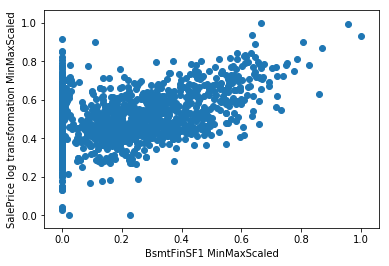

Relationship between variable and sale price before minmax scaling:


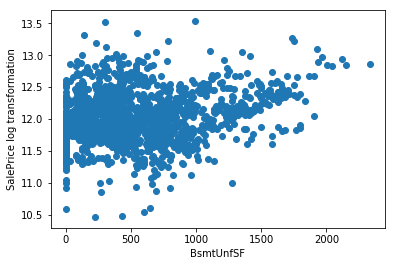

Relationship between variable and sale price after minmax scaling:


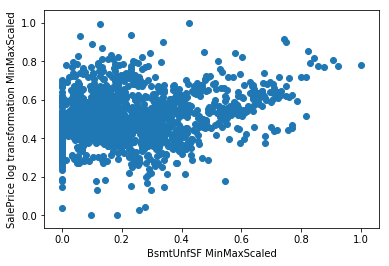

Relationship between variable and sale price before minmax scaling:


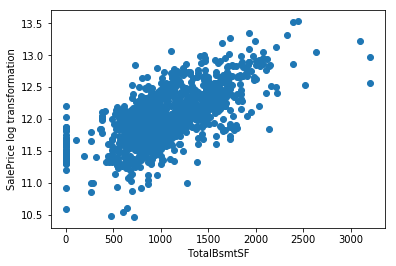

Relationship between variable and sale price after minmax scaling:


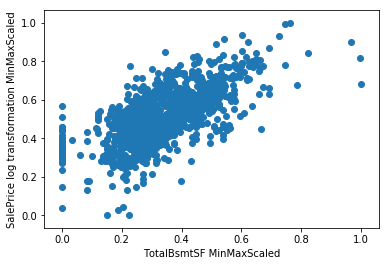

Relationship between variable and sale price before minmax scaling:


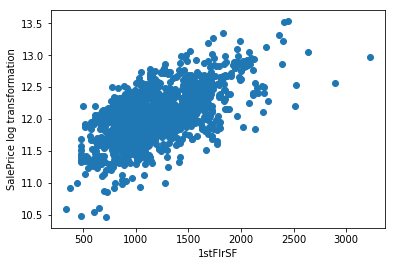

Relationship between variable and sale price after minmax scaling:


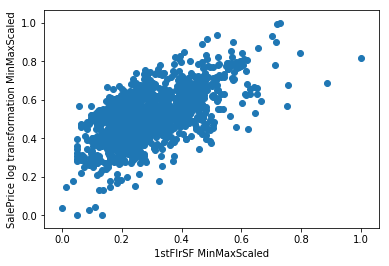

Relationship between variable and sale price before minmax scaling:


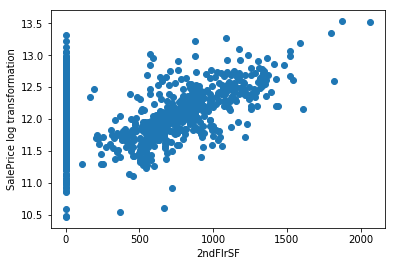

Relationship between variable and sale price after minmax scaling:


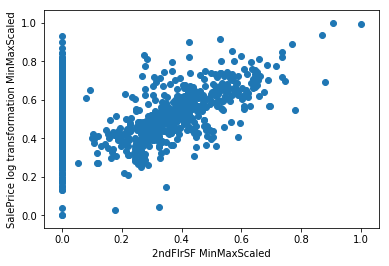

Relationship between variable and sale price before minmax scaling:


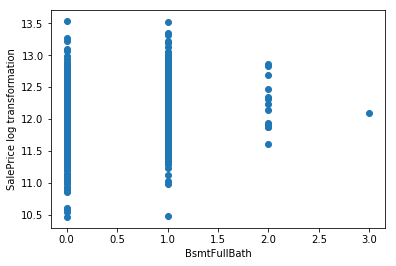

Relationship between variable and sale price after minmax scaling:


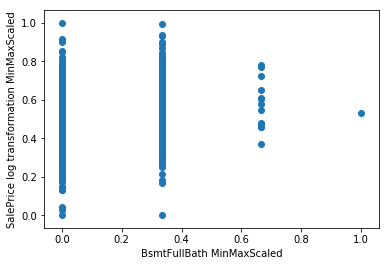

Relationship between variable and sale price before minmax scaling:


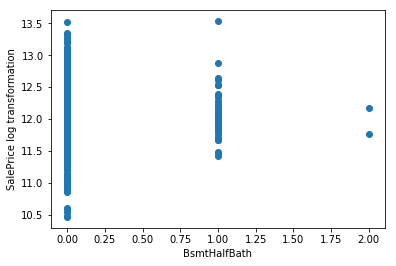

Relationship between variable and sale price after minmax scaling:


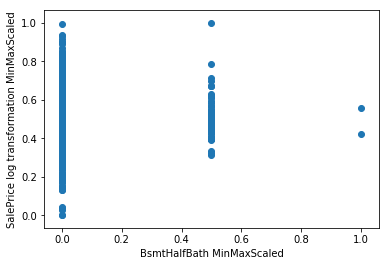

Relationship between variable and sale price before minmax scaling:


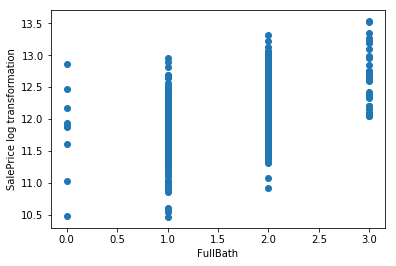

Relationship between variable and sale price after minmax scaling:


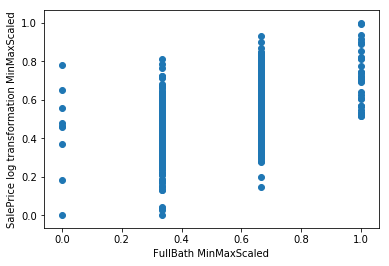

Relationship between variable and sale price before minmax scaling:


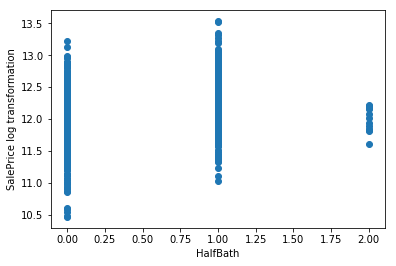

Relationship between variable and sale price after minmax scaling:


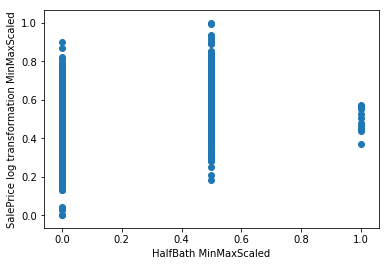

Relationship between variable and sale price before minmax scaling:


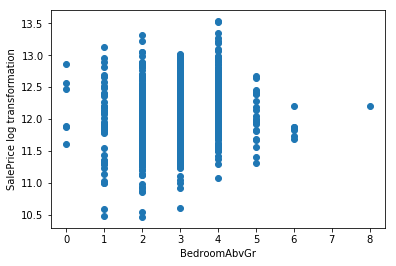

Relationship between variable and sale price after minmax scaling:


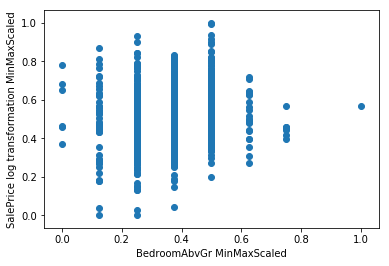

Relationship between variable and sale price before minmax scaling:


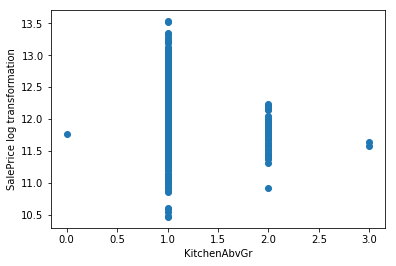

Relationship between variable and sale price after minmax scaling:


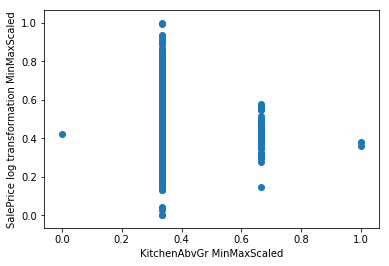

Relationship between variable and sale price before minmax scaling:


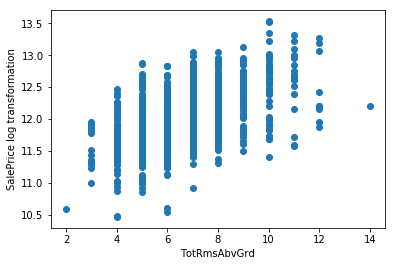

Relationship between variable and sale price after minmax scaling:


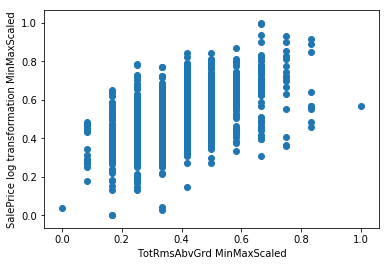

Relationship between variable and sale price before minmax scaling:


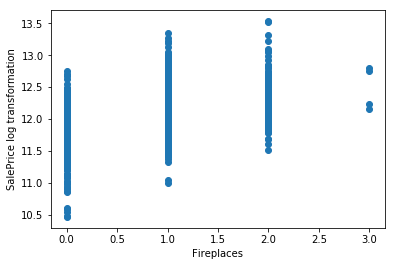

Relationship between variable and sale price after minmax scaling:


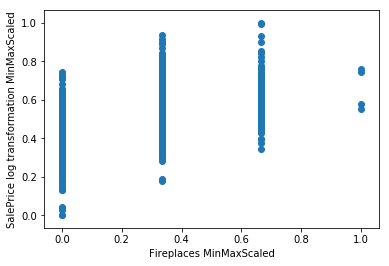

Relationship between variable and sale price before minmax scaling:


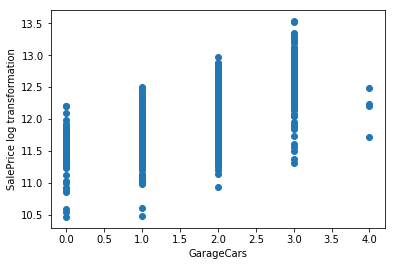

Relationship between variable and sale price after minmax scaling:


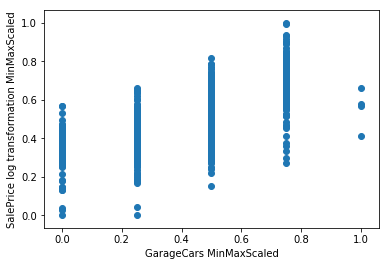

Relationship between variable and sale price before minmax scaling:


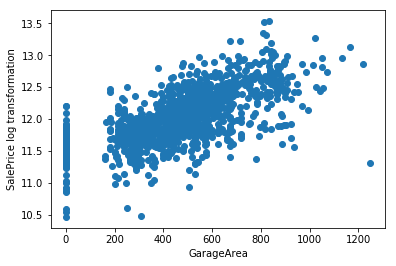

Relationship between variable and sale price after minmax scaling:


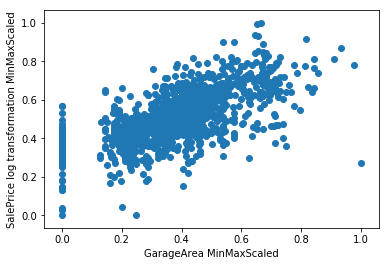

Relationship between variable and sale price before minmax scaling:


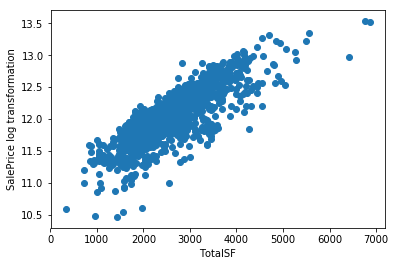

Relationship between variable and sale price after minmax scaling:


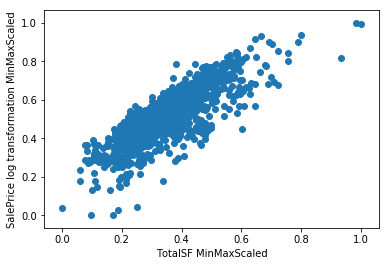

Relationship between variable and sale price before minmax scaling:


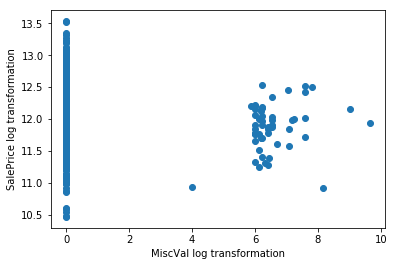

Relationship between variable and sale price after minmax scaling:


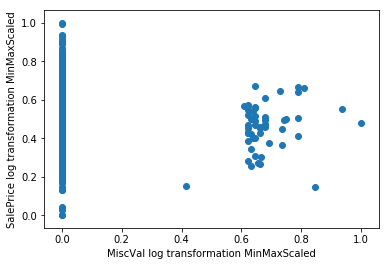

Relationship between variable and sale price before minmax scaling:


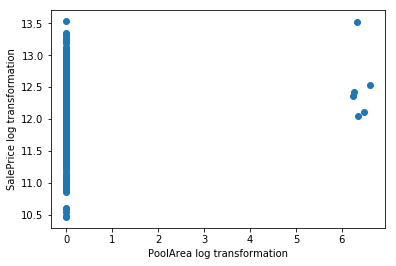

Relationship between variable and sale price after minmax scaling:


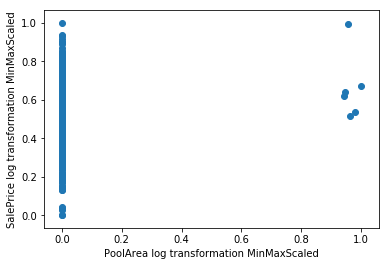

Relationship between variable and sale price before minmax scaling:


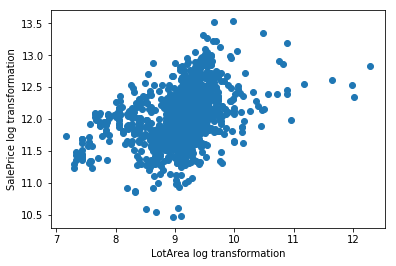

Relationship between variable and sale price after minmax scaling:


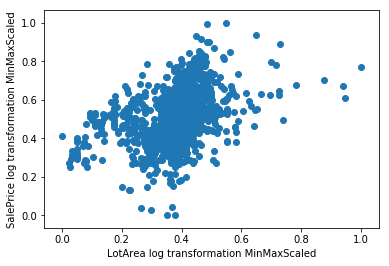

Relationship between variable and sale price before minmax scaling:


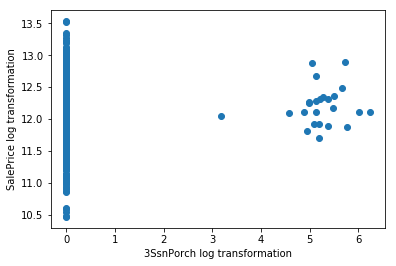

Relationship between variable and sale price after minmax scaling:


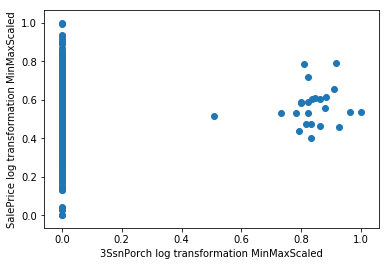

Relationship between variable and sale price before minmax scaling:


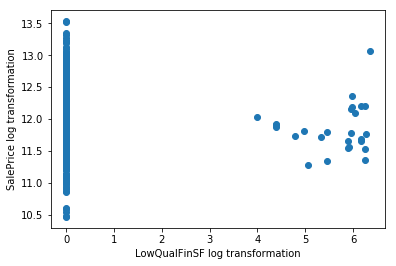

Relationship between variable and sale price after minmax scaling:


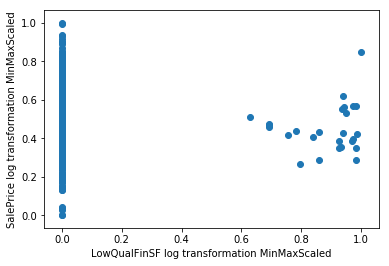

Relationship between variable and sale price before minmax scaling:


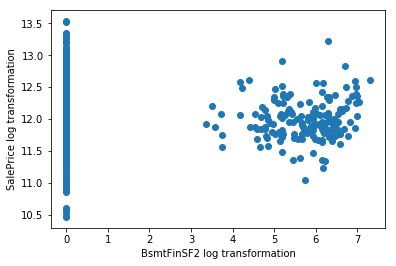

Relationship between variable and sale price after minmax scaling:


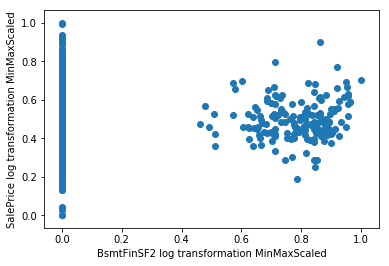

Relationship between variable and sale price before minmax scaling:


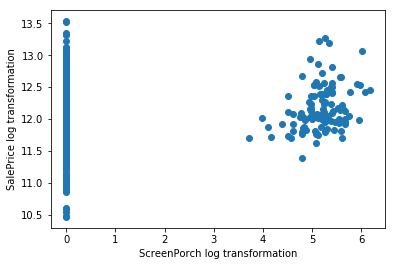

Relationship between variable and sale price after minmax scaling:


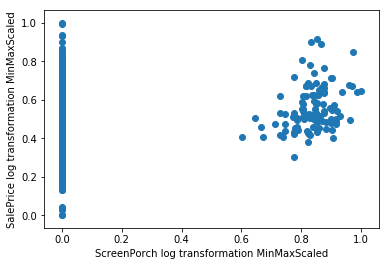

Relationship between variable and sale price before minmax scaling:


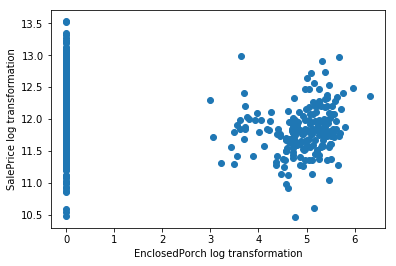

Relationship between variable and sale price after minmax scaling:


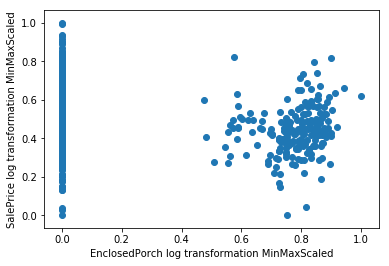

Relationship between variable and sale price before minmax scaling:


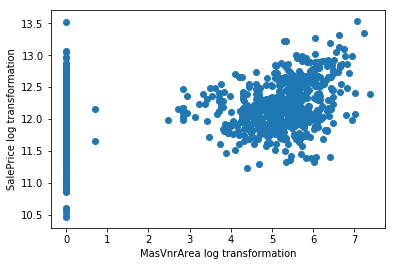

Relationship between variable and sale price after minmax scaling:


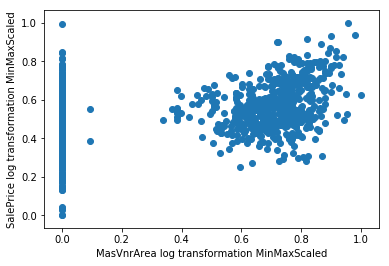

Relationship between variable and sale price before minmax scaling:


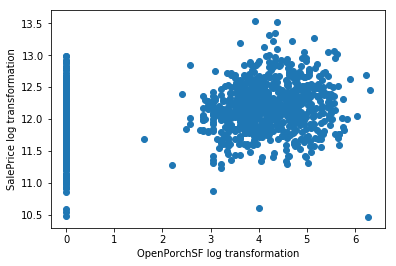

Relationship between variable and sale price after minmax scaling:


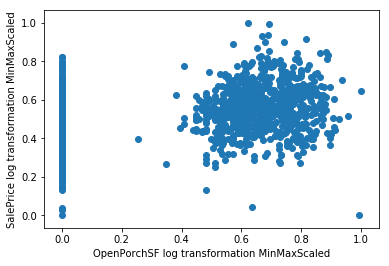

Relationship between variable and sale price before minmax scaling:


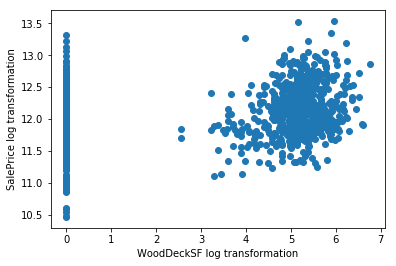

Relationship between variable and sale price after minmax scaling:


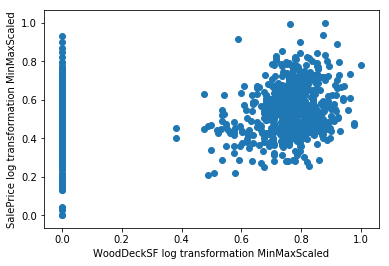

Relationship between variable and sale price before minmax scaling:


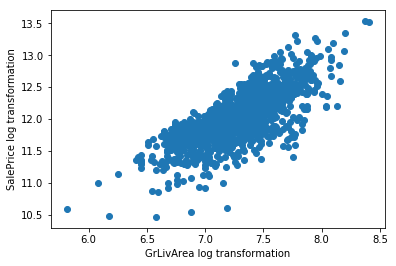

Relationship between variable and sale price after minmax scaling:


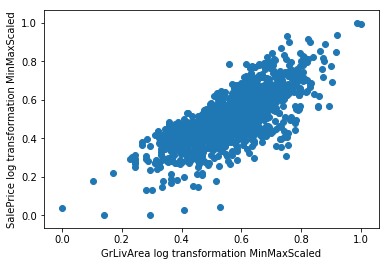

Relationship between variable and sale price before minmax scaling:


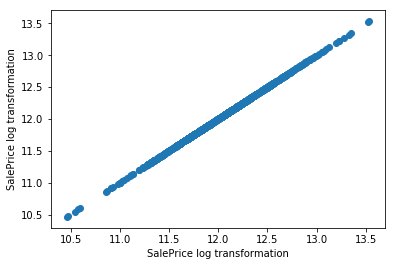

Relationship between variable and sale price after minmax scaling:


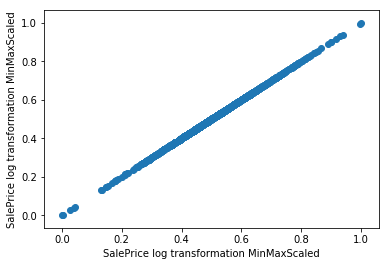

In [777]:
training_data_updated_log_transformed_scaled,log_transformed_scaled_numerical_variable_list=func_variable_min_max_varaible_scaling(training_data_updated_log_transformed)

Distribution Before MinMax Scaling: 


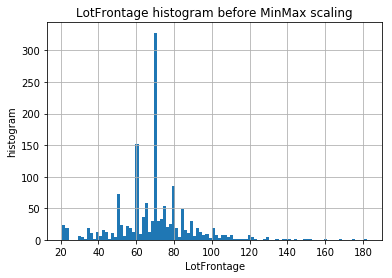

Distribution After MinMax Scaling: 


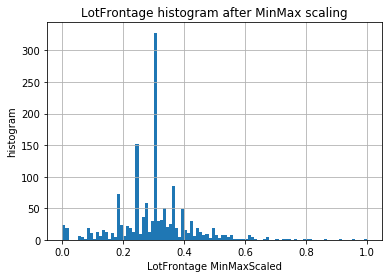

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Distribution Before MinMax Scaling: 


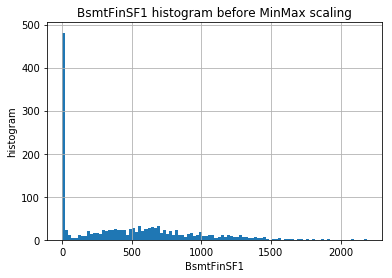

Distribution After MinMax Scaling: 


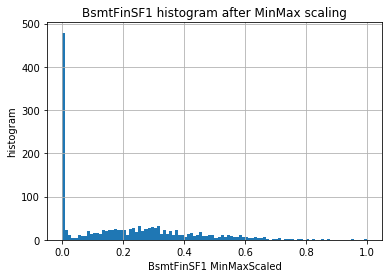

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Distribution Before MinMax Scaling: 


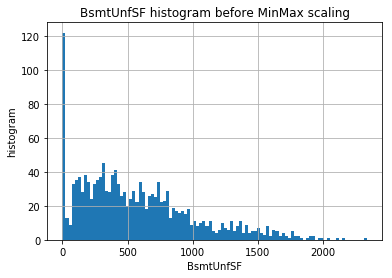

Distribution After MinMax Scaling: 


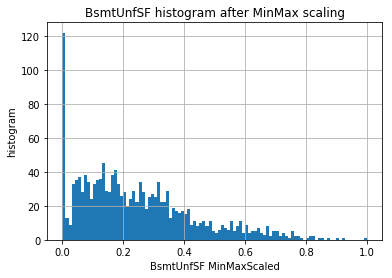

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Distribution Before MinMax Scaling: 


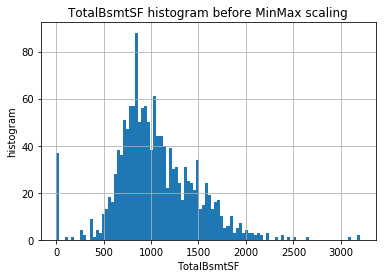

Distribution After MinMax Scaling: 


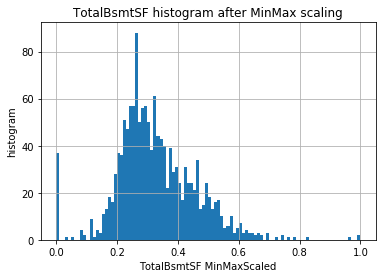

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Distribution Before MinMax Scaling: 


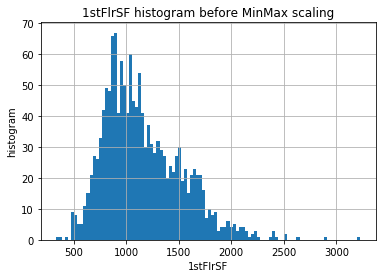

Distribution After MinMax Scaling: 


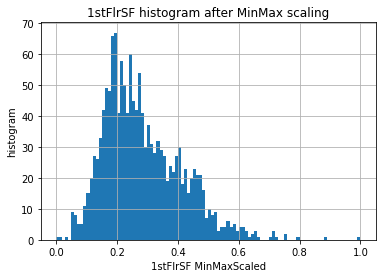

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Distribution Before MinMax Scaling: 


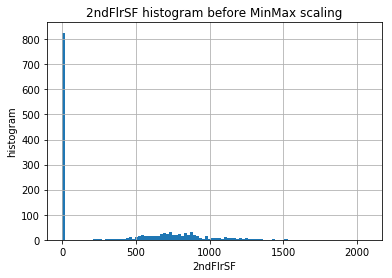

Distribution After MinMax Scaling: 


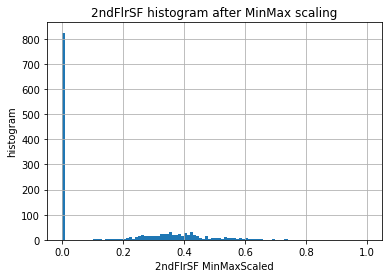

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Distribution Before MinMax Scaling: 


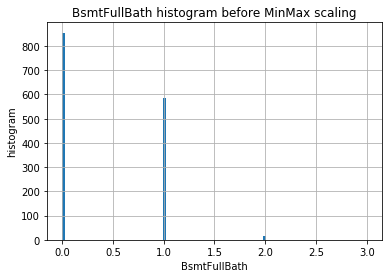

Distribution After MinMax Scaling: 


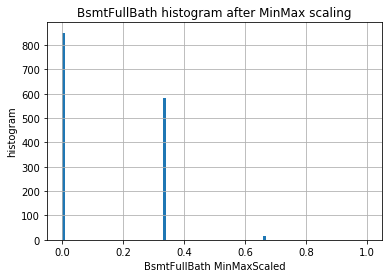

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Distribution Before MinMax Scaling: 


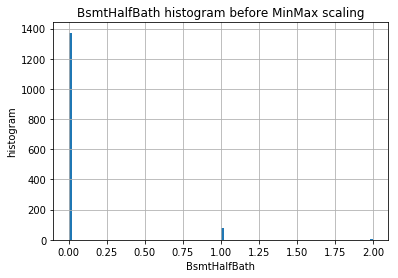

Distribution After MinMax Scaling: 


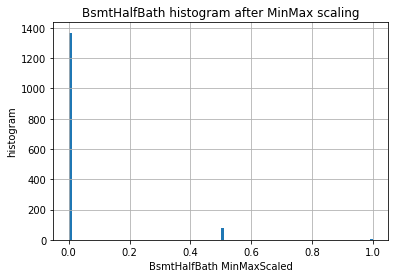

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Distribution Before MinMax Scaling: 


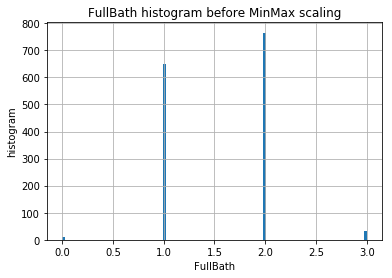

Distribution After MinMax Scaling: 


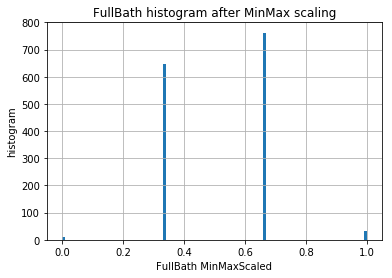

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Distribution Before MinMax Scaling: 


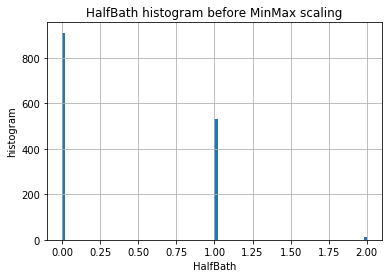

Distribution After MinMax Scaling: 


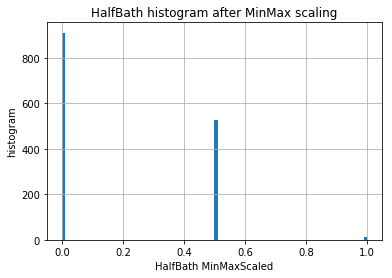

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Distribution Before MinMax Scaling: 


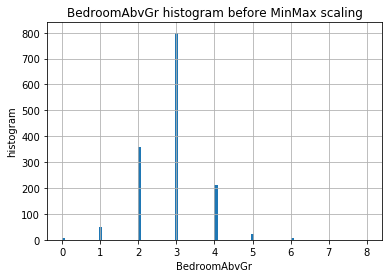

Distribution After MinMax Scaling: 


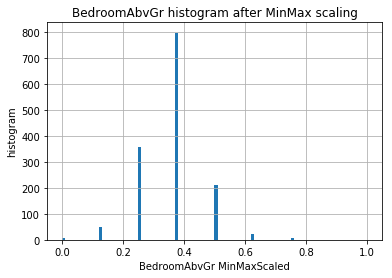

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Distribution Before MinMax Scaling: 


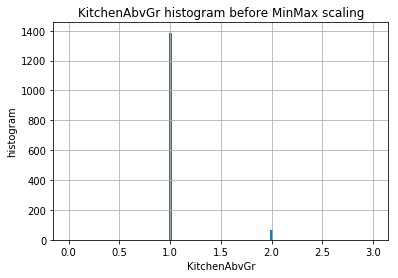

Distribution After MinMax Scaling: 


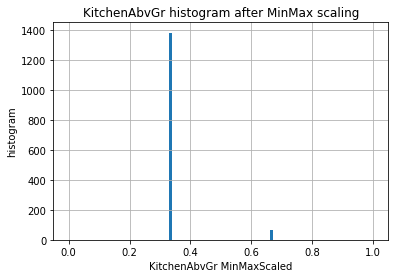

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Distribution Before MinMax Scaling: 


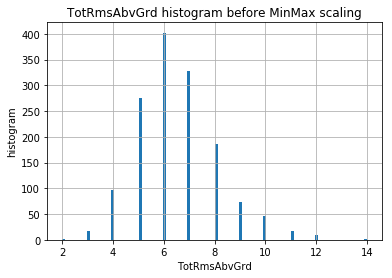

Distribution After MinMax Scaling: 


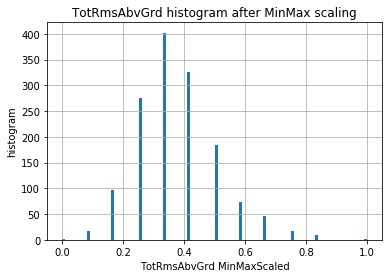

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Distribution Before MinMax Scaling: 


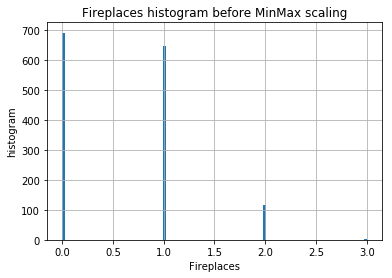

Distribution After MinMax Scaling: 


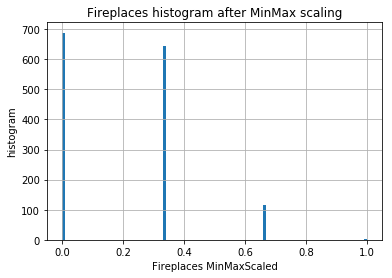

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Distribution Before MinMax Scaling: 


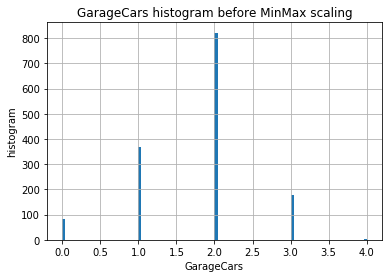

Distribution After MinMax Scaling: 


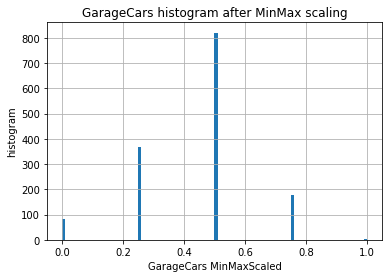

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Distribution Before MinMax Scaling: 


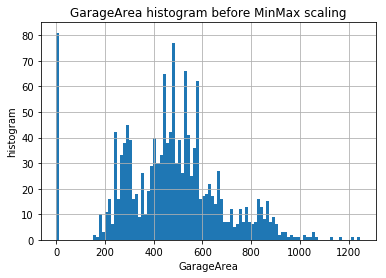

Distribution After MinMax Scaling: 


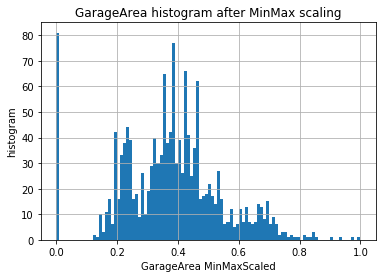

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Distribution Before MinMax Scaling: 


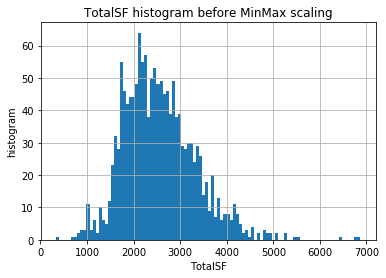

Distribution After MinMax Scaling: 


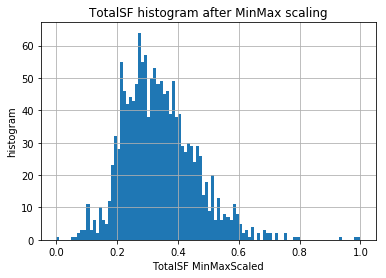

Distribution Before MinMax Scaling: 


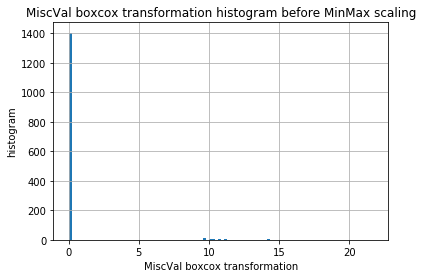

Distribution After MinMax Scaling: 


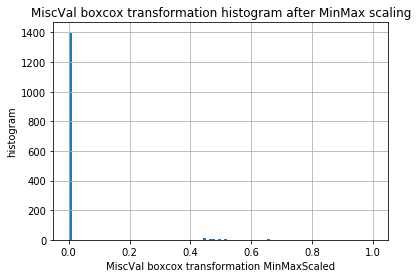

Distribution Before MinMax Scaling: 


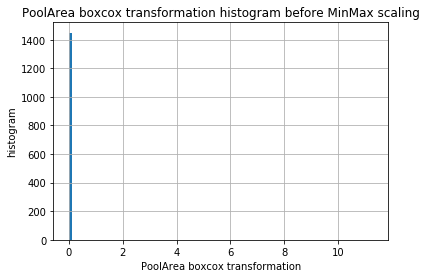

Distribution After MinMax Scaling: 


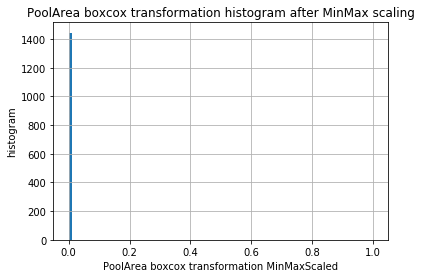

Distribution Before MinMax Scaling: 


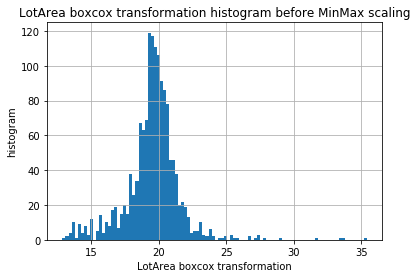

Distribution After MinMax Scaling: 


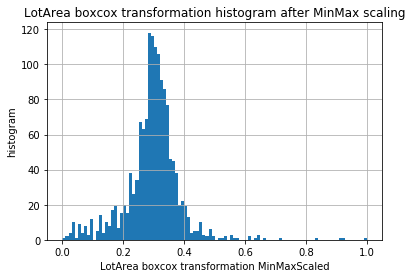

Distribution Before MinMax Scaling: 


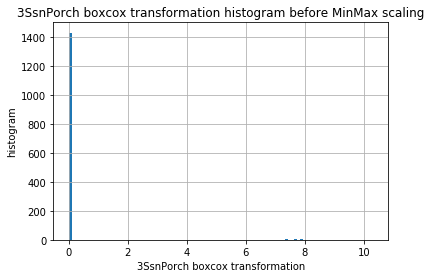

Distribution After MinMax Scaling: 


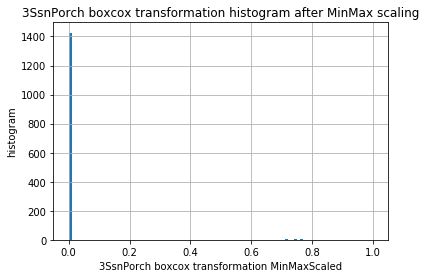

Distribution Before MinMax Scaling: 


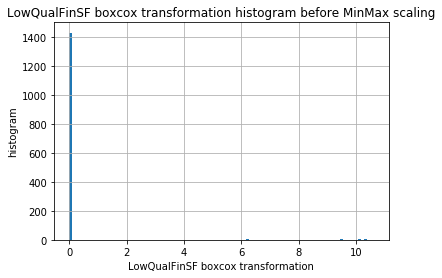

Distribution After MinMax Scaling: 


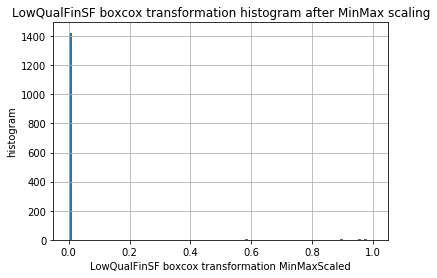

Distribution Before MinMax Scaling: 


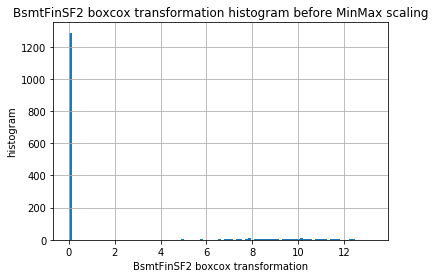

Distribution After MinMax Scaling: 


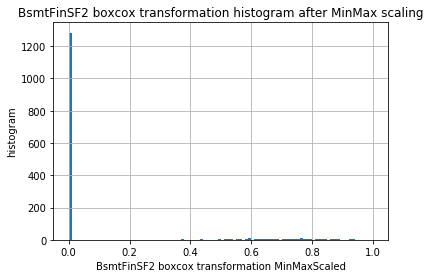

Distribution Before MinMax Scaling: 


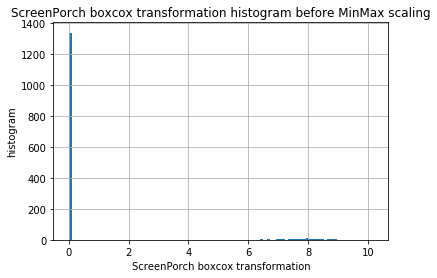

Distribution After MinMax Scaling: 


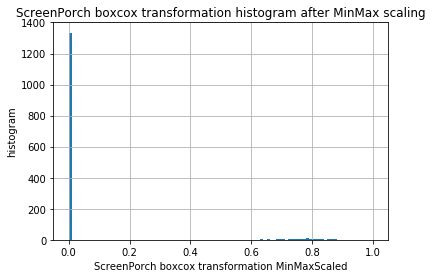

Distribution Before MinMax Scaling: 


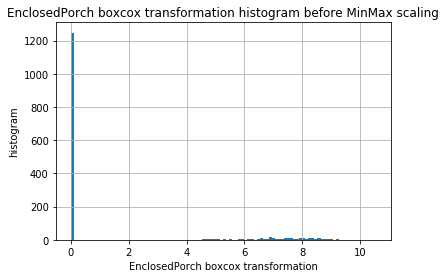

Distribution After MinMax Scaling: 


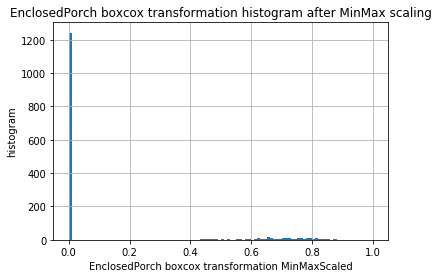

Distribution Before MinMax Scaling: 


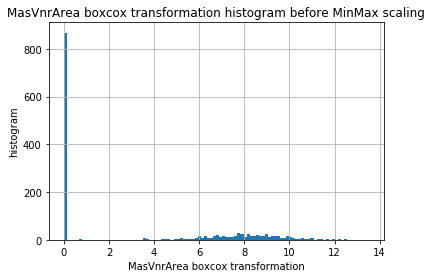

Distribution After MinMax Scaling: 


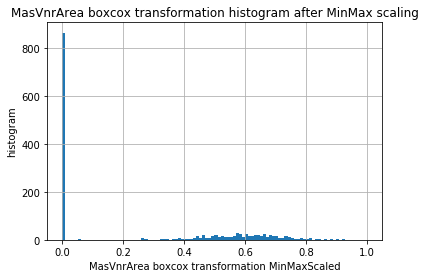

Distribution Before MinMax Scaling: 


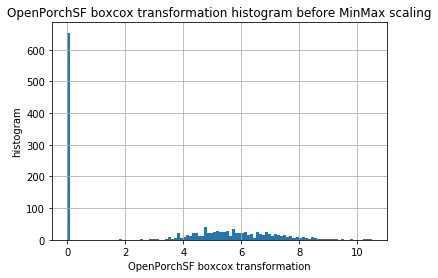

Distribution After MinMax Scaling: 


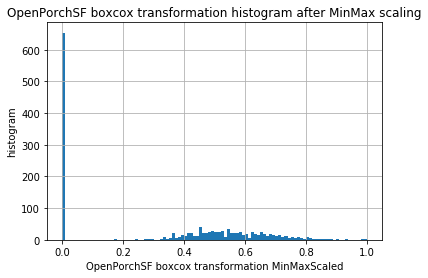

Distribution Before MinMax Scaling: 


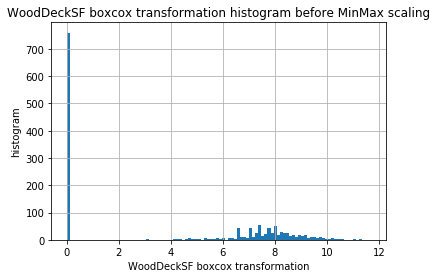

Distribution After MinMax Scaling: 


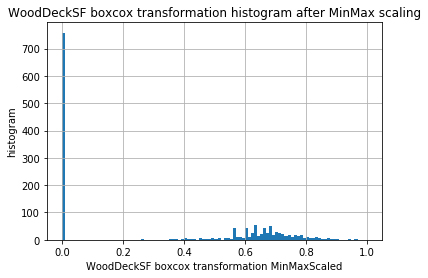

Distribution Before MinMax Scaling: 


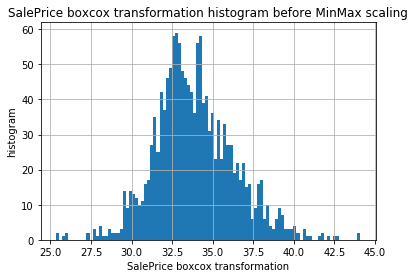

Distribution After MinMax Scaling: 


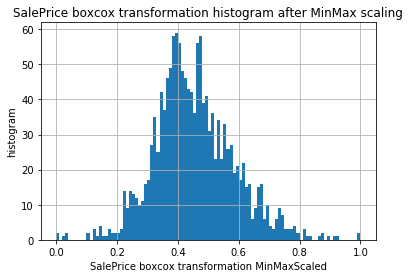

Distribution Before MinMax Scaling: 


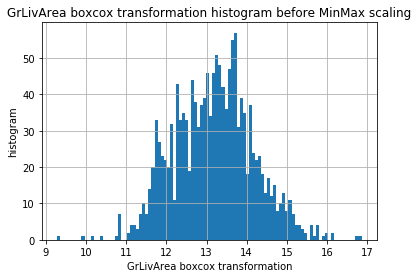

Distribution After MinMax Scaling: 


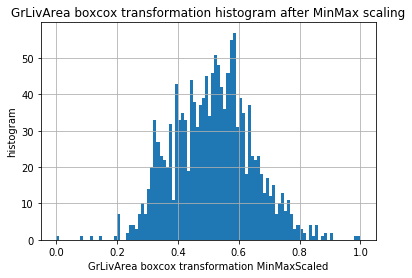

Relationship between variable and sale price before minmax scaling:


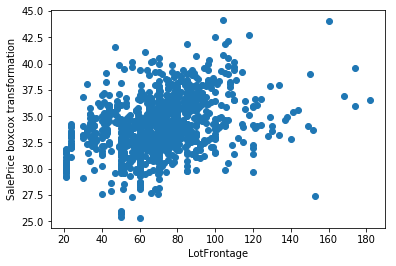

Relationship between variable and sale price after minmax scaling:


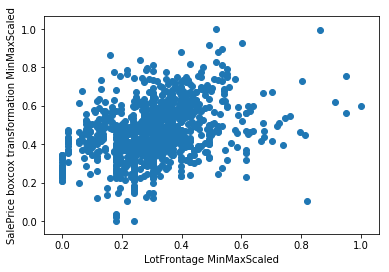

Relationship between variable and sale price before minmax scaling:


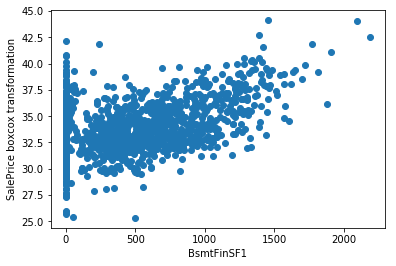

Relationship between variable and sale price after minmax scaling:


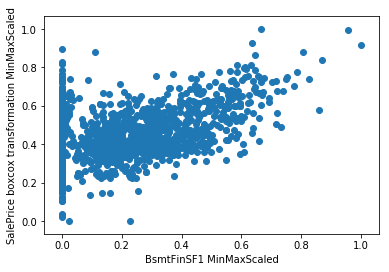

Relationship between variable and sale price before minmax scaling:


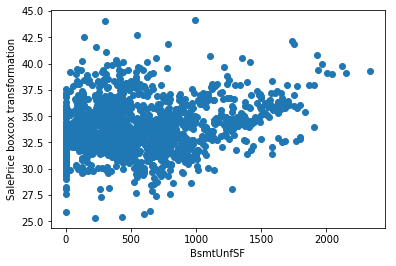

Relationship between variable and sale price after minmax scaling:


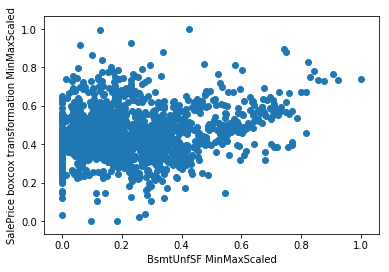

Relationship between variable and sale price before minmax scaling:


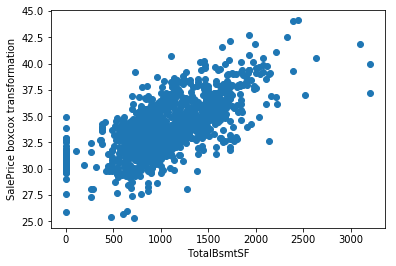

Relationship between variable and sale price after minmax scaling:


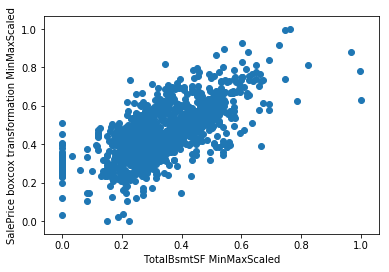

Relationship between variable and sale price before minmax scaling:


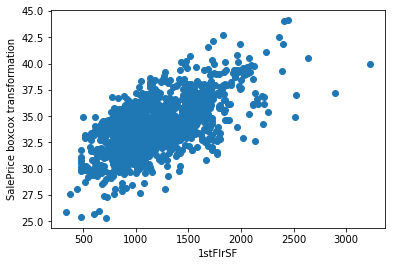

Relationship between variable and sale price after minmax scaling:


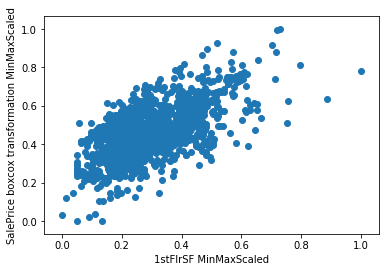

Relationship between variable and sale price before minmax scaling:


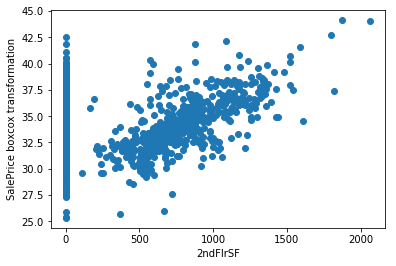

Relationship between variable and sale price after minmax scaling:


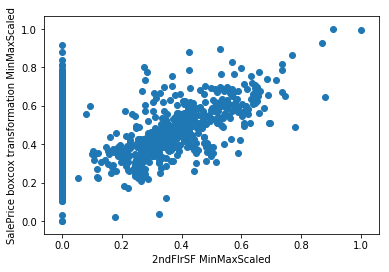

Relationship between variable and sale price before minmax scaling:


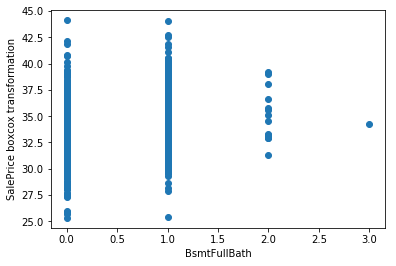

Relationship between variable and sale price after minmax scaling:


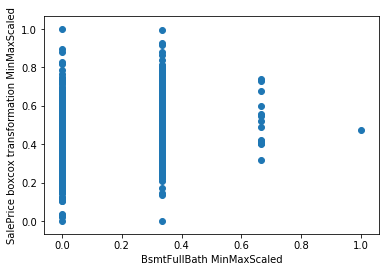

Relationship between variable and sale price before minmax scaling:


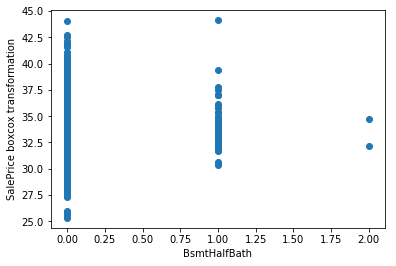

Relationship between variable and sale price after minmax scaling:


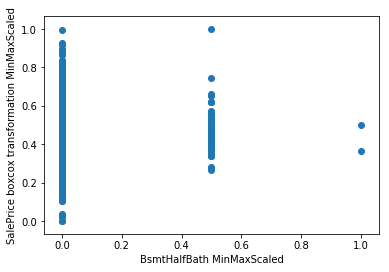

Relationship between variable and sale price before minmax scaling:


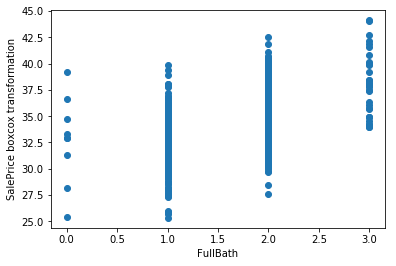

Relationship between variable and sale price after minmax scaling:


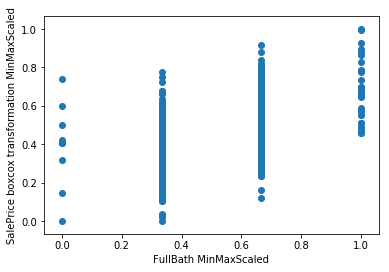

Relationship between variable and sale price before minmax scaling:


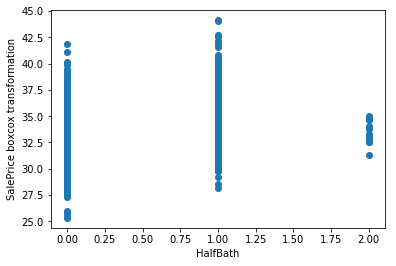

Relationship between variable and sale price after minmax scaling:


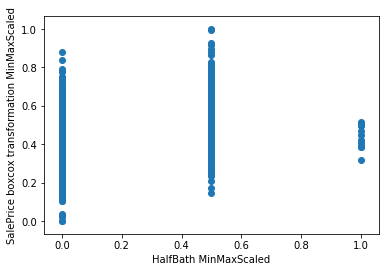

Relationship between variable and sale price before minmax scaling:


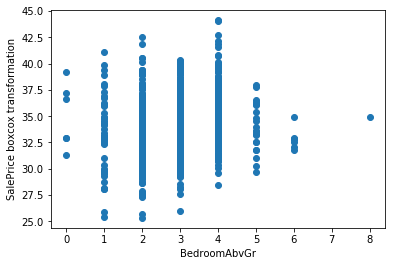

Relationship between variable and sale price after minmax scaling:


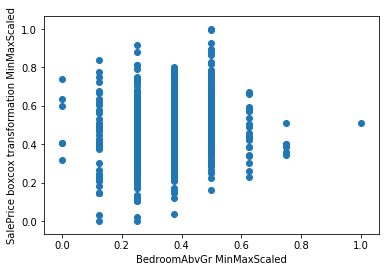

Relationship between variable and sale price before minmax scaling:


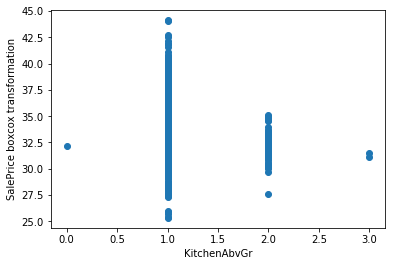

Relationship between variable and sale price after minmax scaling:


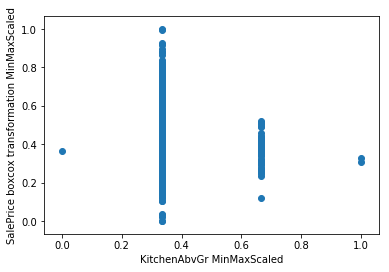

Relationship between variable and sale price before minmax scaling:


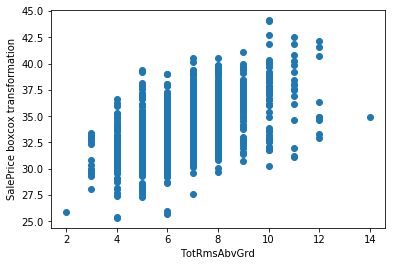

Relationship between variable and sale price after minmax scaling:


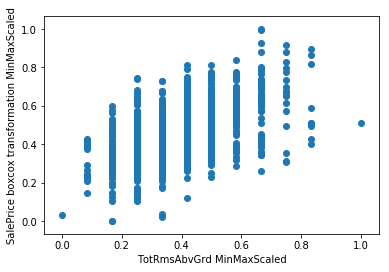

Relationship between variable and sale price before minmax scaling:


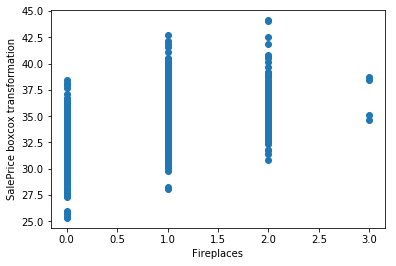

Relationship between variable and sale price after minmax scaling:


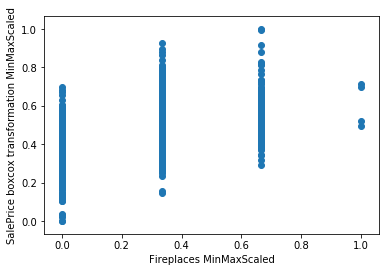

Relationship between variable and sale price before minmax scaling:


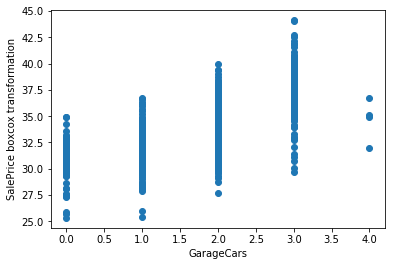

Relationship between variable and sale price after minmax scaling:


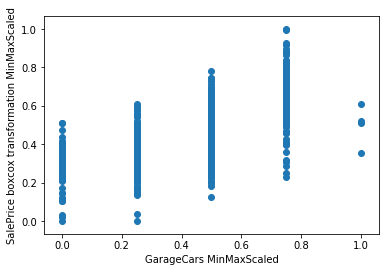

Relationship between variable and sale price before minmax scaling:


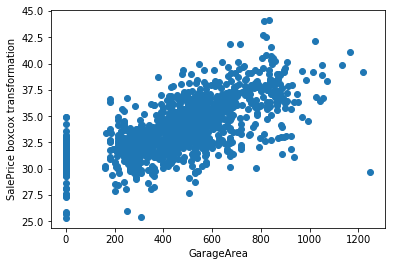

Relationship between variable and sale price after minmax scaling:


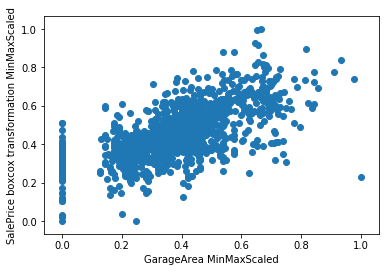

Relationship between variable and sale price before minmax scaling:


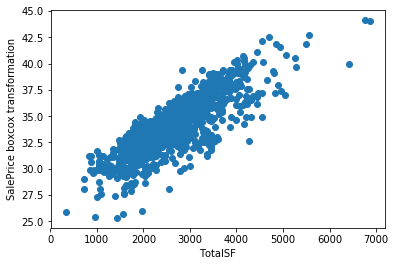

Relationship between variable and sale price after minmax scaling:


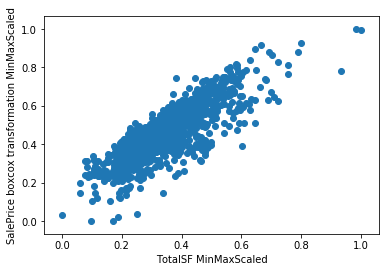

Relationship between variable and sale price before minmax scaling:


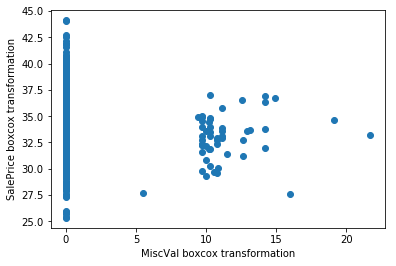

Relationship between variable and sale price after minmax scaling:


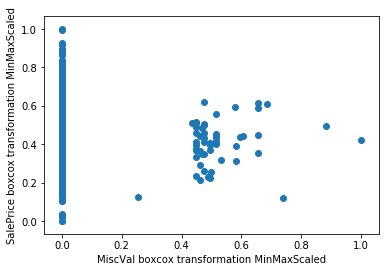

Relationship between variable and sale price before minmax scaling:


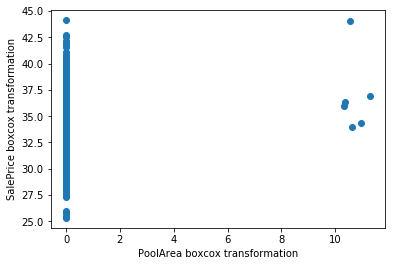

Relationship between variable and sale price after minmax scaling:


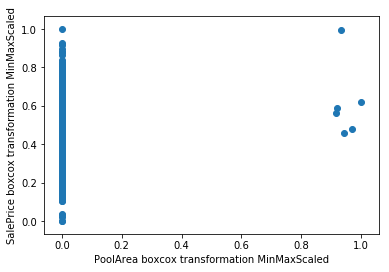

Relationship between variable and sale price before minmax scaling:


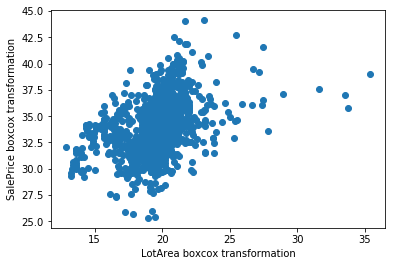

Relationship between variable and sale price after minmax scaling:


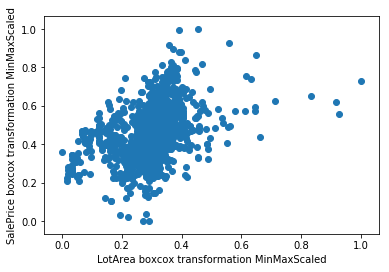

Relationship between variable and sale price before minmax scaling:


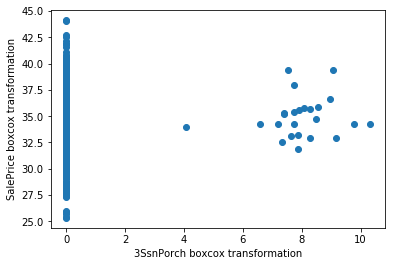

Relationship between variable and sale price after minmax scaling:


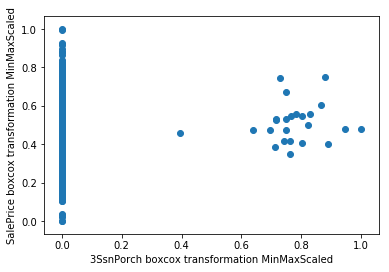

Relationship between variable and sale price before minmax scaling:


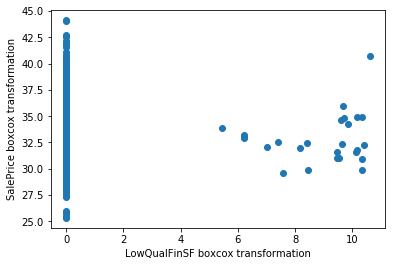

Relationship between variable and sale price after minmax scaling:


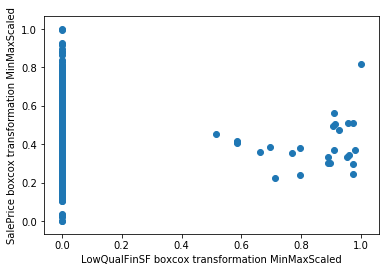

Relationship between variable and sale price before minmax scaling:


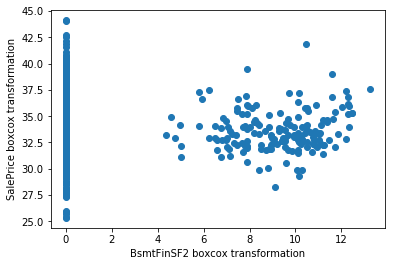

Relationship between variable and sale price after minmax scaling:


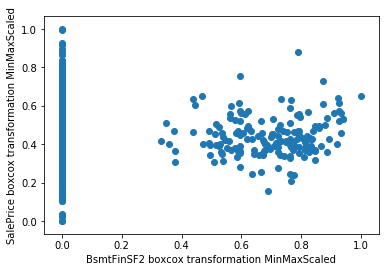

Relationship between variable and sale price before minmax scaling:


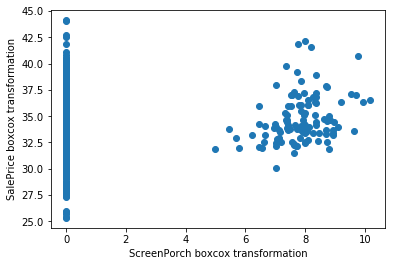

Relationship between variable and sale price after minmax scaling:


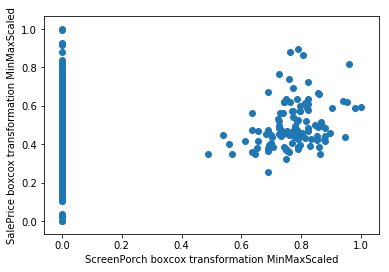

Relationship between variable and sale price before minmax scaling:


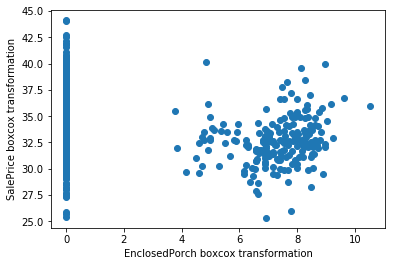

Relationship between variable and sale price after minmax scaling:


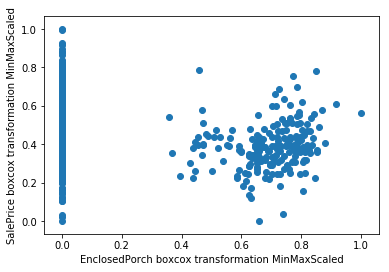

Relationship between variable and sale price before minmax scaling:


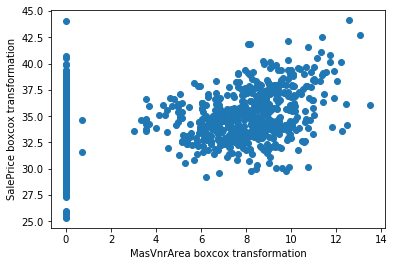

Relationship between variable and sale price after minmax scaling:


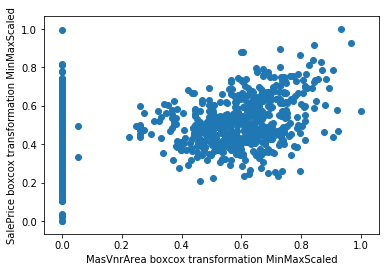

Relationship between variable and sale price before minmax scaling:


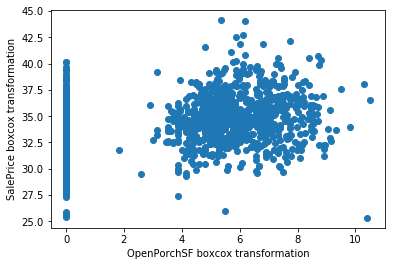

Relationship between variable and sale price after minmax scaling:


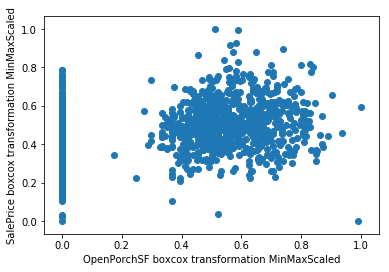

Relationship between variable and sale price before minmax scaling:


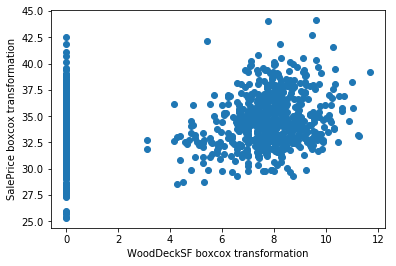

Relationship between variable and sale price after minmax scaling:


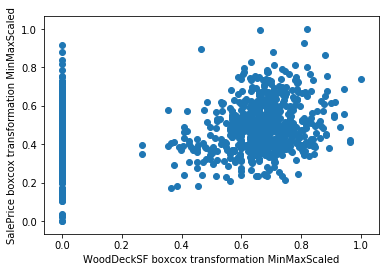

Relationship between variable and sale price before minmax scaling:


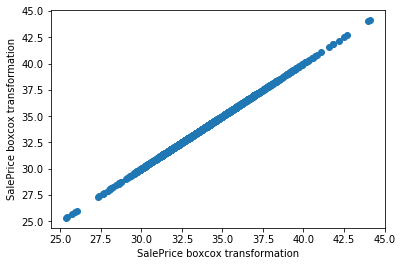

Relationship between variable and sale price after minmax scaling:


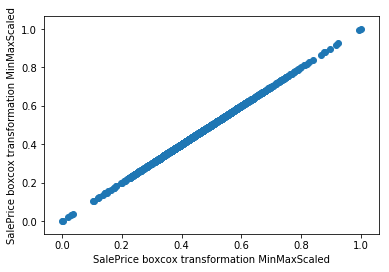

Relationship between variable and sale price before minmax scaling:


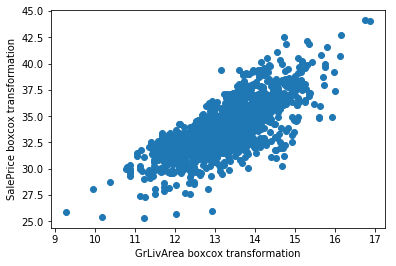

Relationship between variable and sale price after minmax scaling:


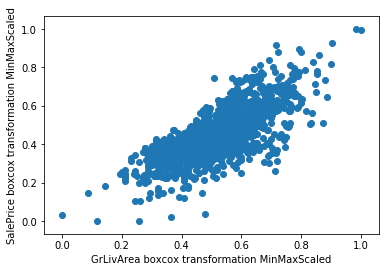

In [778]:
training_data_updated_boxcox_transformed_scaled,boxcox_transformed_scaled_numerical_variable_list=func_variable_min_max_varaible_scaling(training_data_updated_boxcox_transformed)